<a href="https://colab.research.google.com/github/Neural-Energies/test/blob/main/Monthly_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

symbols = ["BTC-USD",  "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]
data = yf.download(symbols, start="2000-01-01", end="2023-12-01", group_by='ticker')


[*********************100%%**********************]  6 of 6 completed


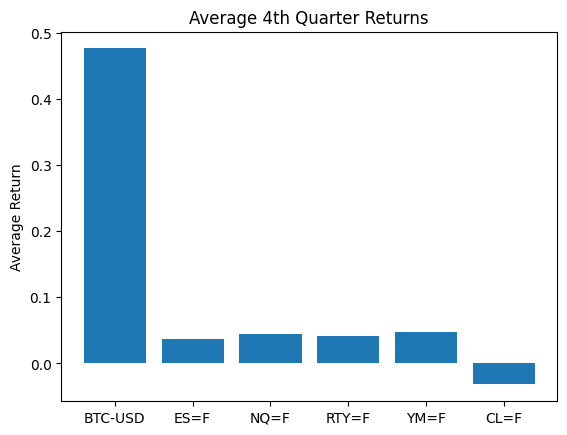

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to extract the 4th quarter data and calculate returns
def fourth_quarter_returns(symbol_data):
    # Extract 4th quarter data
    q4_data = symbol_data[symbol_data.index.month.isin([10, 11, 12])]

    # Calculate returns for each year's 4th quarter
    returns = (q4_data['Close'].resample('Q-DEC').last() / q4_data['Close'].resample('Q-DEC').first()) - 1

    return returns.mean()

# Calculate the average 4th quarter return for each symbol
avg_returns = {}
for symbol in symbols:
    avg_returns[symbol] = fourth_quarter_returns(data[symbol])

# Visualize the results
plt.bar(avg_returns.keys(), avg_returns.values())
plt.ylabel('Average Return')
plt.title('Average 4th Quarter Returns')
plt.show()


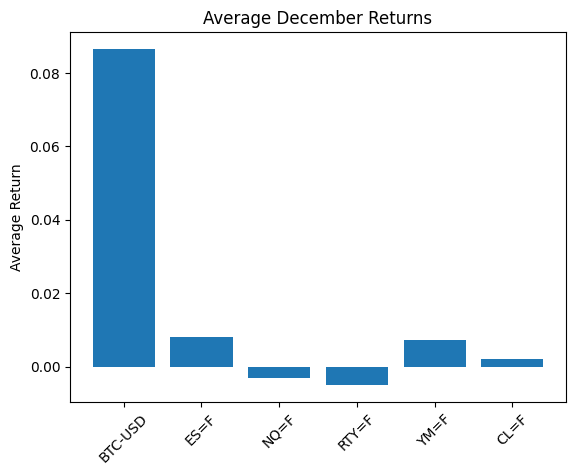

In [ ]:
# Define a function to extract the November data and calculate returns
def november_returns(symbol_data):
    # Extract November data
    nov_data = symbol_data[symbol_data.index.month == 12]

    # Calculate returns for each year's November
    returns = (nov_data['Close'].resample('M').last() / nov_data['Close'].resample('M').first()) - 1

    return returns.mean()

# Calculate the average November return for each symbol
avg_nov_returns = {}
for symbol in symbols:
    avg_nov_returns[symbol] = november_returns(data[symbol])

# Visualize the results
plt.bar(avg_nov_returns.keys(), avg_nov_returns.values())
plt.ylabel('Average Return')
plt.title('Average December Returns')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


In [ ]:
import plotly.graph_objects as go

# Define a function to extract the November data and calculate returns
def november_returns(symbol_data):
    # Extract November data
    nov_data = symbol_data[symbol_data.index.month == 12]

    # Calculate returns for each year's November
    returns = (nov_data['Close'].resample('M').last() / nov_data['Close'].resample('M').first()) - 1

    return returns.mean()

# Calculate the average November return for each symbol
avg_nov_returns = {}
for symbol in symbols:
    avg_nov_returns[symbol] = november_returns(data[symbol])

# Visualize the results using plotly
fig = go.Figure([go.Bar(x=list(avg_nov_returns.keys()), y=list(avg_nov_returns.values()))])
fig.update_layout(title_text='Average December Returns', yaxis_title='Average Return', xaxis_title='Symbol')
fig.show()


In [ ]:
november_stats = november_data.describe()
q4_stats = q4_data.describe()


NameError: ignored

In [ ]:
# Ensure data is positive and non-zero
data_clipped = data.clip(lower=0.01)

# Calculate log returns for daily data
log_returns = np.log(data_clipped / data_clipped.shift(1))


NameError: ignored

In [ ]:
log_returns = log_returns.replace([np.inf, -np.inf], np.nan).dropna()


NameError: ignored

In [ ]:
# Plot histograms for each symbol
log_returns.hist(bins=100, figsize=(15,10))
plt.suptitle("Distribution of Log Returns")
plt.show()


NameError: ignored

In [ ]:
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go

def calculate_trend(symbol_data):
    # Extract returns
    returns = (symbol_data['Close'].resample('M').last() / symbol_data['Close'].resample('M').first()) - 1

    # Fit a linear regression model
    X = np.arange(len(returns))
    X = sm.add_constant(X)
    model = sm.OLS(returns, X).fit()
    predictions = model.predict(X)

    return returns, predictions

# For the month of November
nov_trends = {}
for symbol in symbols:
    symbol_data = data[symbol][data[symbol].index.month == 12]
    nov_trends[symbol] = calculate_trend(symbol_data)

fig1 = go.Figure()
for symbol, (returns, predictions) in nov_trends.items():
    fig1.add_trace(go.Scatter(x=returns.index, y=returns.values, mode='markers', name=f'{symbol} Returns'))
    fig1.add_trace(go.Scatter(x=returns.index, y=predictions, mode='lines', name=f'{symbol} Trend'))
fig1.update_layout(title_text='December Trends', yaxis_title='Return', xaxis_title='Year')
fig1.show()

# For the 4th quarter
q4_trends = {}
for symbol in symbols:
    symbol_data = data[symbol][data[symbol].index.month.isin([10, 11, 12])]
    q4_trends[symbol] = calculate_trend(symbol_data)

fig2 = go.Figure()
for symbol, (returns, predictions) in q4_trends.items():
    fig2.add_trace(go.Scatter(x=returns.index, y=returns.values, mode='markers', name=f'{symbol} Returns'))
    fig2.add_trace(go.Scatter(x=returns.index, y=predictions, mode='lines', name=f'{symbol} Trend'))
fig2.update_layout(title_text='4th Quarter Trends', yaxis_title='Return', xaxis_title='Year')
fig2.show()


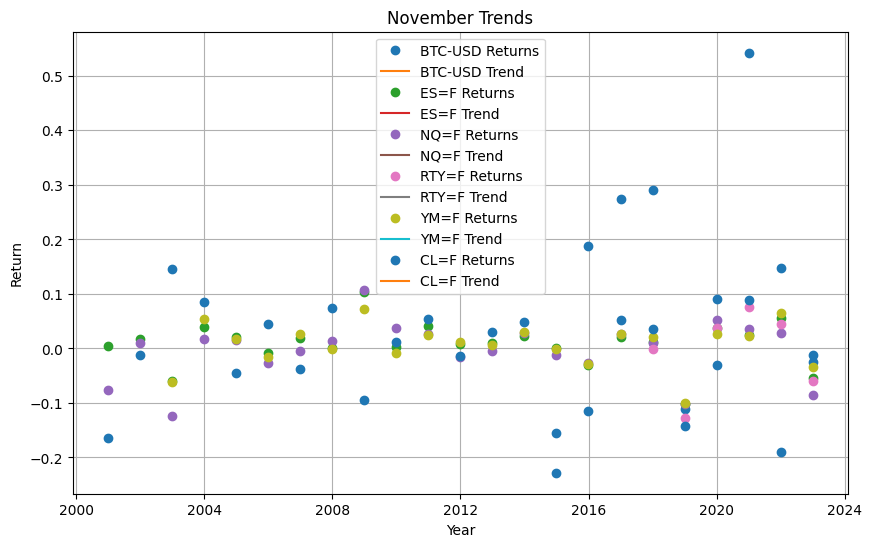

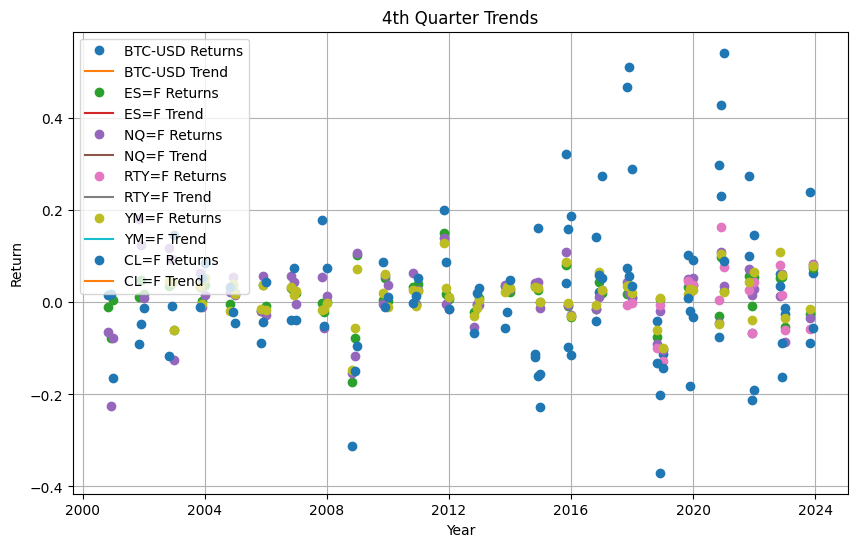

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def calculate_trend(symbol_data):
    # Extract returns
    returns = (symbol_data['Close'].resample('M').last() / symbol_data['Close'].resample('M').first()) - 1

    # Fit a linear regression model
    X = np.arange(len(returns))
    X = sm.add_constant(X)
    model = sm.OLS(returns, X).fit()
    predictions = model.predict(X)

    return returns, predictions

# For the month of November
nov_trends = {}
for symbol in symbols:
    symbol_data = data[symbol][data[symbol].index.month == 12]
    nov_trends[symbol] = calculate_trend(symbol_data)

plt.figure(figsize=(10, 6))
for symbol, (returns, predictions) in nov_trends.items():
    plt.plot(returns.index, returns.values, 'o', label=f'{symbol} Returns')
    plt.plot(returns.index, predictions, label=f'{symbol} Trend')
plt.title('November Trends')
plt.ylabel('Return')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('December_Trends.png')
plt.show()

# For the 4th quarter
q4_trends = {}
for symbol in symbols:
    symbol_data = data[symbol][data[symbol].index.month.isin([10, 11, 12])]
    q4_trends[symbol] = calculate_trend(symbol_data)

plt.figure(figsize=(10, 6))
for symbol, (returns, predictions) in q4_trends.items():
    plt.plot(returns.index, returns.values, 'o', label=f'{symbol} Returns')
    plt.plot(returns.index, predictions, label=f'{symbol} Trend')
plt.title('4th Quarter Trends')
plt.ylabel('Return')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.savefig('Q4_Trends.png')
plt.show()


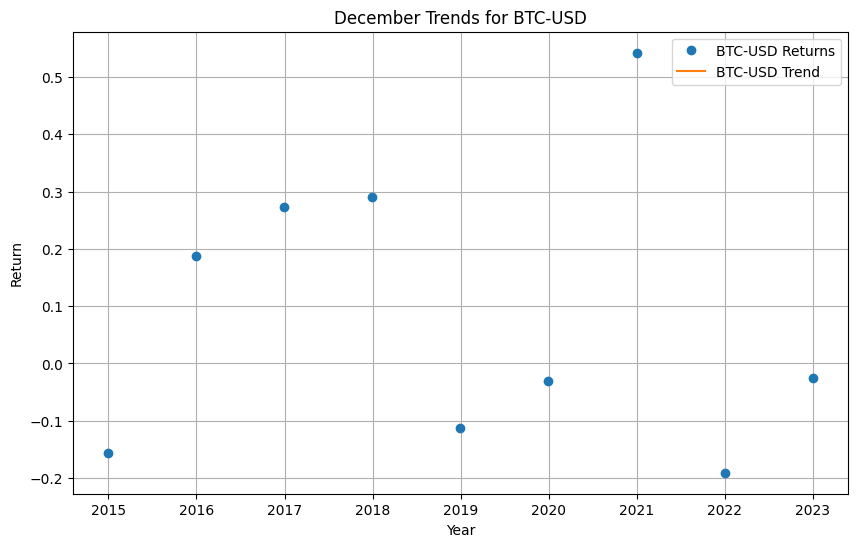

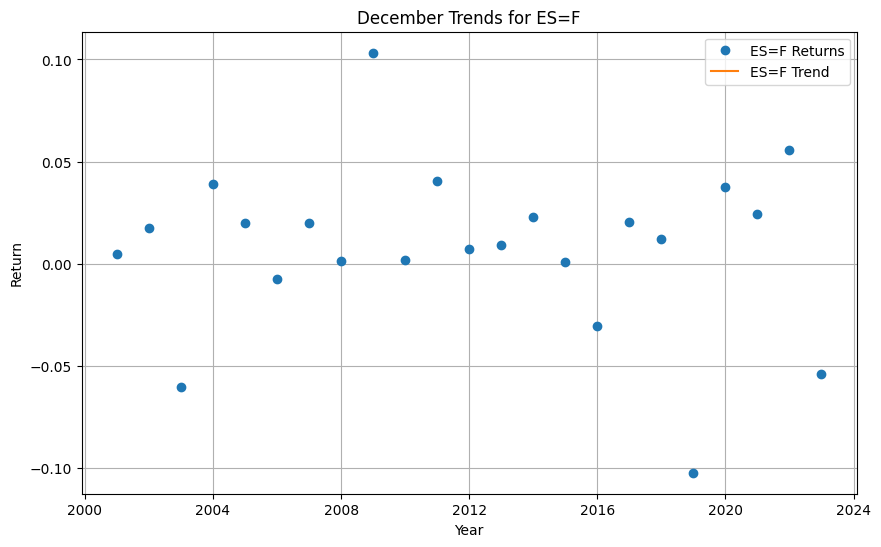

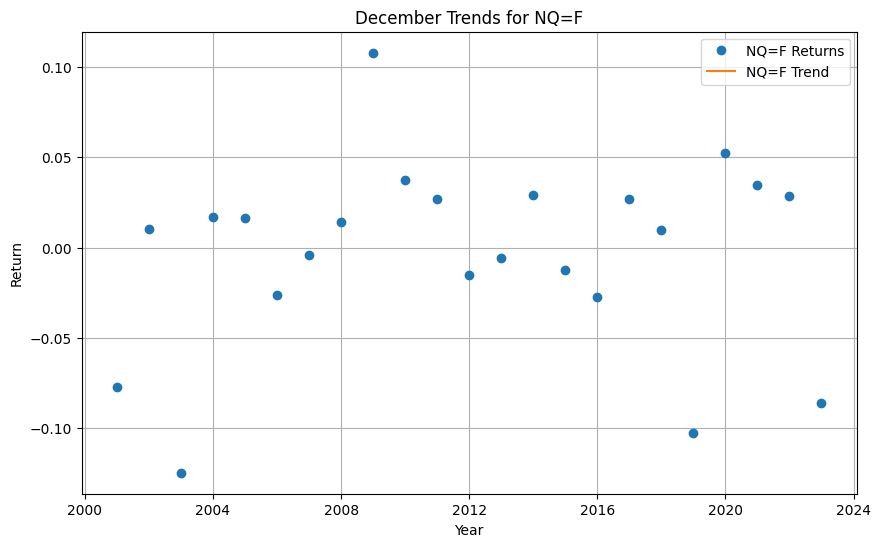

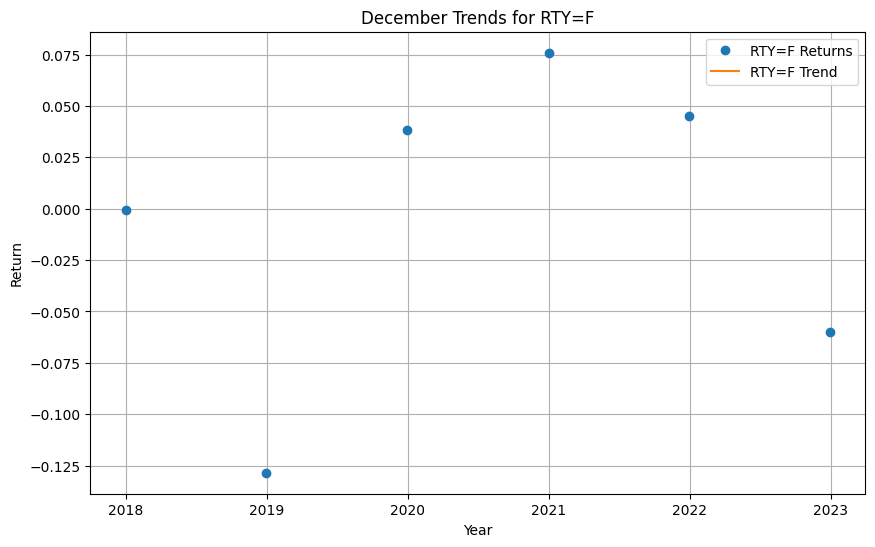

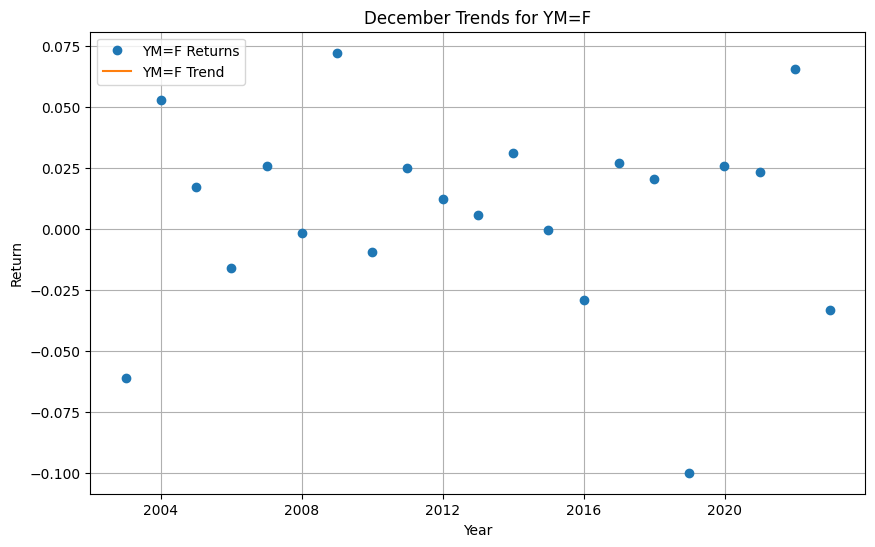

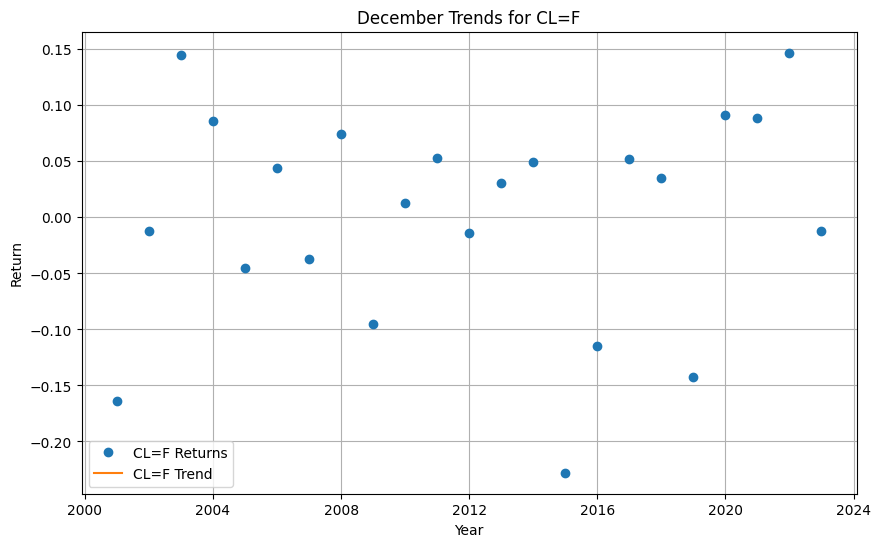

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def calculate_trend(symbol_data):
    # Extract returns
    returns = (symbol_data['Close'].resample('M').last() / symbol_data['Close'].resample('M').first()) - 1

    # Fit a linear regression model
    X = np.arange(len(returns))
    X = sm.add_constant(X)
    model = sm.OLS(returns, X).fit()
    predictions = model.predict(X)

    return returns, predictions

# For the month of December
dec_trends = {}
for symbol in symbols:
    symbol_data = data[symbol][data[symbol].index.month == 12]
    dec_trends[symbol] = calculate_trend(symbol_data)

for symbol, (returns, predictions) in dec_trends.items():
    plt.figure(figsize=(10, 6))
    plt.plot(returns.index, returns.values, 'o', label=f'{symbol} Returns')
    plt.plot(returns.index, predictions, label=f'{symbol} Trend')
    plt.title(f'December Trends for {symbol}')
    plt.ylabel('Return')
    plt.xlabel('Year')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'December_Trends_{symbol}.png')
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_avg_daily_trend_for_symbol(data, symbol, months, title):
    # Formulate the column name based on the symbol
    column_name = f'Close_{symbol}'

    # Filter the data for the desired months
    filtered_data = data[data.index.month.isin(months)]

    # Group by day and compute the mean
    daily_avg = filtered_data.groupby(filtered_data.index.day)[column_name].mean()

    # Plotting
    daily_avg.plot(figsize=(12, 6), title=title, grid=True)
    plt.xlabel('Day')
    plt.ylabel('Average Value')
    plt.show()

# For symbol CL
# November
plot_avg_daily_trend_for_symbol(data, 'CL', [11], 'Average Day-to-Day Trend for November (CL)')

# 4th quarter
plot_avg_daily_trend_for_symbol(data, 'CL', [10, 11, 12], 'Average Day-to-Day Trend for 4th Quarter (CL)')

# You can repeat the above for 'BTC', 'ETC', or any other symbol you are interested in.


KeyError: ignored

In [ ]:
data.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_avg_daily_trend(data, column_name, months, title):
    # Filter the data for the desired months
    filtered_data = data[data.index.month.isin(months)]

    # Group by day and compute the mean
    daily_avg = filtered_data.groupby(filtered_data.index.day)[column_name].mean()

    # Plotting
    daily_avg.plot(figsize=(12, 6), title=title, grid=True)
    plt.xlabel('Day')
    plt.ylabel('Average Value')
    plt.show()

# Choosing the first 'Close' column for plotting
column_name = 'Close'

# For the month of November
plot_avg_daily_trend(data, column_name, [11], 'Average Day-to-Day Trend for November')

# For the 4th quarter (October, November, December)
plot_avg_daily_trend(data, column_name, [10, 11, 12], 'Average Day-to-Day Trend for 4th Quarter')
``


SyntaxError: ignored

[*********************100%%**********************]  6 of 6 completed


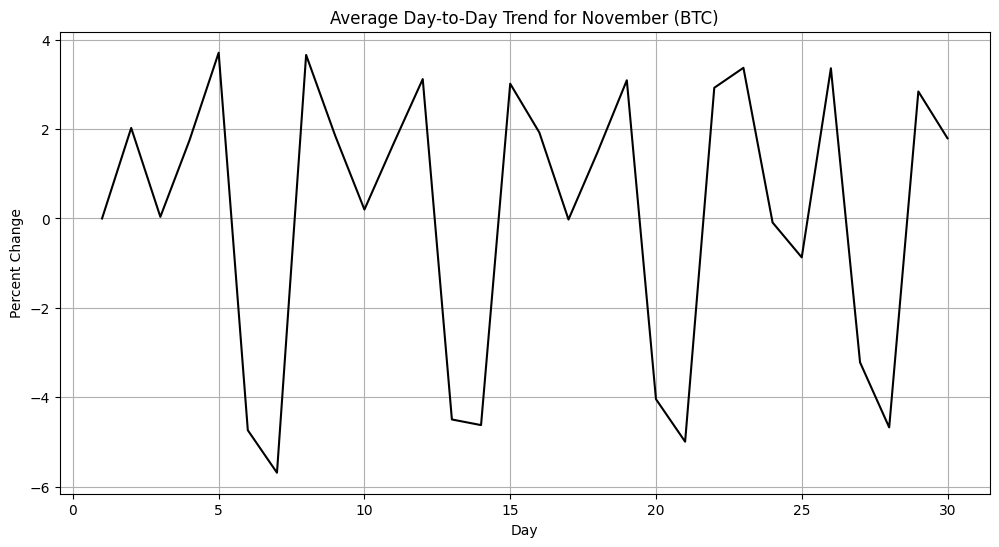

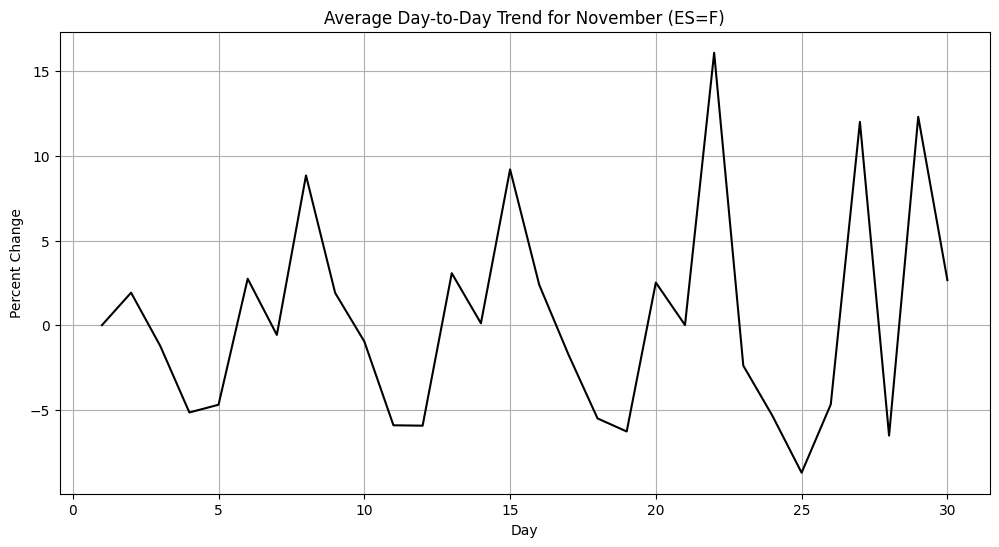

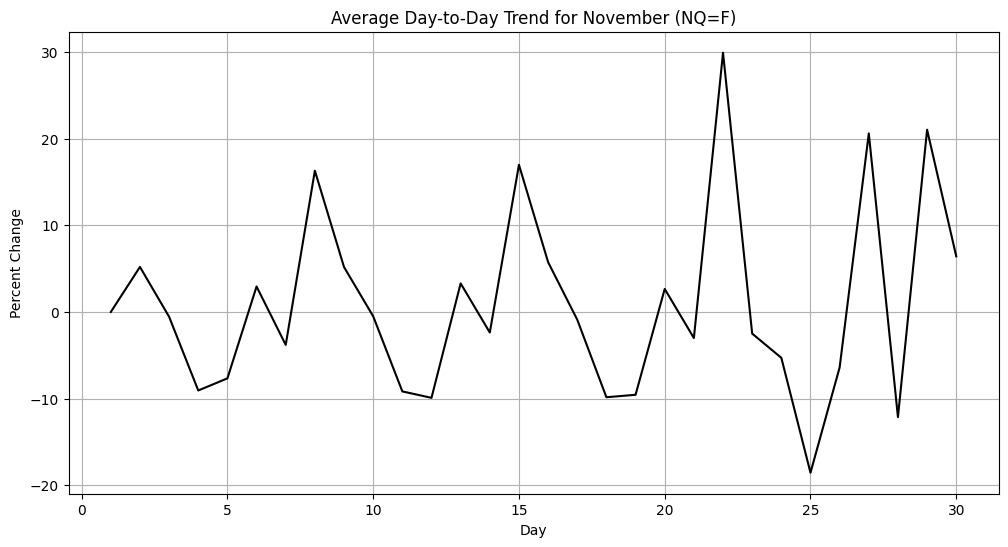

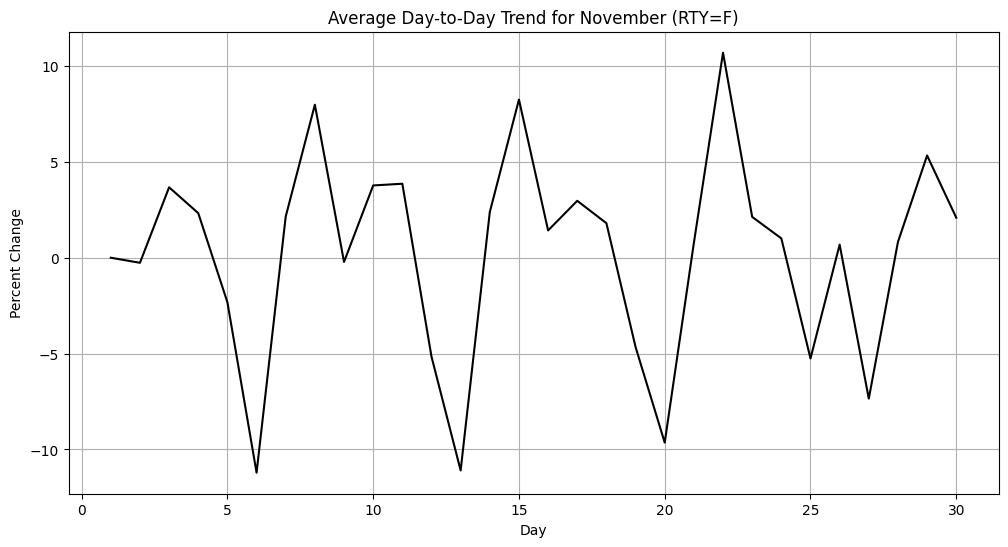

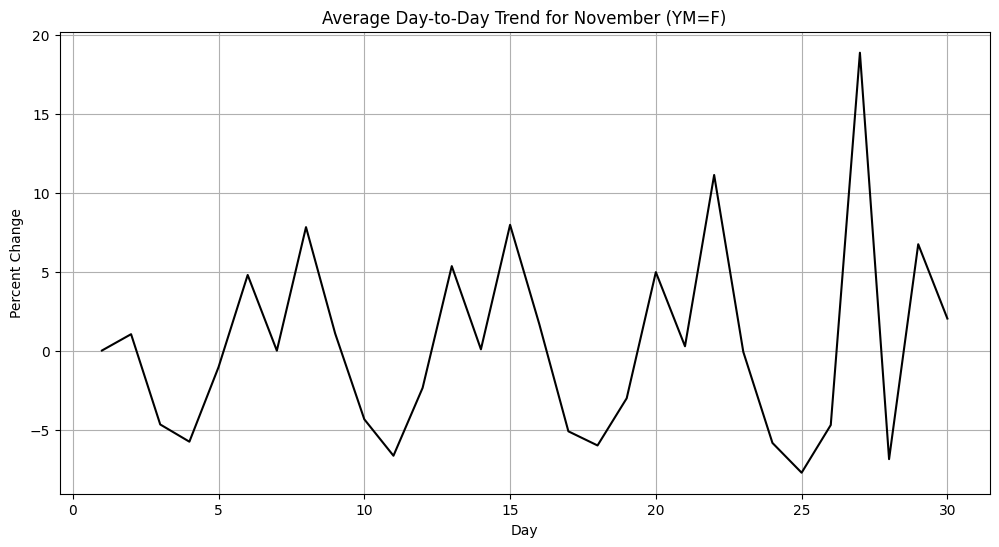

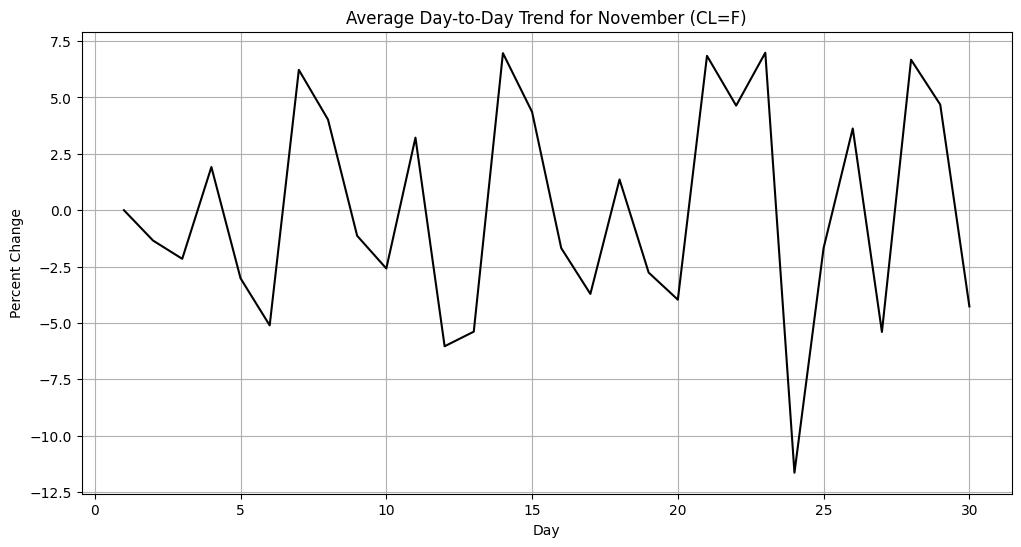

[*********************100%%**********************]  6 of 6 completed


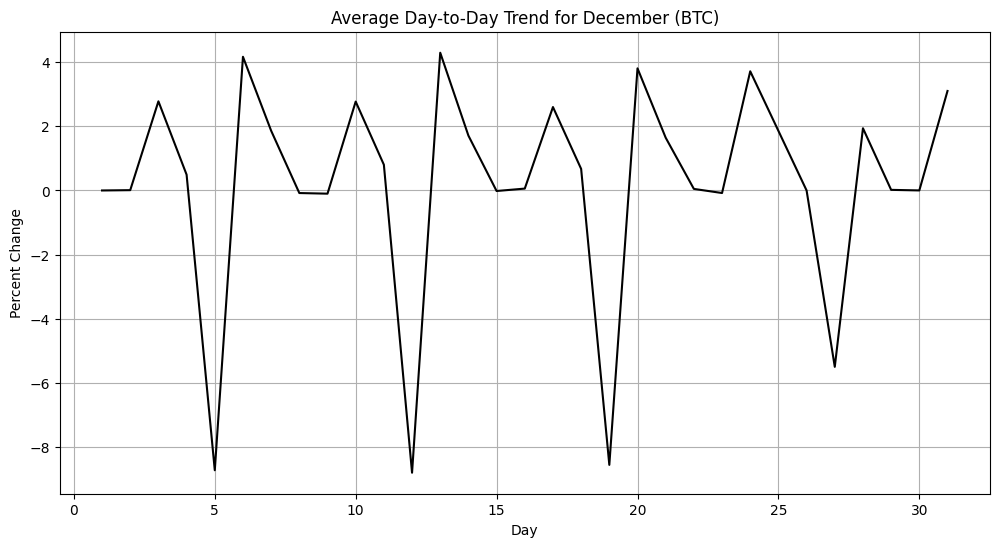

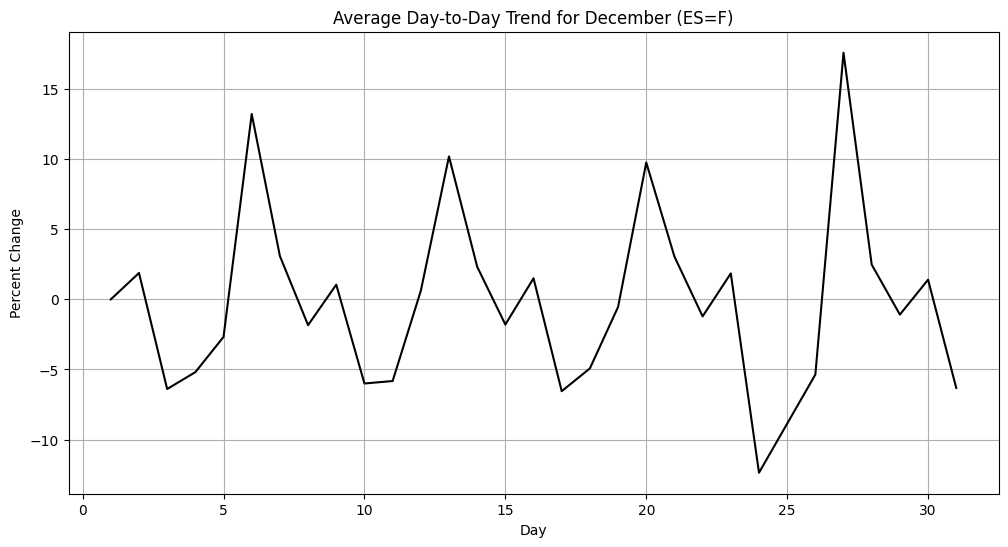

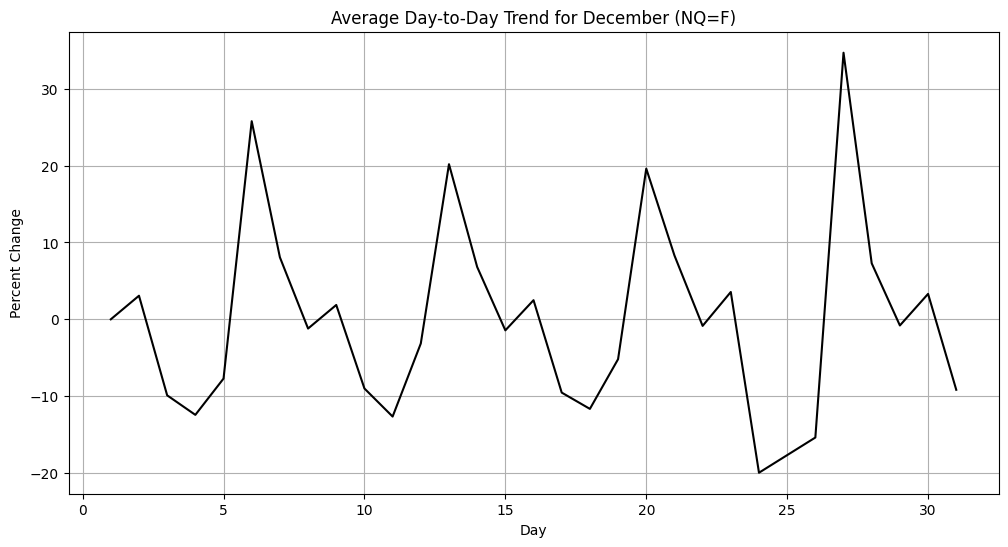

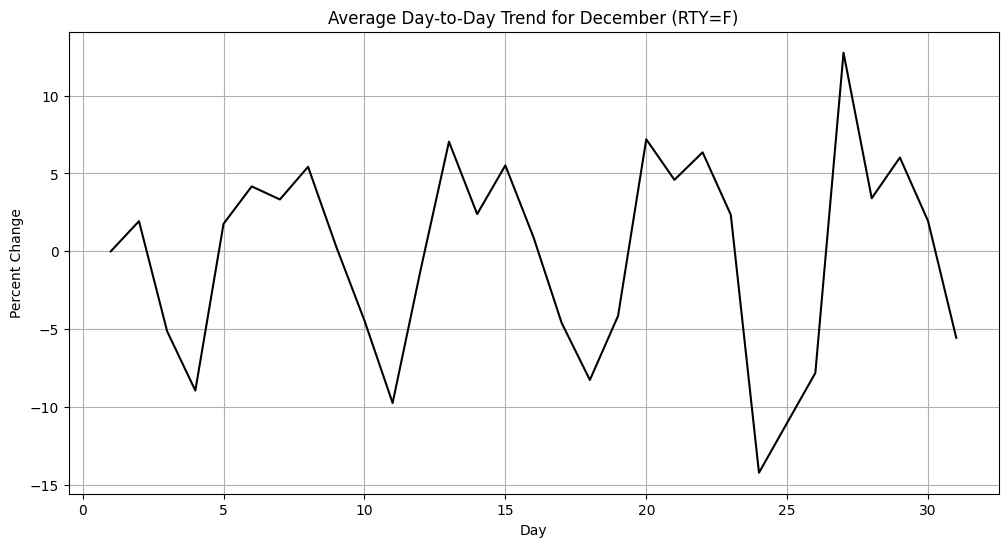

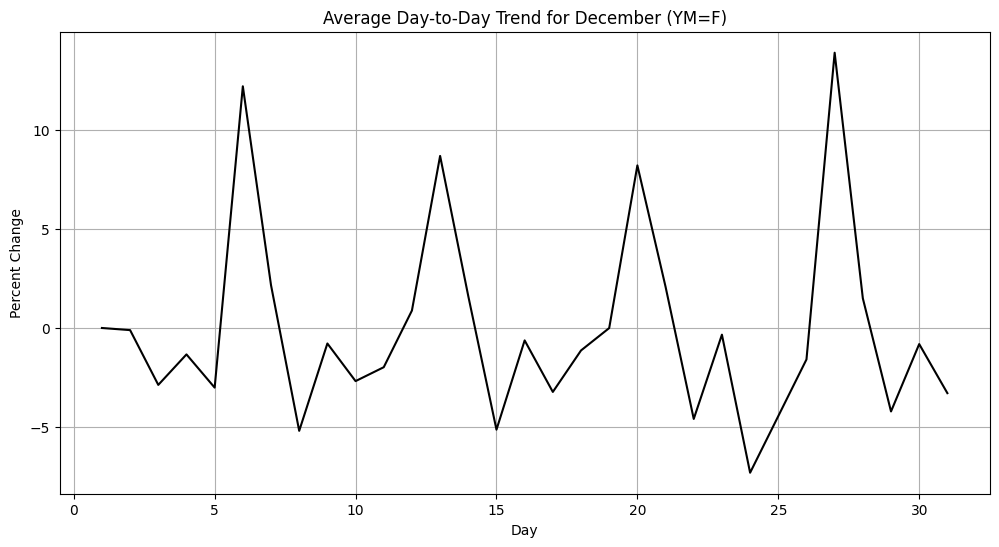

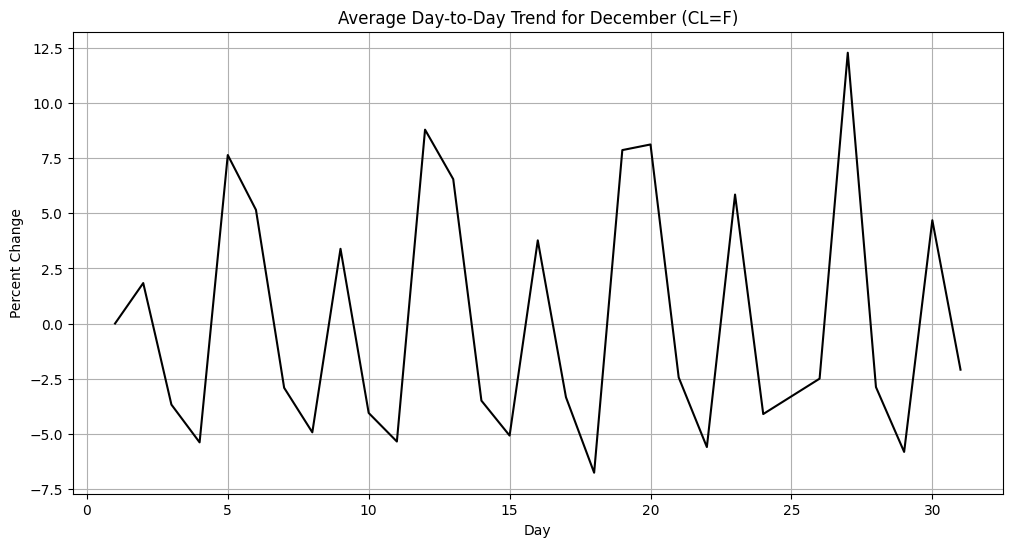

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]
data = yf.download(symbols, start="2000-01-01", end="2023-12-01", group_by='ticker')

# Rename columns with prefix
for symbol in symbols:
    for col in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
        data[f"{symbol}_{col}"] = data[symbol][col]

# Drop the original grouped columns
data = data.drop(columns=symbols, level=0)

def plot_avg_daily_trend_for_symbol(data, symbol, months, title):
    # Formulate the column name based on the symbol
    column_name = f'{symbol}_Close'

    # Filter the data for the desired months
    filtered_data = data[data.index.month.isin(months)]

    # Group by day and compute the mean
    daily_avg = filtered_data.groupby(filtered_data.index.day)[column_name].mean()

    # Calculate percent change from the first day of the month
    daily_avg = daily_avg.pct_change().fillna(0) * 100

    # Plotting with black line color
    daily_avg.plot(figsize=(12, 6), title=title, grid=True, color='black')
    plt.xlabel('Day')
    plt.ylabel('Percent Change')
    plt.show()

# Remaining code stays the same


# For each symbol
for symbol in symbols:
    # November
    plot_avg_daily_trend_for_symbol(data, symbol, [11], f'Average Day-to-Day Trend for November ({symbol})')

    # 4th quarter (commented out as per your example)
    # plot_avg_daily_trend_for_symbol(data, symbol, [10, 11, 12], f'Average Day-to-Day Trend for 4th Quarter ({symbol})')
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]
data = yf.download(symbols, start="2000-01-01", end="2023-12-01", group_by='ticker')

# Rename columns with prefix
for symbol in symbols:
    for col in ["Open", "High", "Low", "Close", "Adj Close", "Volume"]:
        data[f"{symbol}_{col}"] = data[symbol][col]

# Drop the original grouped columns
data = data.drop(columns=symbols, level=0)

def plot_avg_daily_trend_for_symbol(data, symbol, months, title):
    # Formulate the column name based on the symbol
    column_name = f'{symbol}_Close'

    # Filter the data for the desired months
    filtered_data = data[data.index.month.isin(months)]

    # Group by day and compute the mean
    daily_avg = filtered_data.groupby(filtered_data.index.day)[column_name].mean()

    # Calculate percent change from the first day of the month
    daily_avg = daily_avg.pct_change().fillna(0) * 100

    # Plotting with black line color
    daily_avg.plot(figsize=(12, 6), title=title, grid=True, color='black')
    plt.xlabel('Day')
    plt.ylabel('Percent Change')
    plt.show()

# For each symbol
for symbol in symbols:
    # November
    plot_avg_daily_trend_for_symbol(data, symbol, [12], f'Average Day-to-Day Trend for December ({symbol})')

    # 4th quarter (uncomment this part if needed)
    # plot_avg_daily_trend_for_symbol(data, symbol, [10, 11, 12], f'Average Day-to-Day Trend for 4th Quarter ({symbol})')


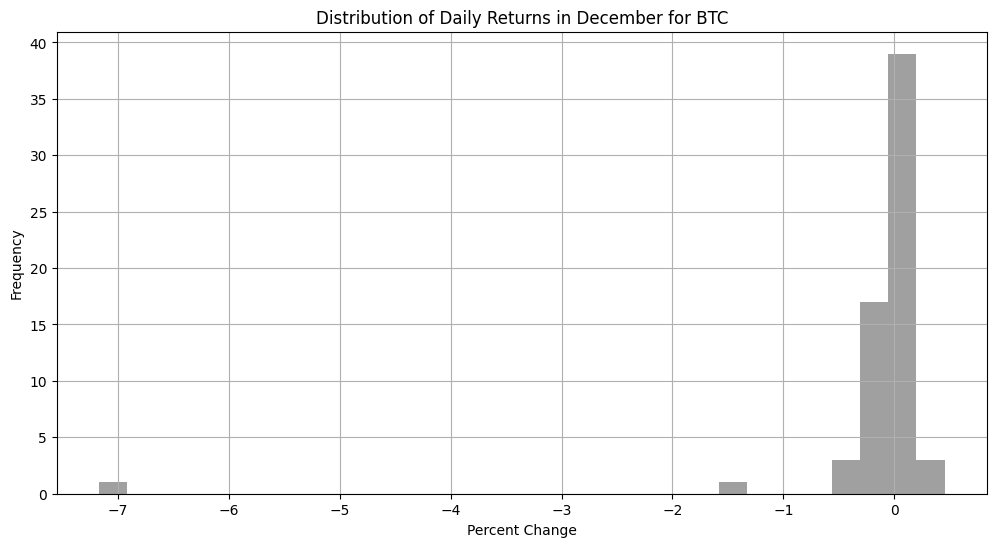

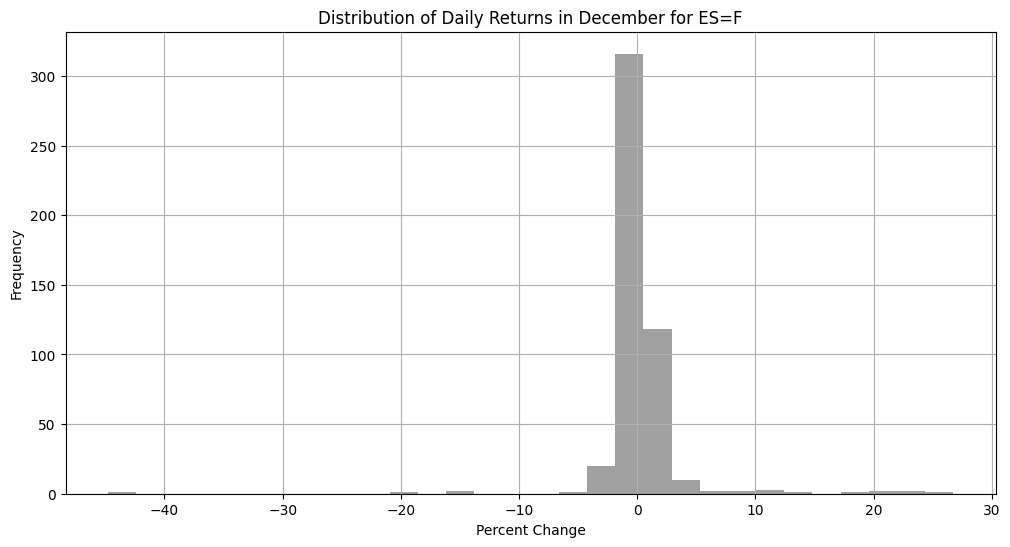

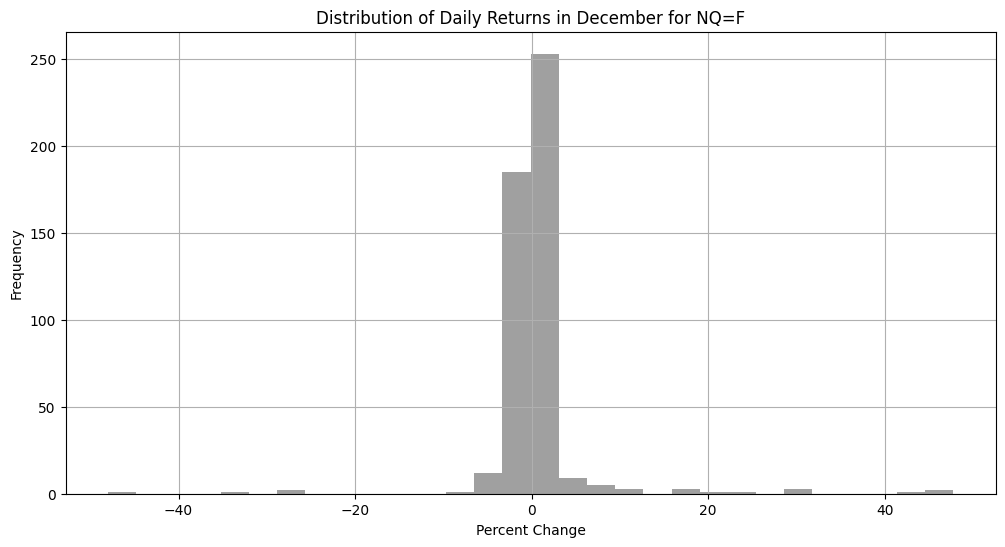

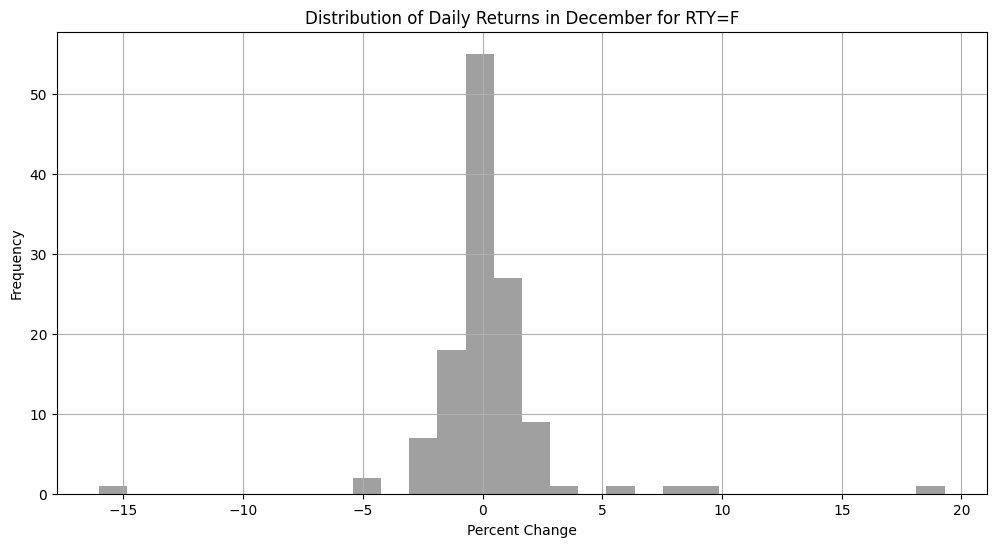

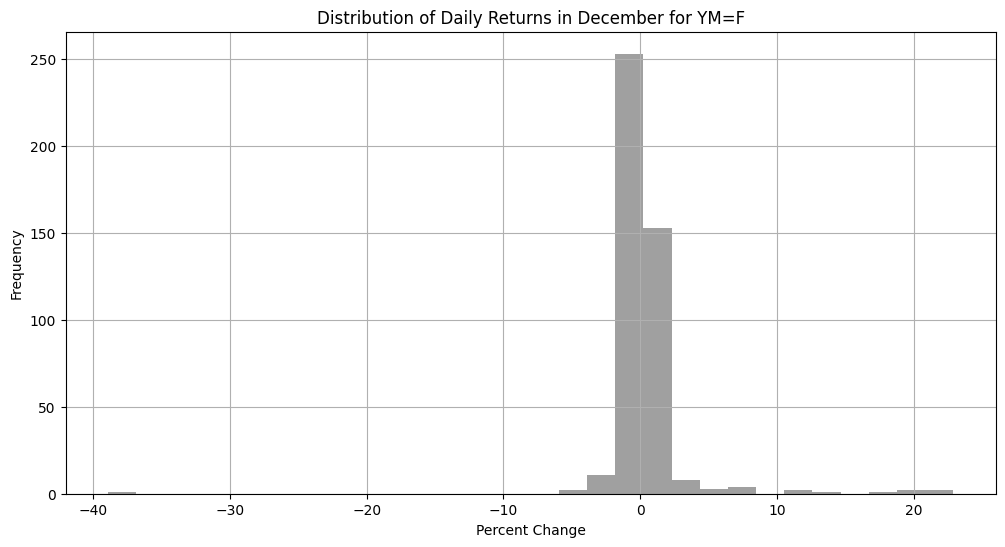

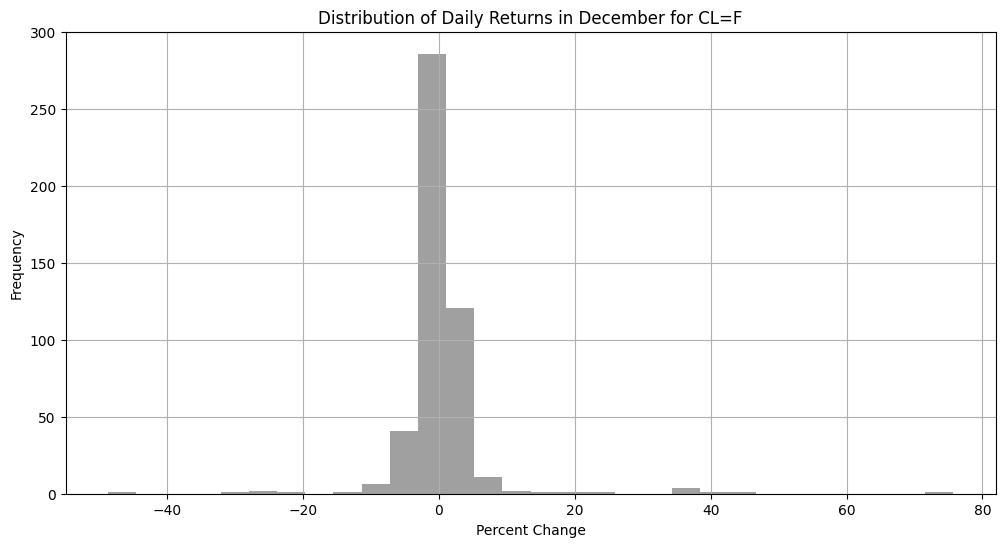

In [ ]:
def plot_daily_returns_distribution(data, symbol, month):
    # Formulate the column name based on the symbol
    column_name = f'{symbol}_Close'

    # Filter the data for the desired month
    filtered_data = data[data.index.month == month]

    # Calculate day-to-day percent change
    daily_returns = filtered_data[column_name].pct_change().dropna() * 100

    # Plotting
    plt.figure(figsize=(12, 6))
    daily_returns.hist(bins=30, color='grey', alpha=0.75)
    plt.title(f'Distribution of Daily Returns in December for {symbol}')
    plt.xlabel('Percent Change')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# For each symbol
for symbol in symbols:
    plot_daily_returns_distribution(data, symbol, 12)


In [ ]:
import yfinance as yf
import pandas as pd

# Fetch the data
symbols = ["BTC", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]
data = yf.download(symbols, start="2000-01-01", end="2023-12-01", group_by='ticker')

# Compute daily returns and volatility for each symbol
volatilities = {}
for symbol in symbols:
    close_prices = data[symbol]['Close']
    daily_returns = close_prices.pct_change().dropna()  # Calculate daily returns
    volatility = daily_returns.std()  # Calculate standard deviation which represents volatility
    volatilities[symbol] = volatility

# Convert the dictionary to a pandas DataFrame for better visualization
volatility_df = pd.DataFrame(list(volatilities.items()), columns=['Symbol', 'Volatility'])

print(volatility_df)


[*********************100%%**********************]  6 of 6 completed
  Symbol  Volatility
0    BTC    0.002371
1   ES=F    0.012397
2   NQ=F    0.016475
3  RTY=F    0.015867
4   YM=F    0.011625
5   CL=F    0.050583


[*********************100%%**********************]  1 of 1 completed


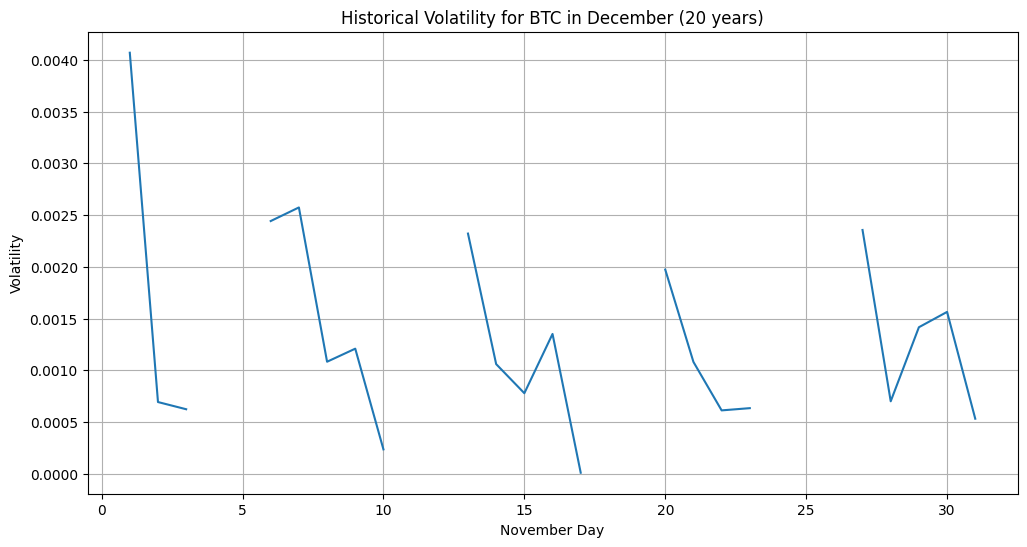

[*********************100%%**********************]  1 of 1 completed


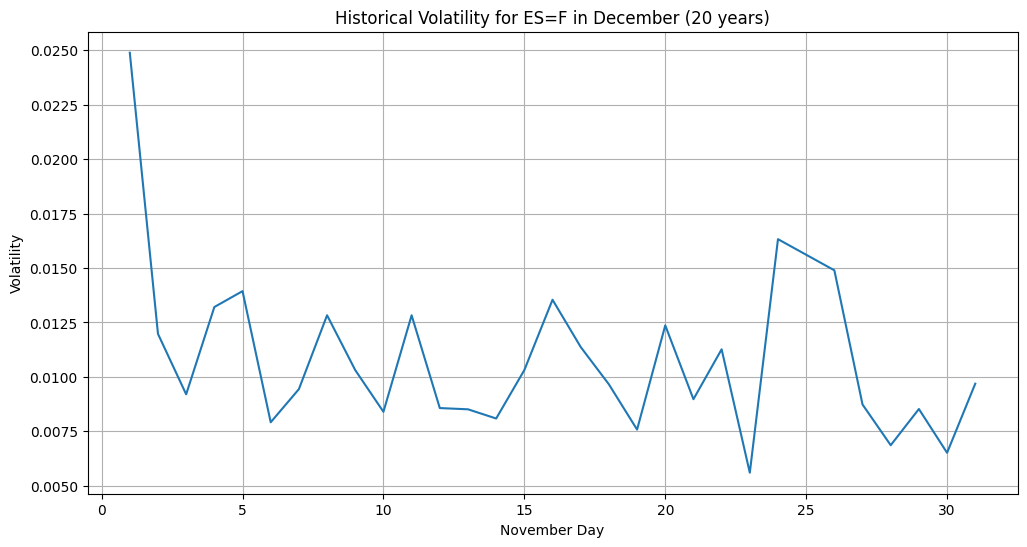

[*********************100%%**********************]  1 of 1 completed


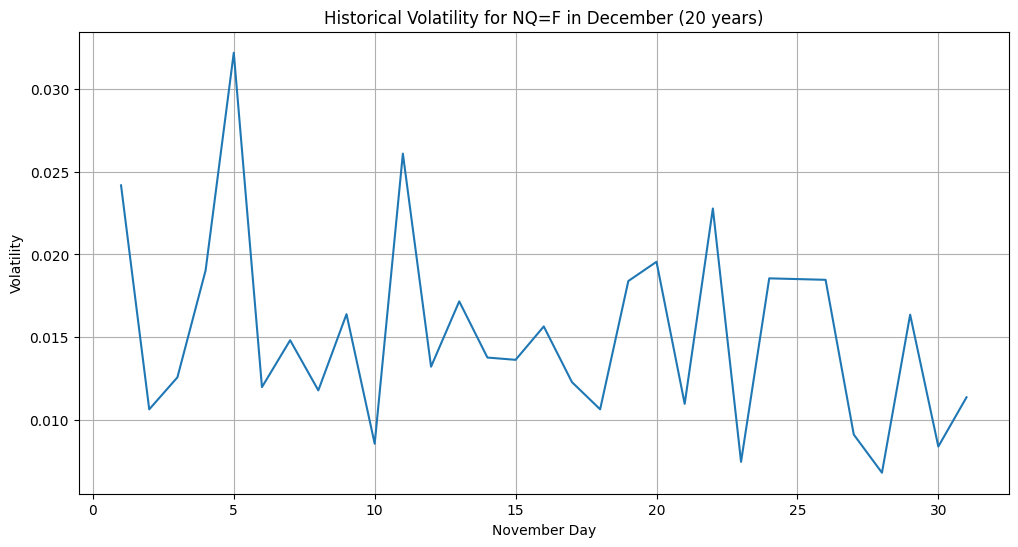

[*********************100%%**********************]  1 of 1 completed


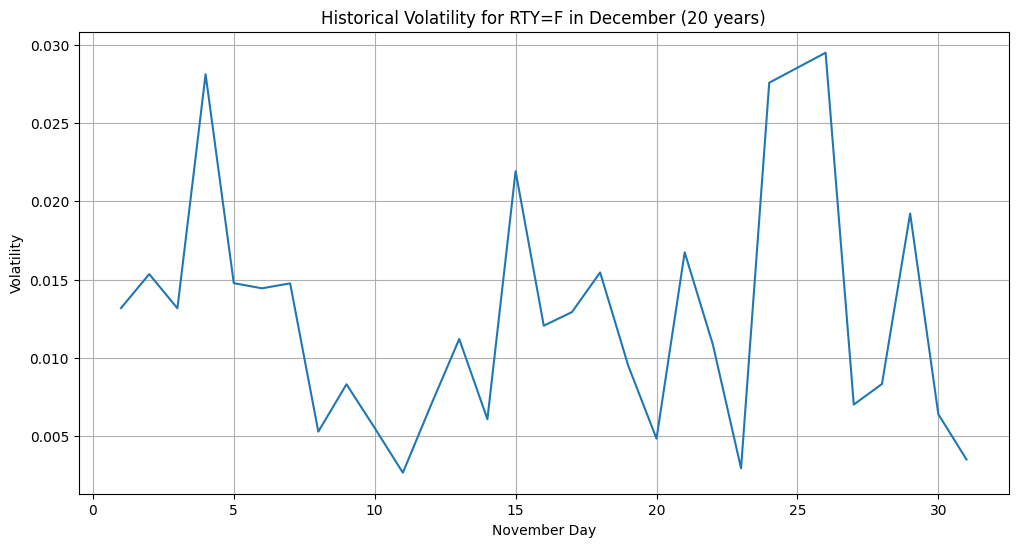

[*********************100%%**********************]  1 of 1 completed


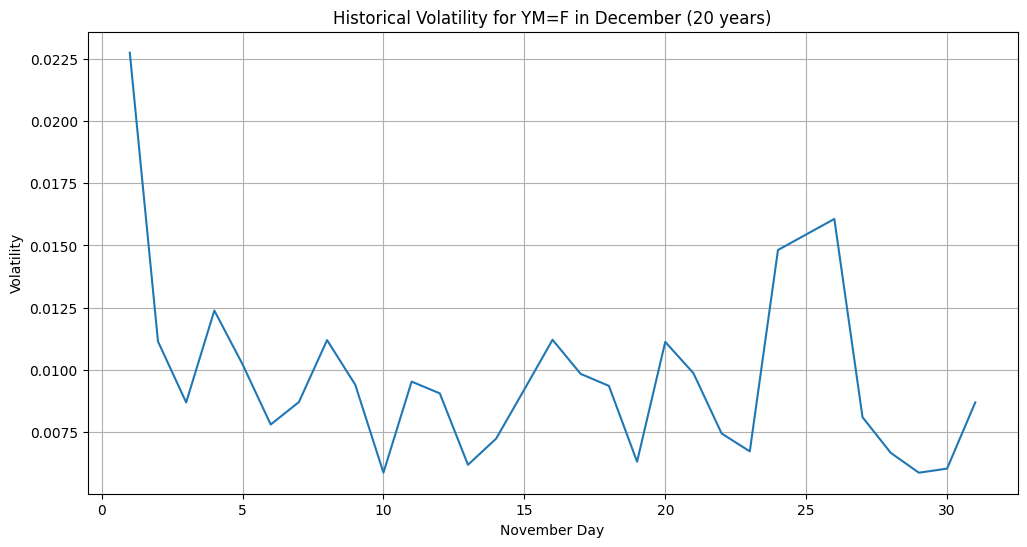

[*********************100%%**********************]  1 of 1 completed


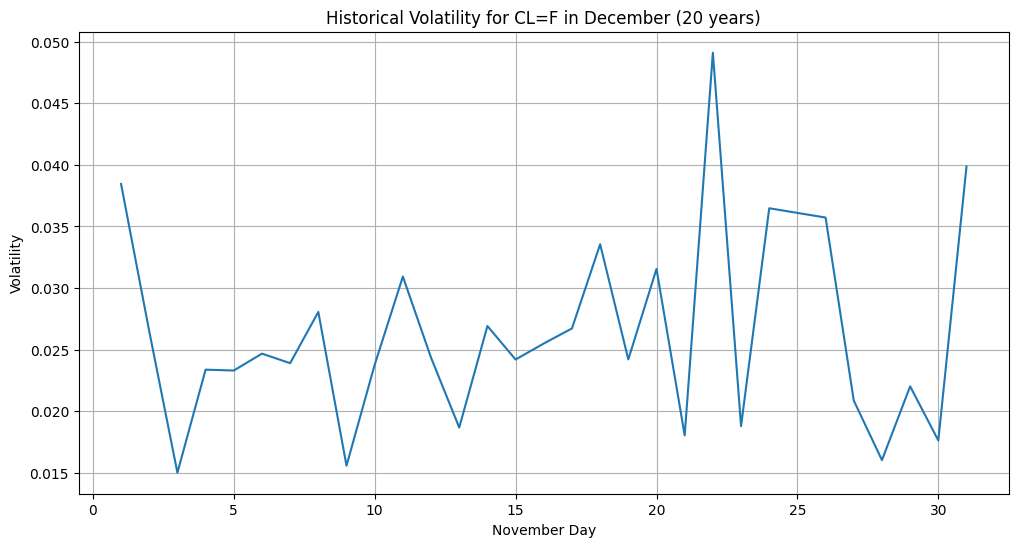

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def plot_november_historical_volatility(symbol):
    # Get historical data
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Extract only November data
    november_data = data[data.index.month == 12]

    # Calculate volatility for each day of November over all years
    volatilities = november_data.groupby(november_data.index.day)['Return'].std()

    # Plot
    volatilities.plot(figsize=(12, 6), title=f'Historical Volatility for {symbol} in December (20 years)', grid=True)
    plt.ylabel('Volatility')
    plt.xlabel('November Day')
    plt.show()

for symbol in symbols:
    plot_november_historical_volatility(symbol)


[*********************100%%**********************]  1 of 1 completed


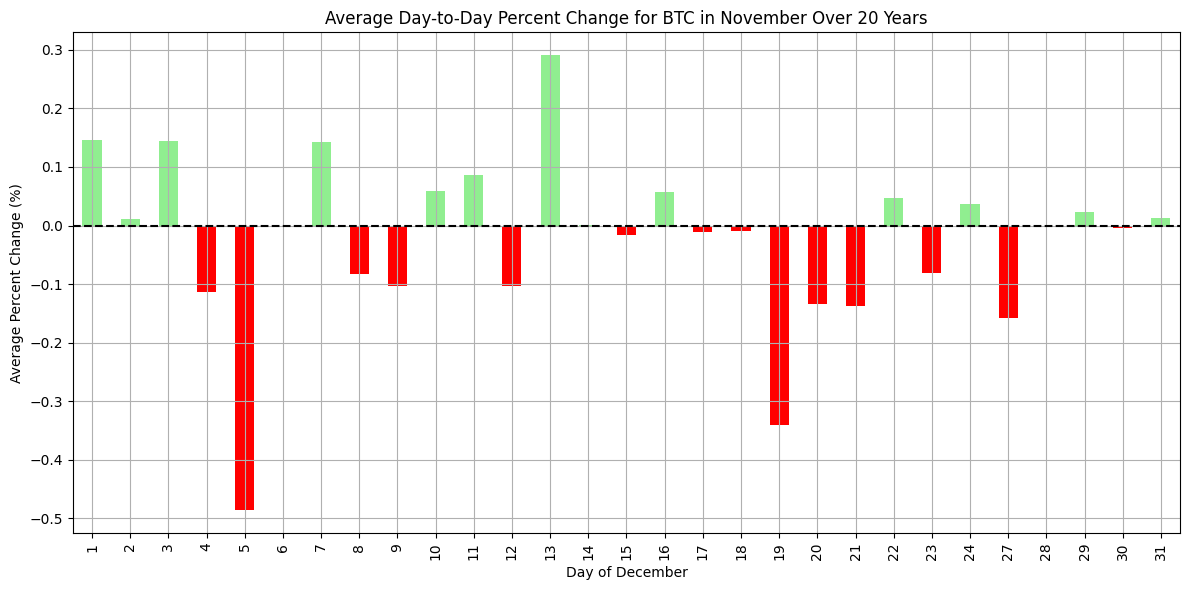

[*********************100%%**********************]  1 of 1 completed


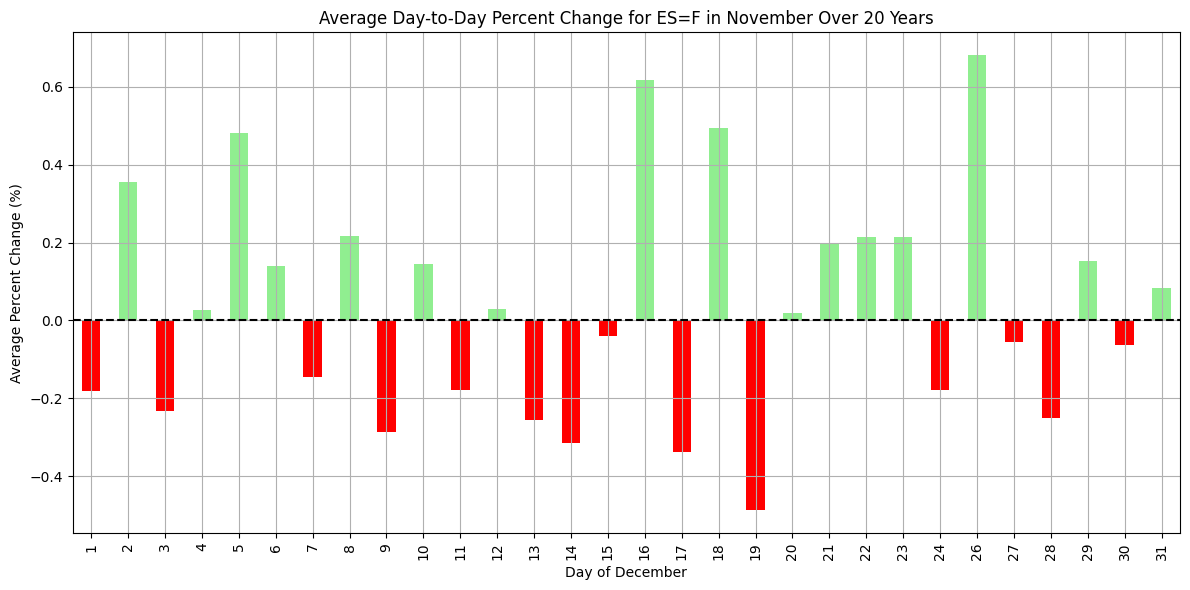

[*********************100%%**********************]  1 of 1 completed


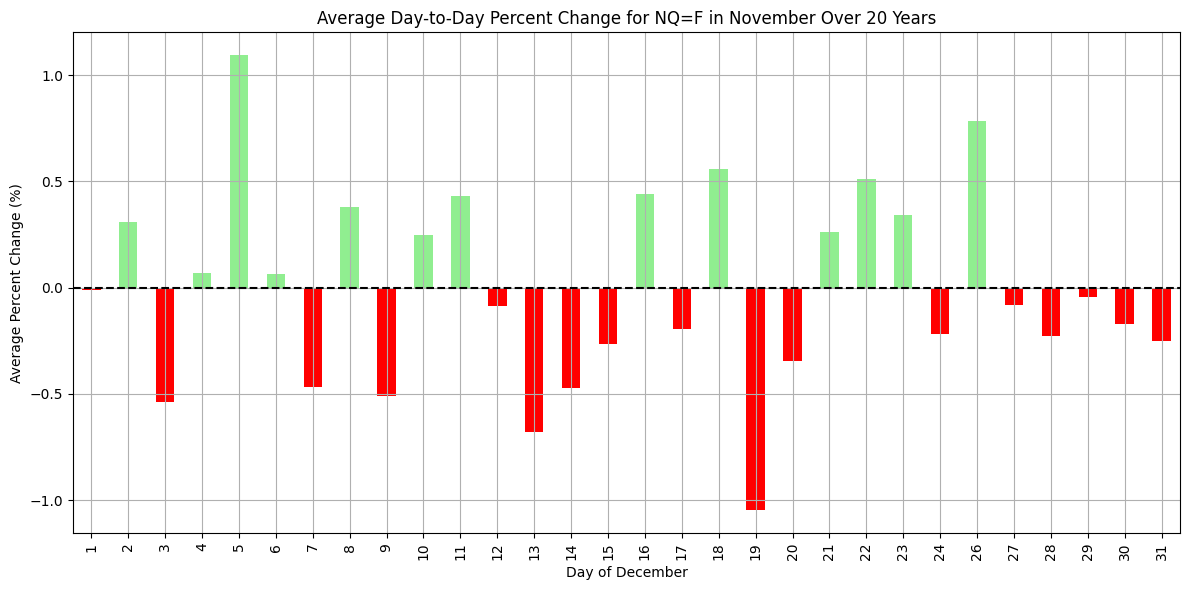

[*********************100%%**********************]  1 of 1 completed


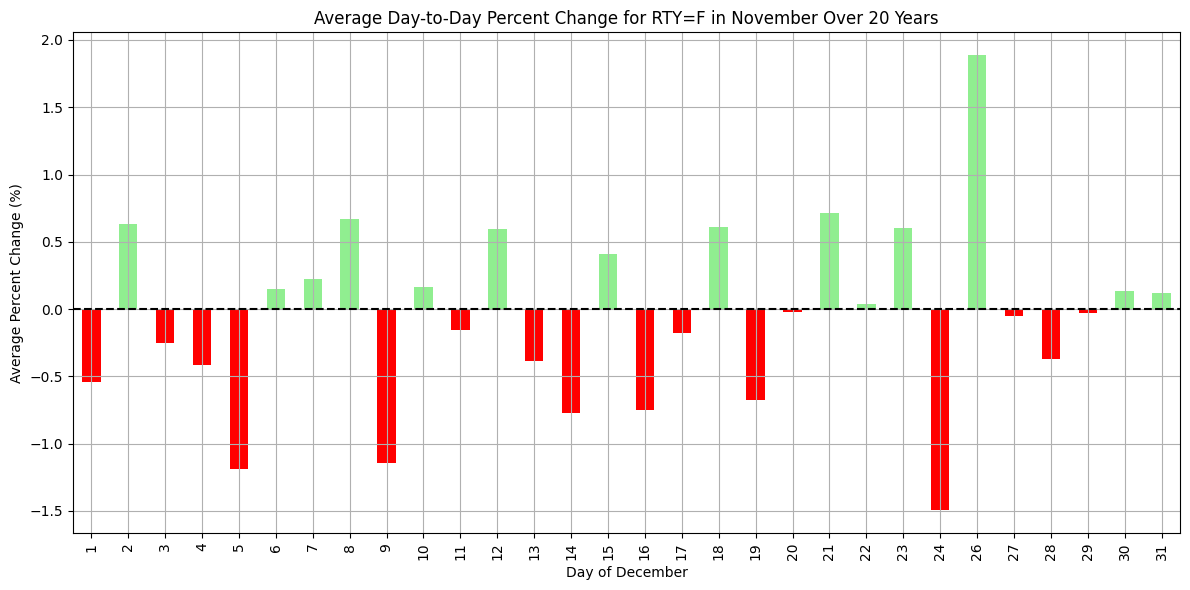

[*********************100%%**********************]  1 of 1 completed


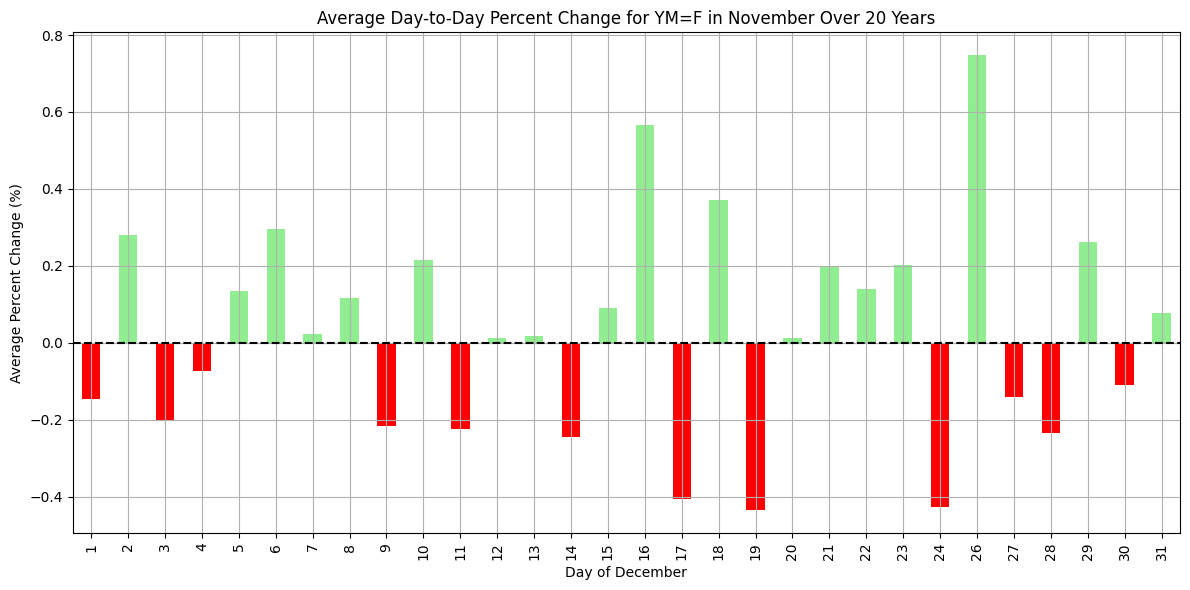

[*********************100%%**********************]  1 of 1 completed


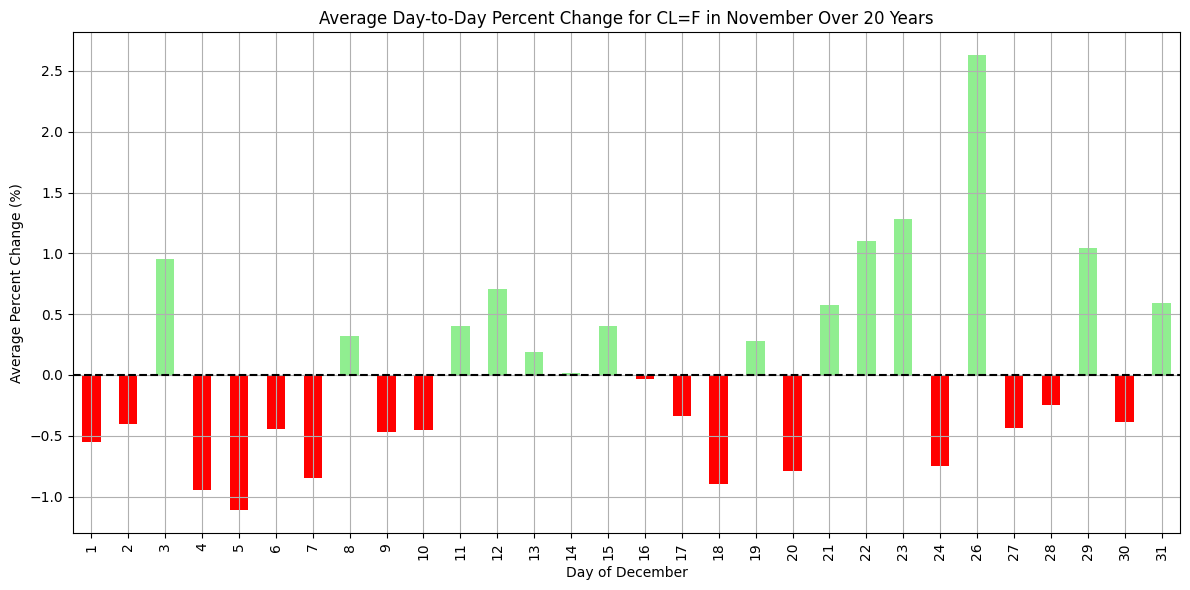

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def plot_november_historical_pct_change(symbol):
    # Get historical data
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change() * 100  # Multiply by 100 to get percentage

    # Extract only November data
    november_data = data[data.index.month == 12]

    # Group by day and calculate average percent change over 20 years
    avg_percent_change = november_data.groupby(november_data.index.day)['Return'].mean()

    # Define colors based on positive or negative values
    colors = ['lightgreen' if x > 0 else 'red' for x in avg_percent_change]

    # Plot
    avg_percent_change.plot(kind='bar', figsize=(12, 6), color=colors, title=f'Average Day-to-Day Percent Change for {symbol} in November Over 20 Years', grid=True)
    plt.axhline(0, color='black', linestyle='--')
    plt.ylabel('Average Percent Change (%)')
    plt.xlabel('Day of December')
    plt.tight_layout()
    plt.show()

for symbol in symbols:
    plot_november_historical_pct_change(symbol)


In [ ]:
# Function to compute the required ranges
def compute_ranges(symbol_data):
    # Day-to-Day
    daily_ranges = symbol_data['High'] - symbol_data['Low']

    # Week-to-Week
    weekly_max = symbol_data['High'].resample('W').max()
    weekly_min = symbol_data['Low'].resample('W').min()
    weekly_ranges = weekly_max - weekly_min

    # Monthly
    monthly_range = symbol_data['High'].max() - symbol_data['Low'].min()

    return daily_ranges, weekly_ranges, monthly_range

# Store the results in a dictionary
ranges_results = {}
for symbol in symbols:
    november_data = data[symbol][data[symbol].index.month == 12]
    daily, weekly, monthly = compute_ranges(november_data)
    ranges_results[symbol] = {
        'Daily Ranges': daily,
        'Weekly Ranges': weekly,
        'Monthly Range': monthly
    }

# You can now access the results from `ranges_results`. For example, to view the day-to-day ranges for BTC, you'd use:
# ranges_results['BTC']['Daily Ranges'].head()


[*********************100%%**********************]  1 of 1 completed


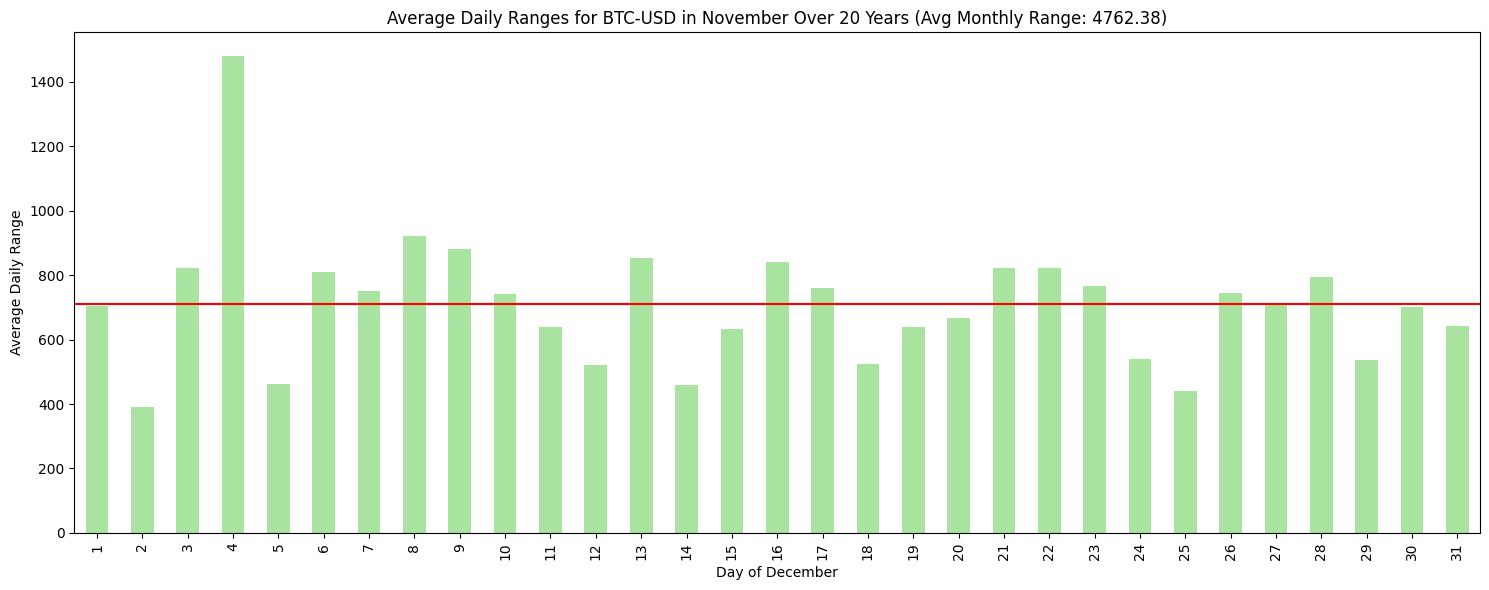

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



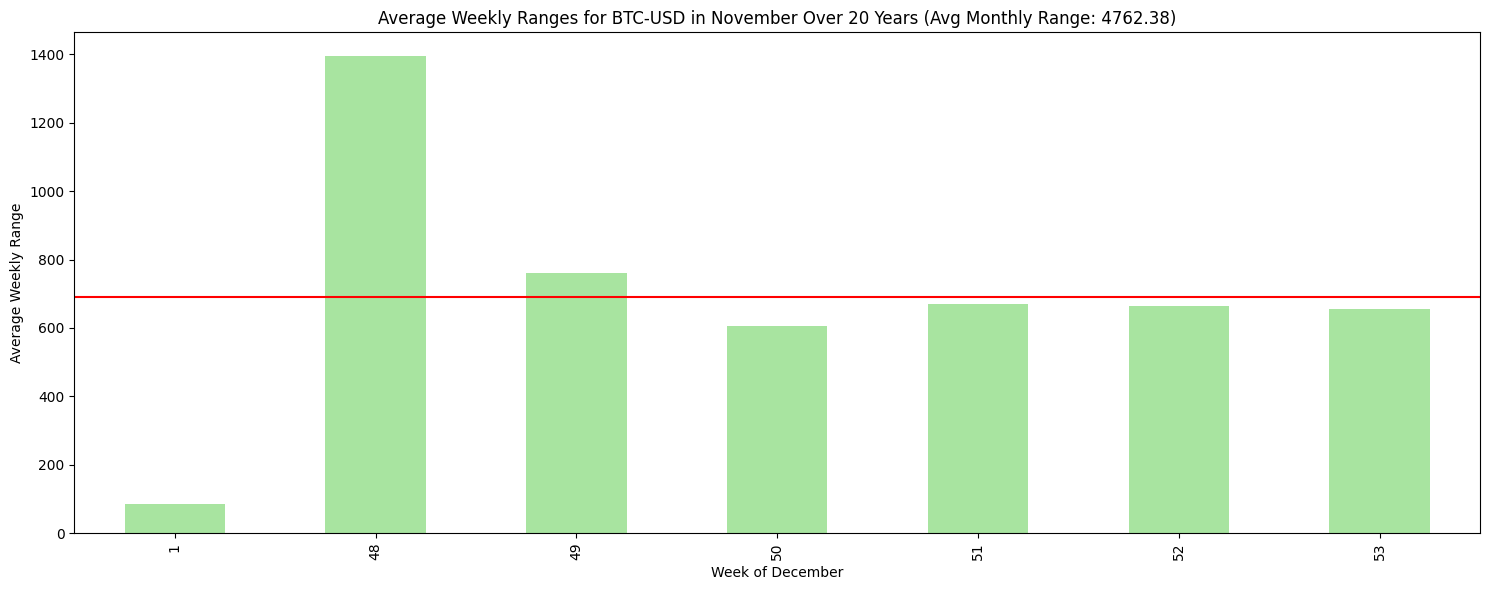

Average Monthly Range for BTC-USD in December over 20 years: 4762.38
[*********************100%%**********************]  1 of 1 completed


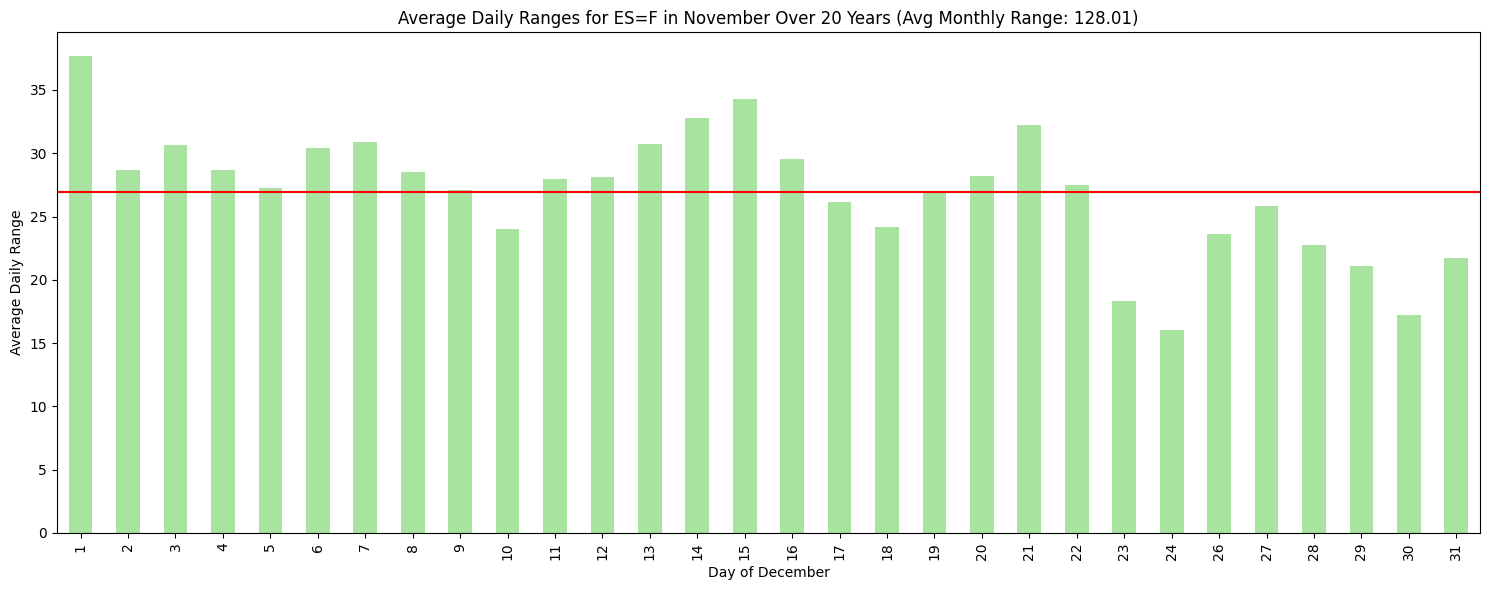

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



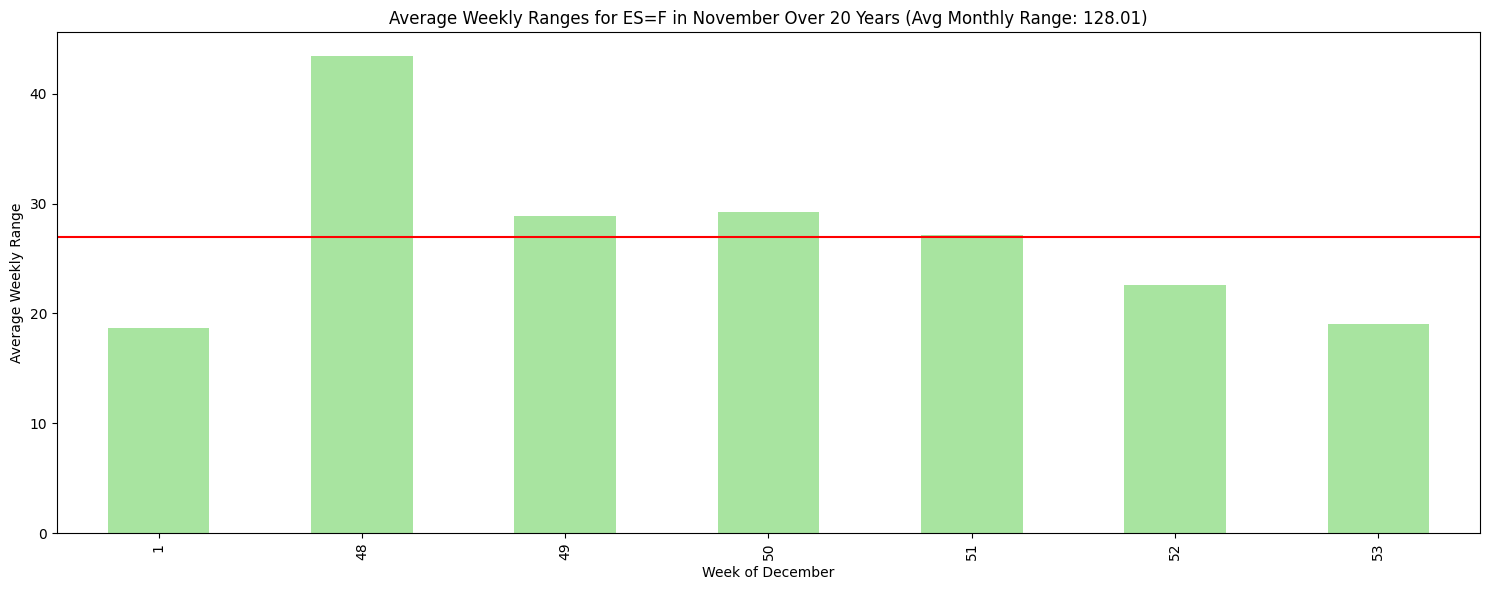

Average Monthly Range for ES=F in December over 20 years: 128.01
[*********************100%%**********************]  1 of 1 completed


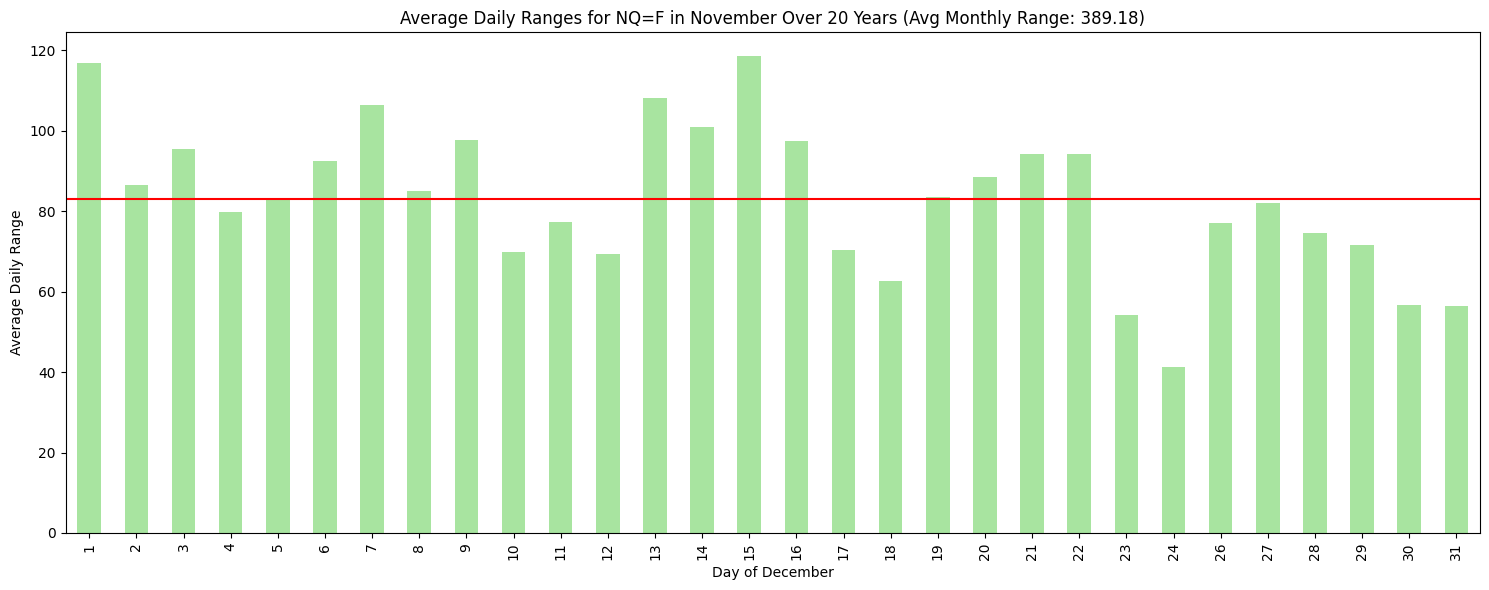

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



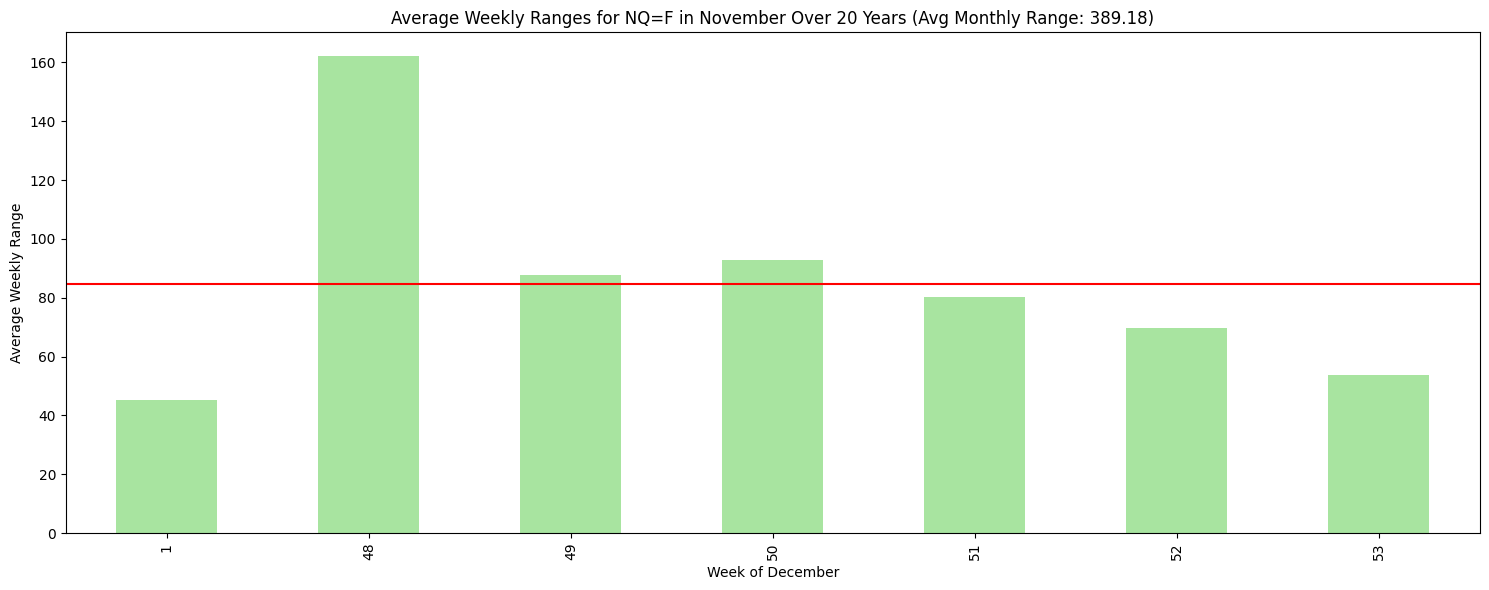

Average Monthly Range for NQ=F in December over 20 years: 389.18
[*********************100%%**********************]  1 of 1 completed


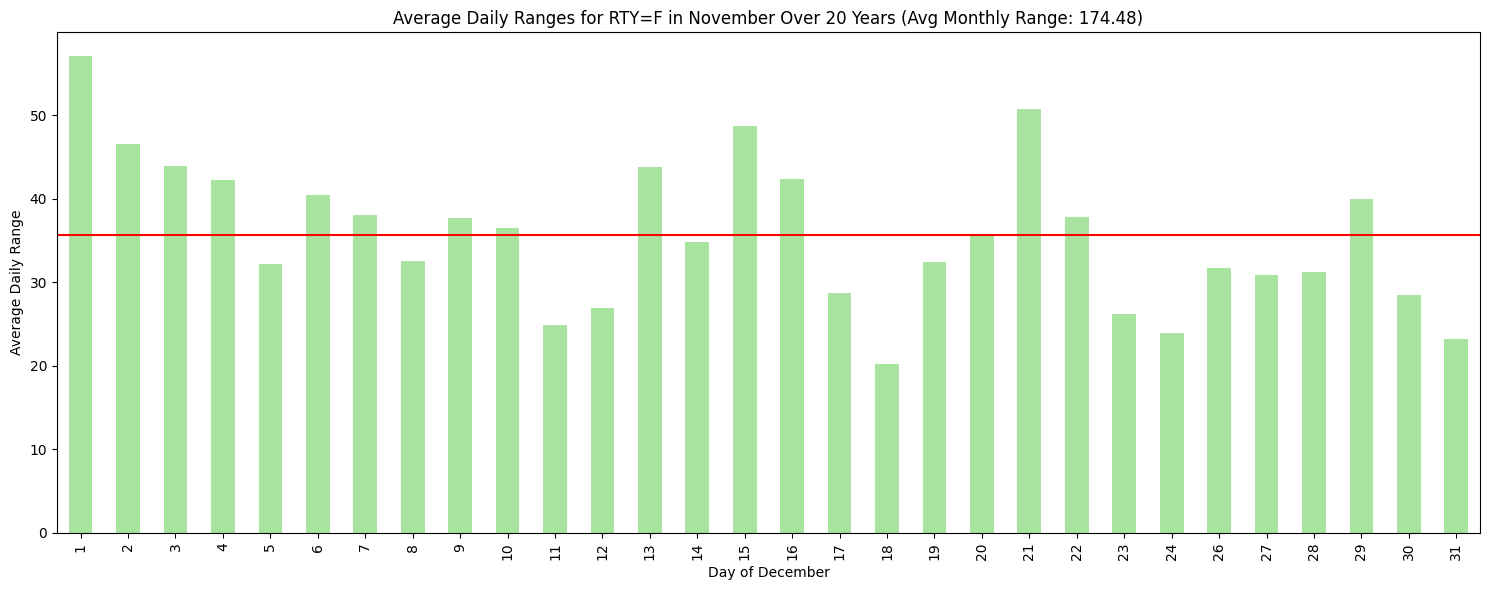

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



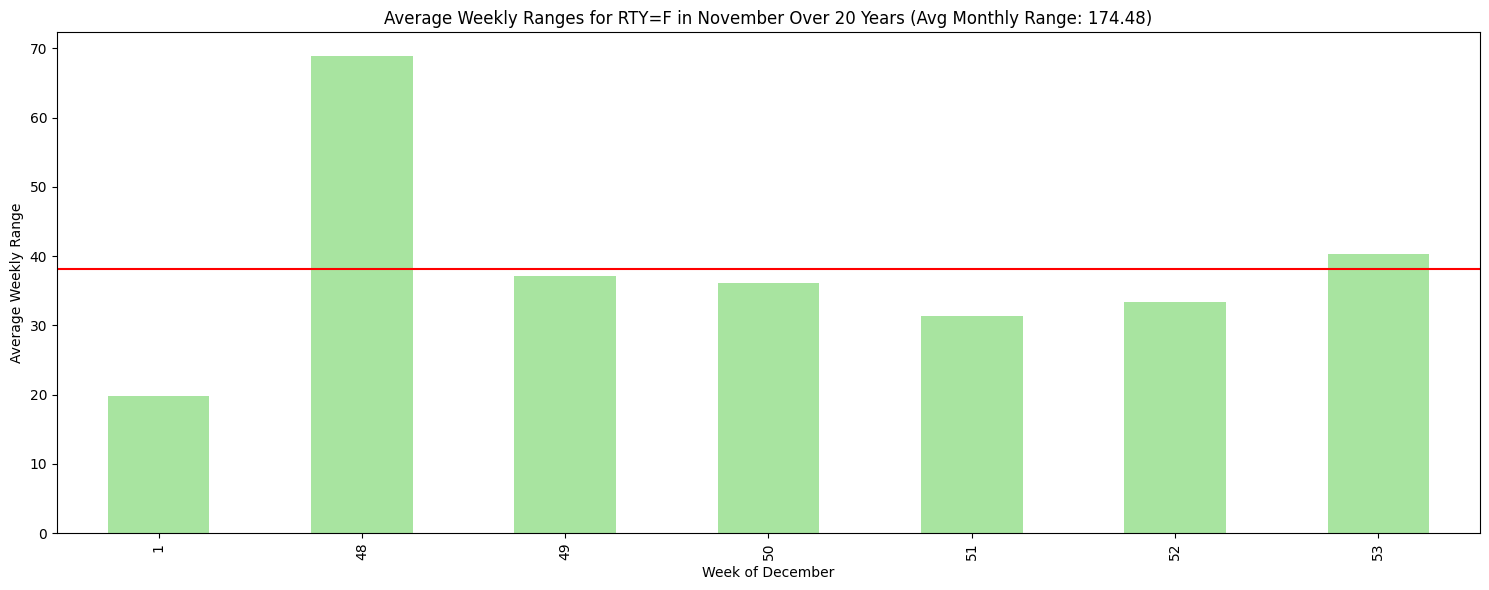

Average Monthly Range for RTY=F in December over 20 years: 174.48
[*********************100%%**********************]  1 of 1 completed


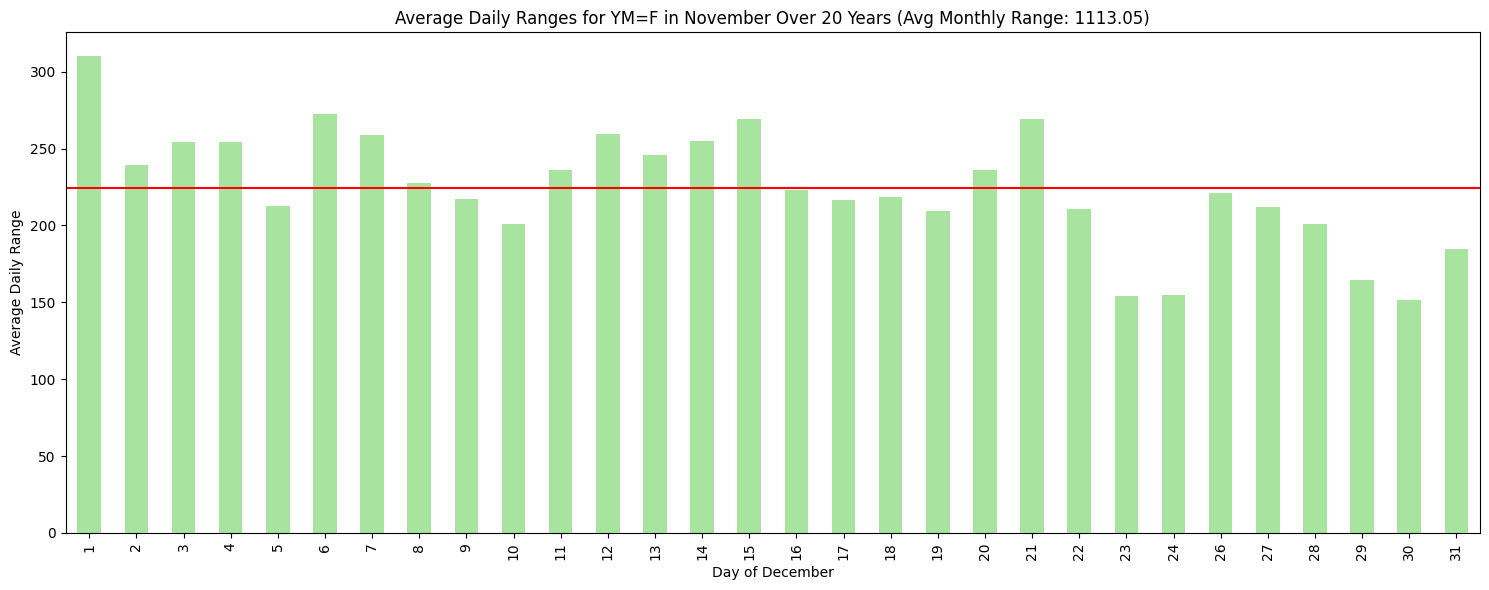

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



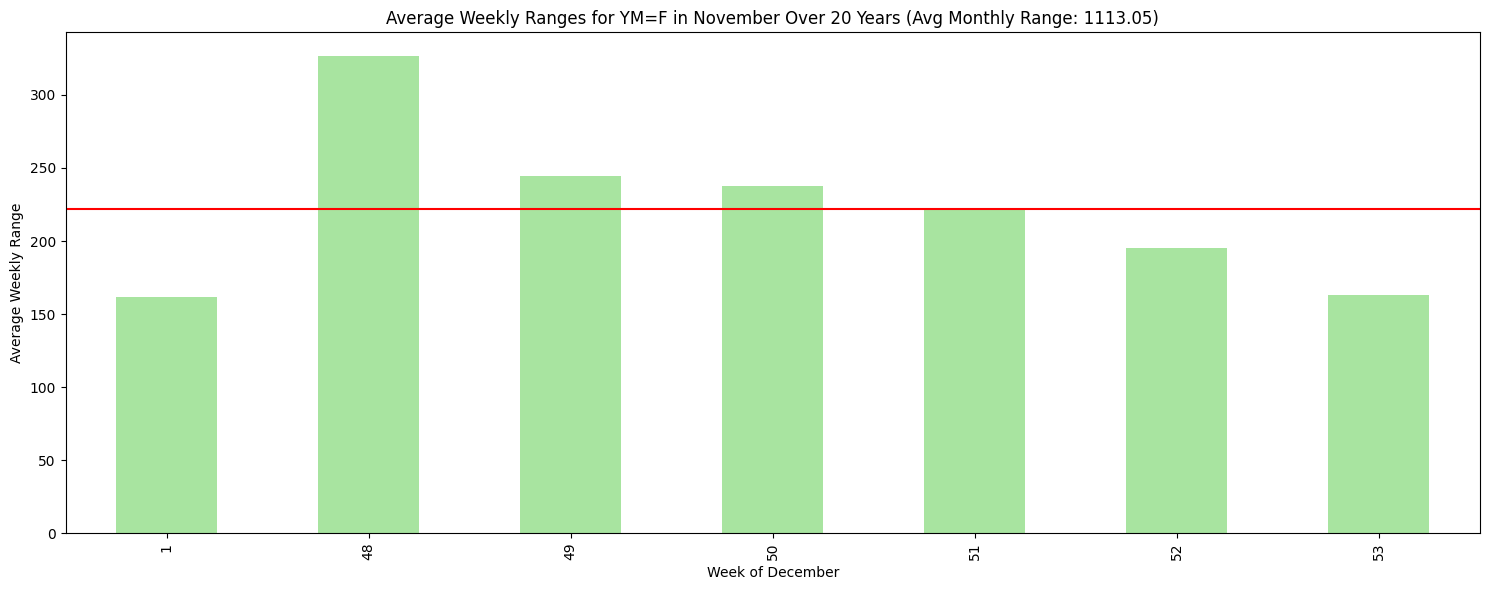

Average Monthly Range for YM=F in December over 20 years: 1113.05
[*********************100%%**********************]  1 of 1 completed


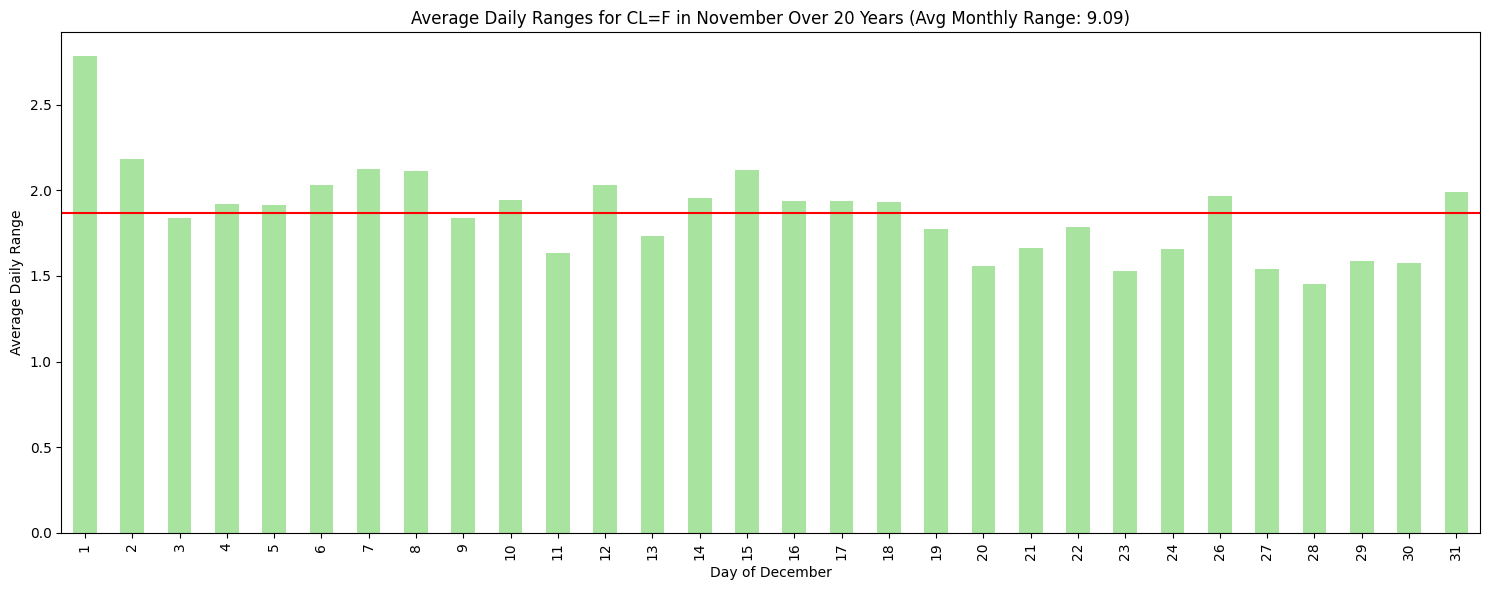

<ipython-input-30-289e4881f9ab>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



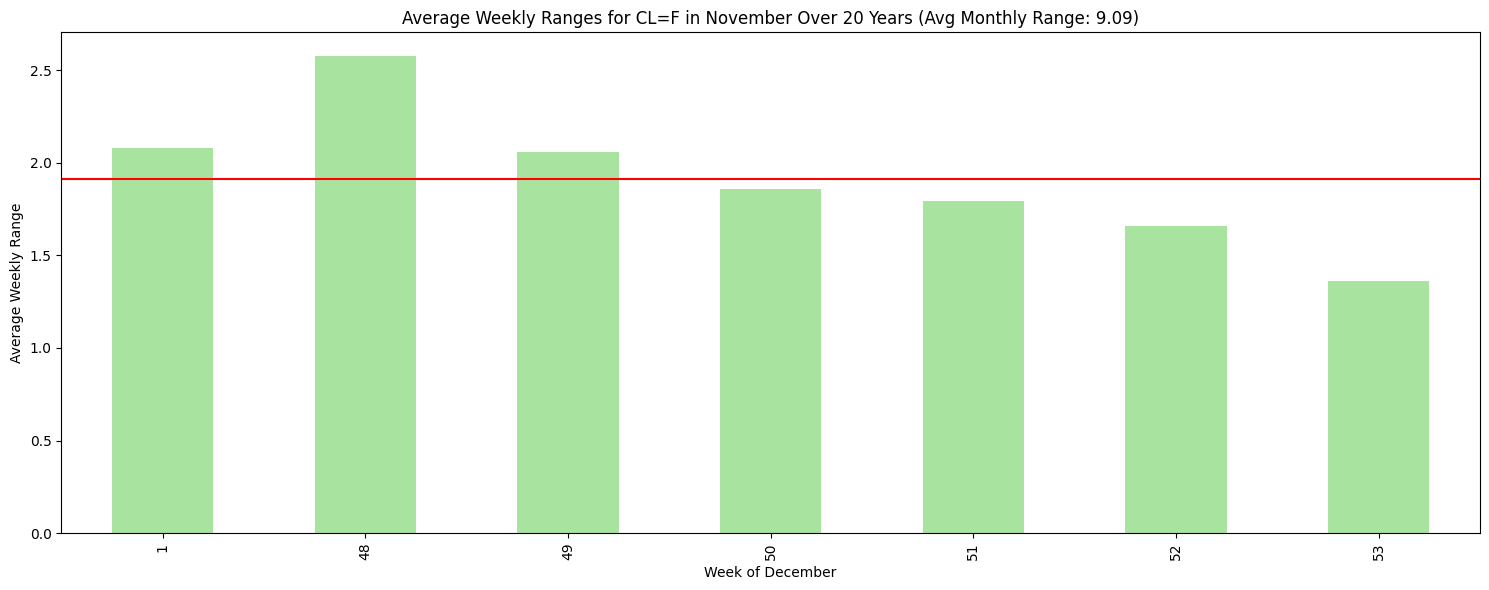

Average Monthly Range for CL=F in December over 20 years: 9.09


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def plot_november_historical_ranges(symbol):
    # Get historical data
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily range
    data['Daily Range'] = data['High'] - data['Low']

    # Extract only November data
    november_data = data[data.index.month == 12]

    # Monthly range for November over the last 20 years
    monthly_ranges = november_data.groupby(november_data.index.year).apply(lambda x: x['High'].max() - x['Low'].min())
    avg_monthly_range = monthly_ranges.mean()

    # Average Daily Ranges for November over the last 20 years
    avg_daily_range = november_data.groupby(november_data.index.day)['Daily Range'].mean()

    # Plot Daily Ranges
    plt.figure(figsize=(15, 6))
    avg_daily_range.plot(kind='bar', color='#A8E4A0', title=f'Average Daily Ranges for {symbol} in November Over 20 Years (Avg Monthly Range: {avg_monthly_range:.2f})')
    plt.axhline(y=avg_daily_range.mean(), color='red', linestyle='-')
    plt.ylabel('Average Daily Range')
    plt.xlabel('Day of December')
    plt.tight_layout()
    plt.show()

    # Average Weekly ranges for November over the last 20 years
    november_data['Week'] = november_data.index.isocalendar().week - november_data.index.isocalendar().week.min() + 1
    avg_weekly_range = november_data.groupby(november_data['Week']).apply(lambda x: x['Daily Range'].mean())

    # Plot Weekly Ranges
    plt.figure(figsize=(15, 6))
    avg_weekly_range.plot(kind='bar', color='#A8E4A0', title=f'Average Weekly Ranges for {symbol} in November Over 20 Years (Avg Monthly Range: {avg_monthly_range:.2f})')
    plt.axhline(y=avg_weekly_range.mean(), color='red', linestyle='-')
    plt.ylabel('Average Weekly Range')
    plt.xlabel('Week of December')
    plt.tight_layout()
    plt.show()

    print(f"Average Monthly Range for {symbol} in December over 20 years: {avg_monthly_range:.2f}")

for symbol in symbols:
    plot_november_historical_ranges(symbol)


[*********************100%%**********************]  1 of 1 completed


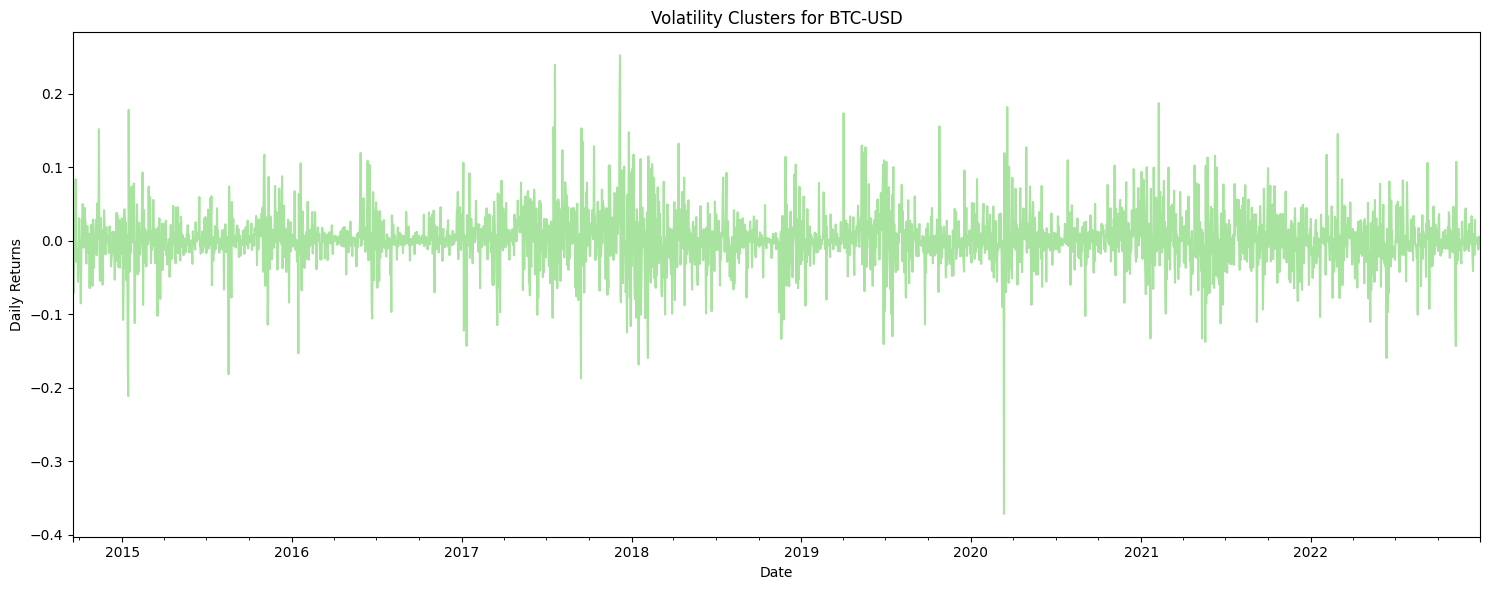

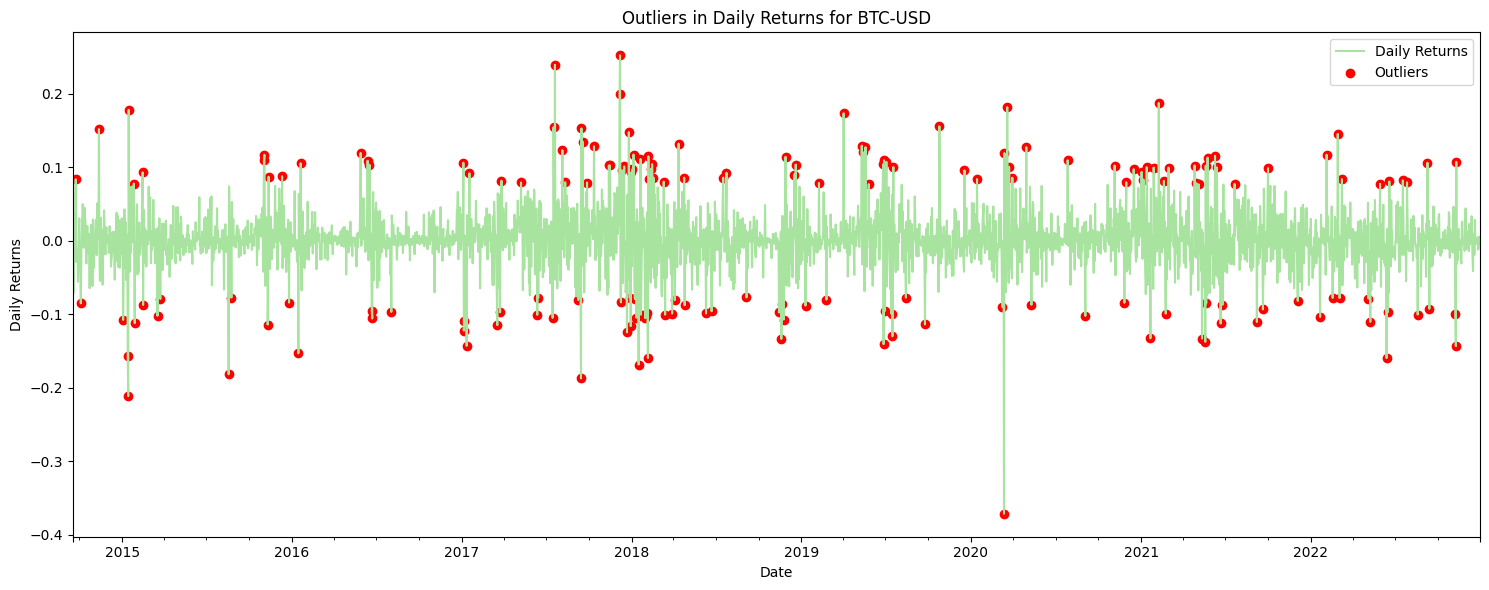

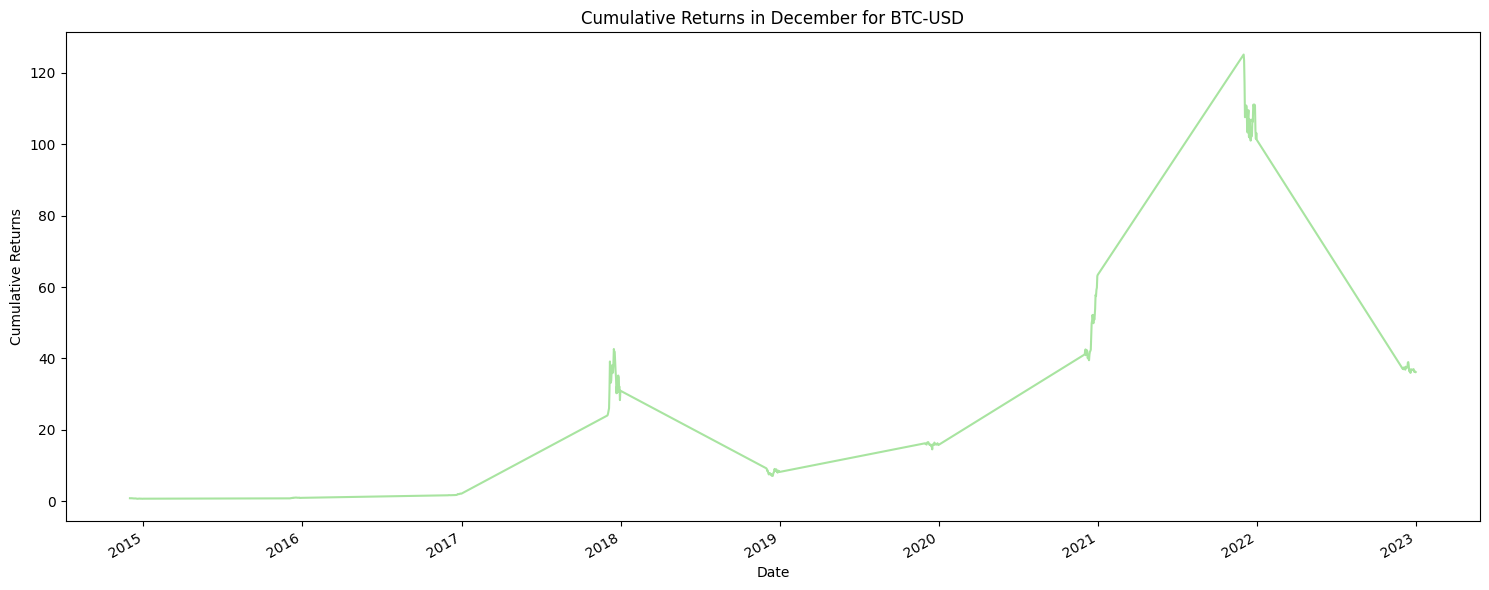

Daily Standard Deviation for BTC-USD: 0.03833
Weekly Average Standard Deviation for BTC-USD: 0.03236
Monthly Average Standard Deviation for BTC-USD: 0.03504
[*********************100%%**********************]  1 of 1 completed


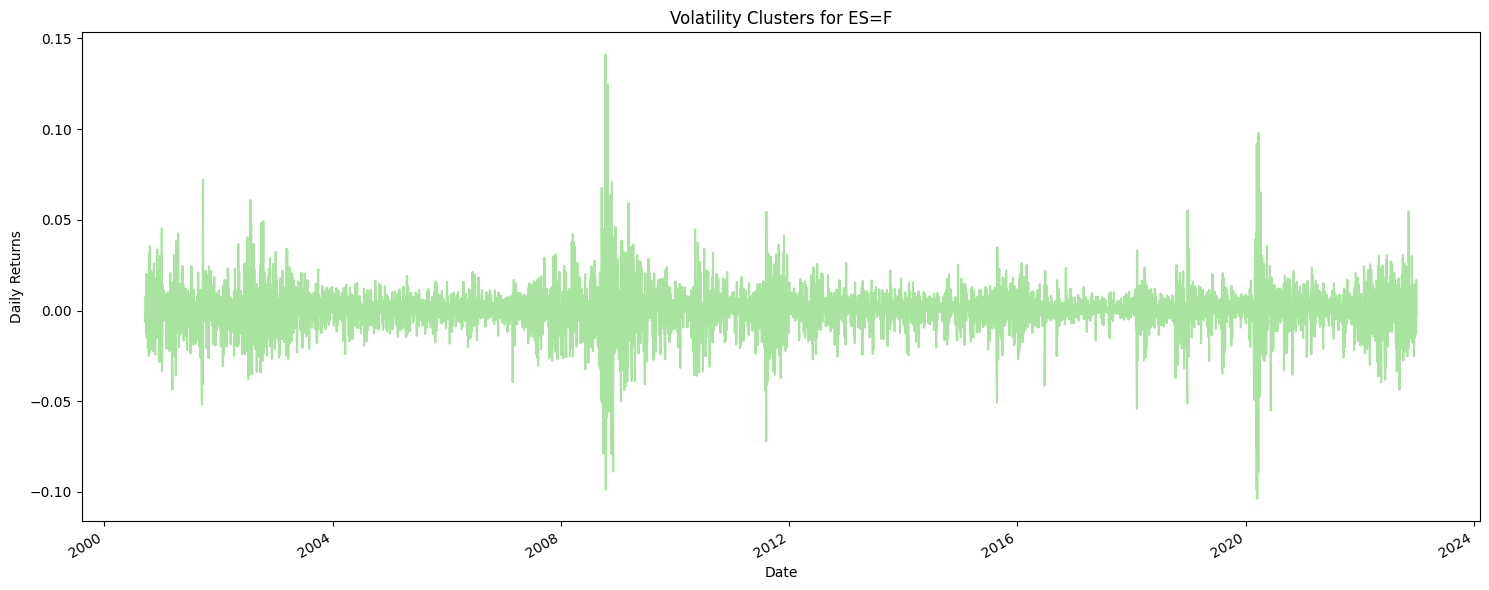

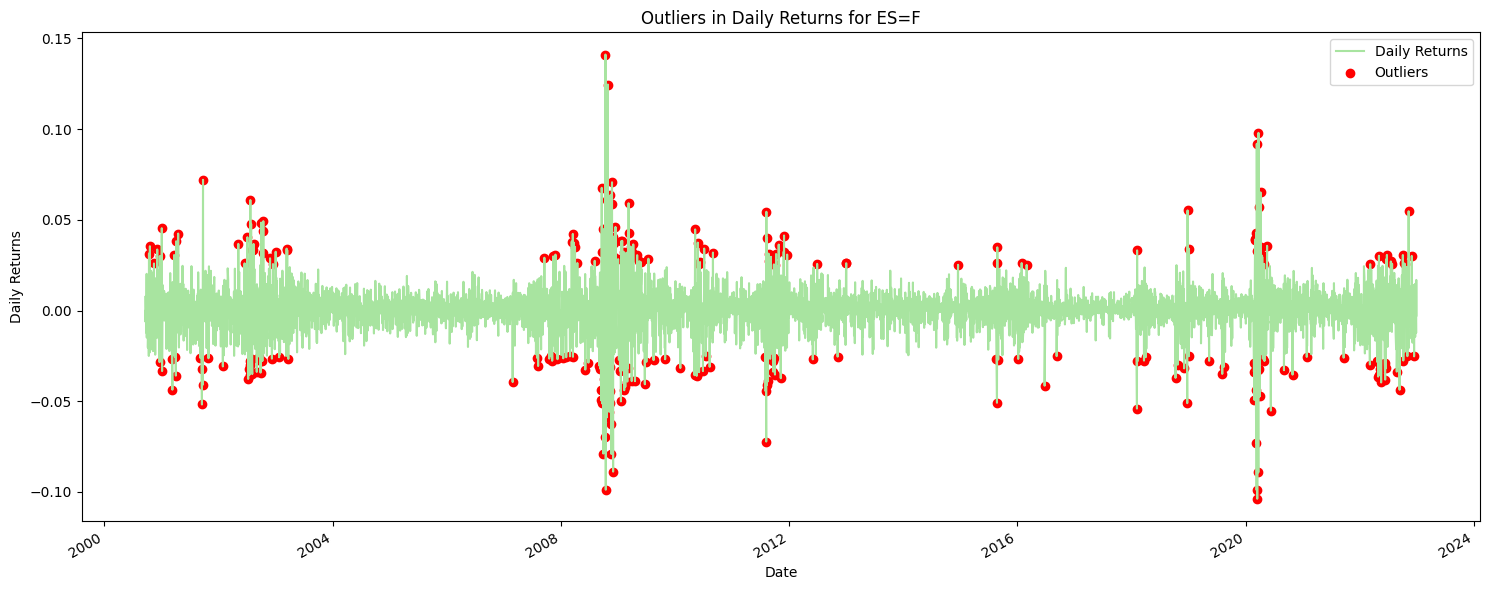

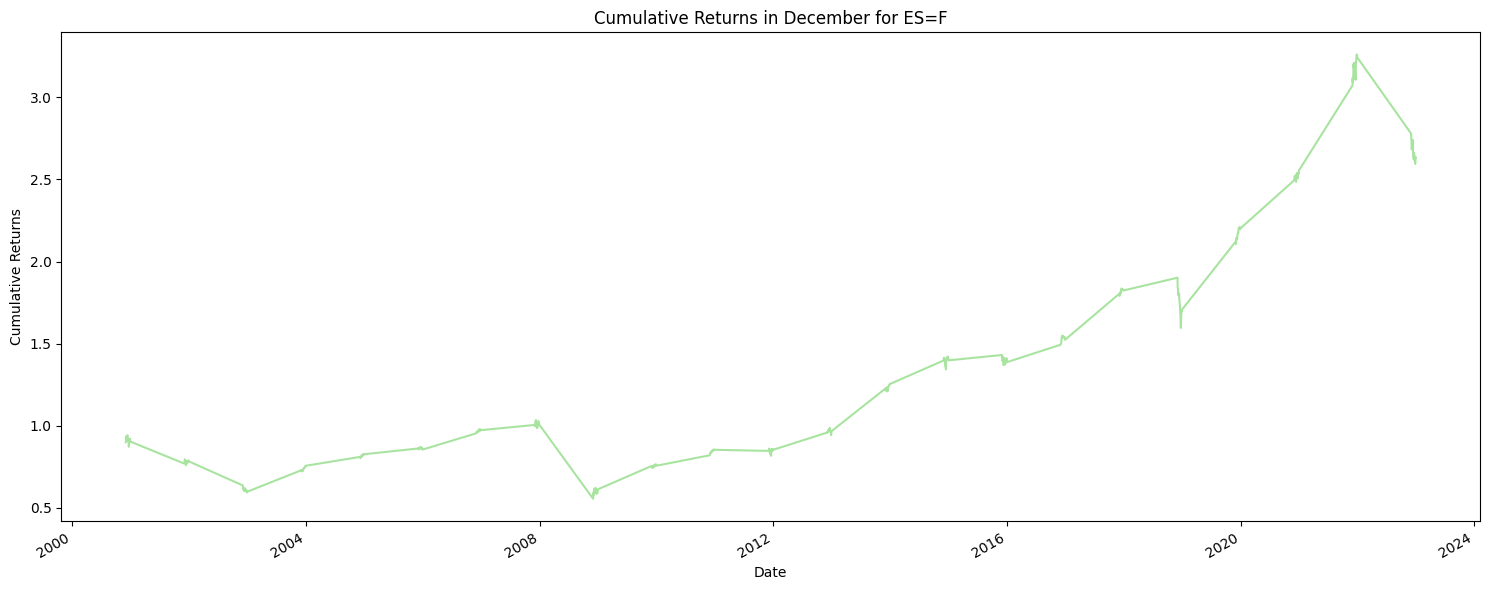

Daily Standard Deviation for ES=F: 0.01254
Weekly Average Standard Deviation for ES=F: 0.00983
Monthly Average Standard Deviation for ES=F: 0.01048
[*********************100%%**********************]  1 of 1 completed


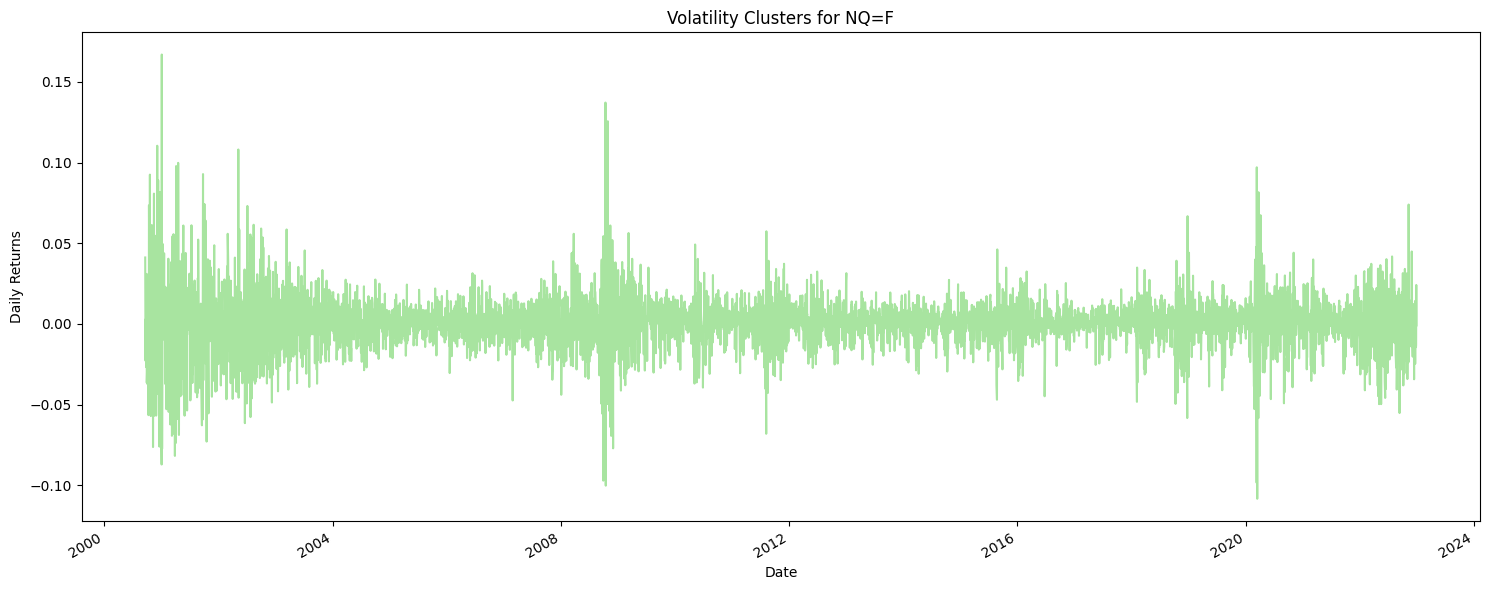

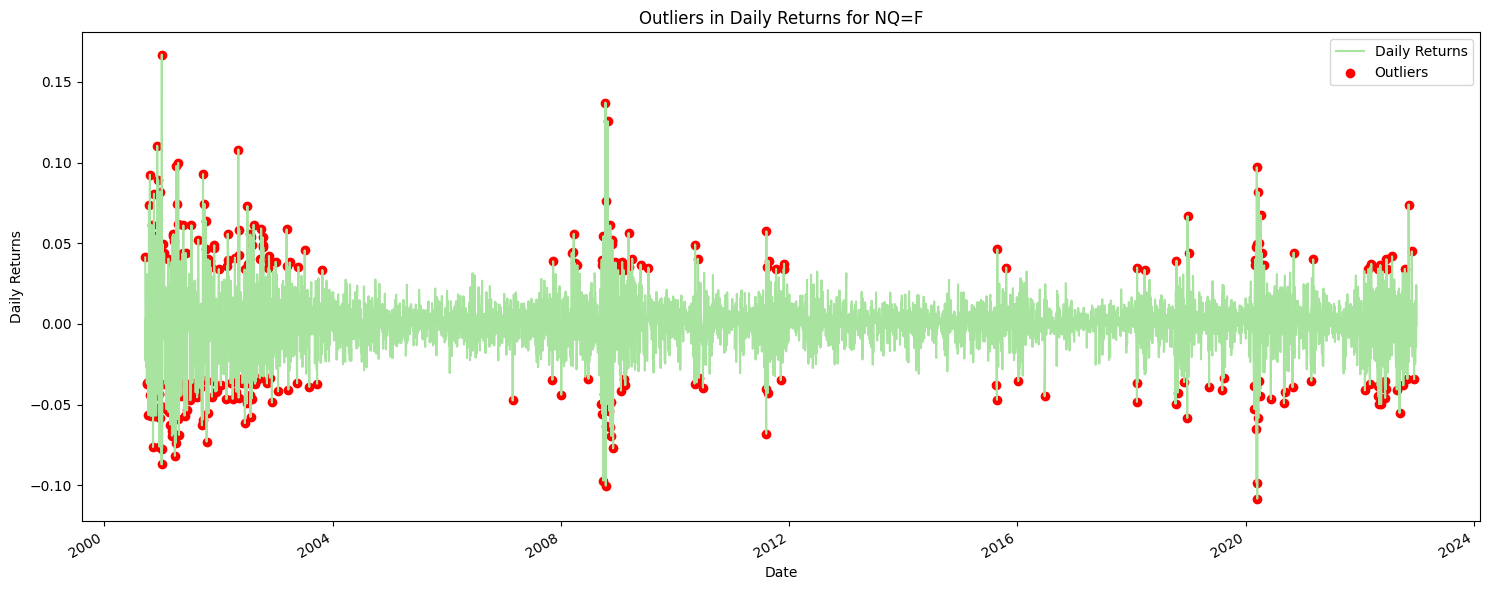

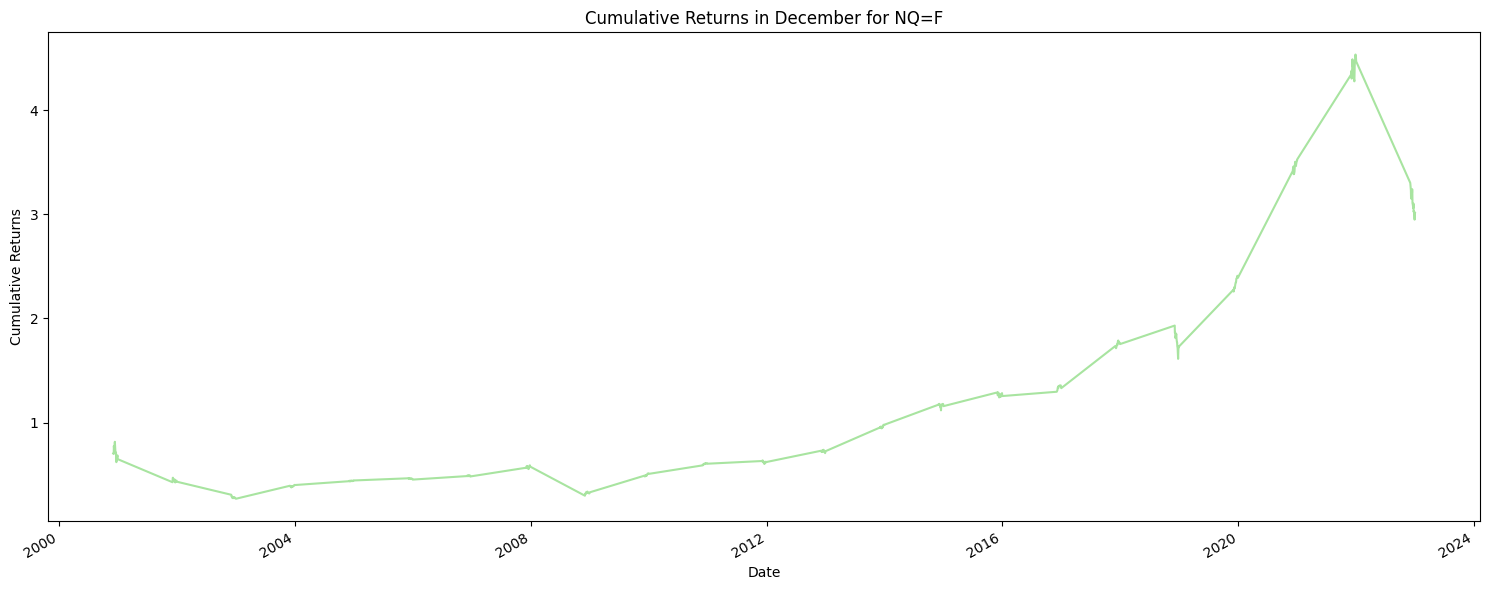

Daily Standard Deviation for NQ=F: 0.01665
Weekly Average Standard Deviation for NQ=F: 0.01324
Monthly Average Standard Deviation for NQ=F: 0.01400
[*********************100%%**********************]  1 of 1 completed


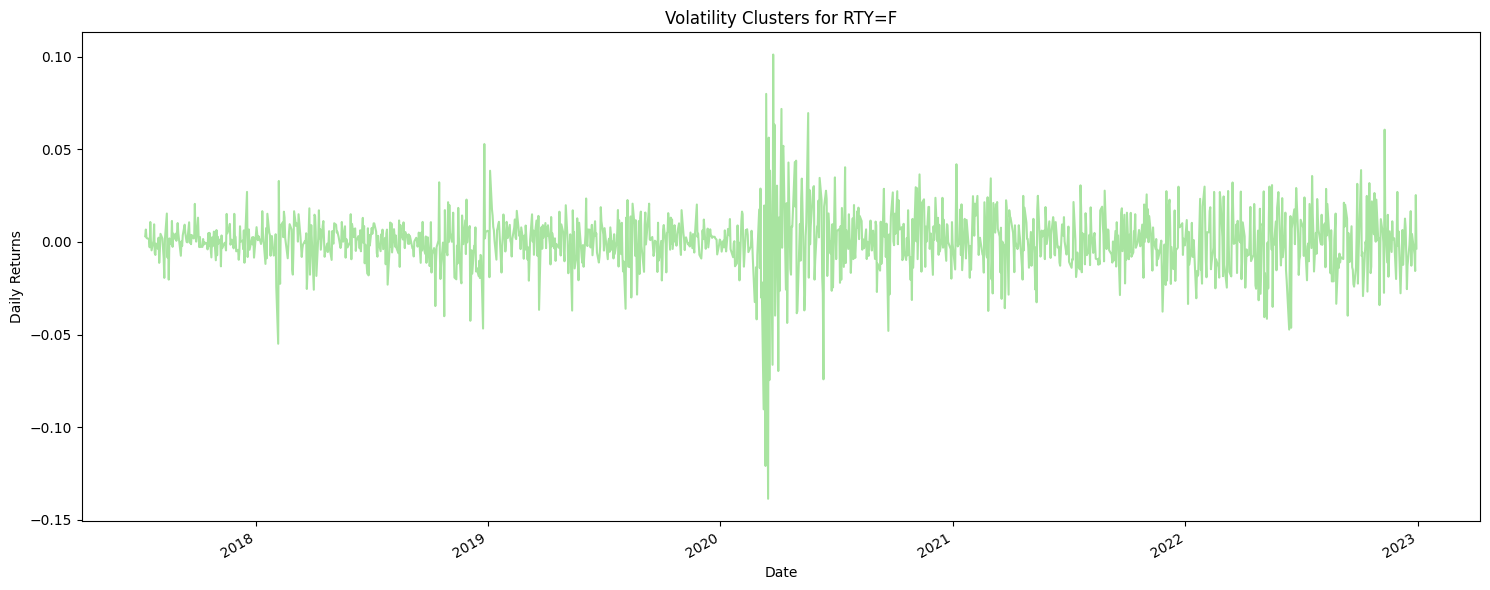

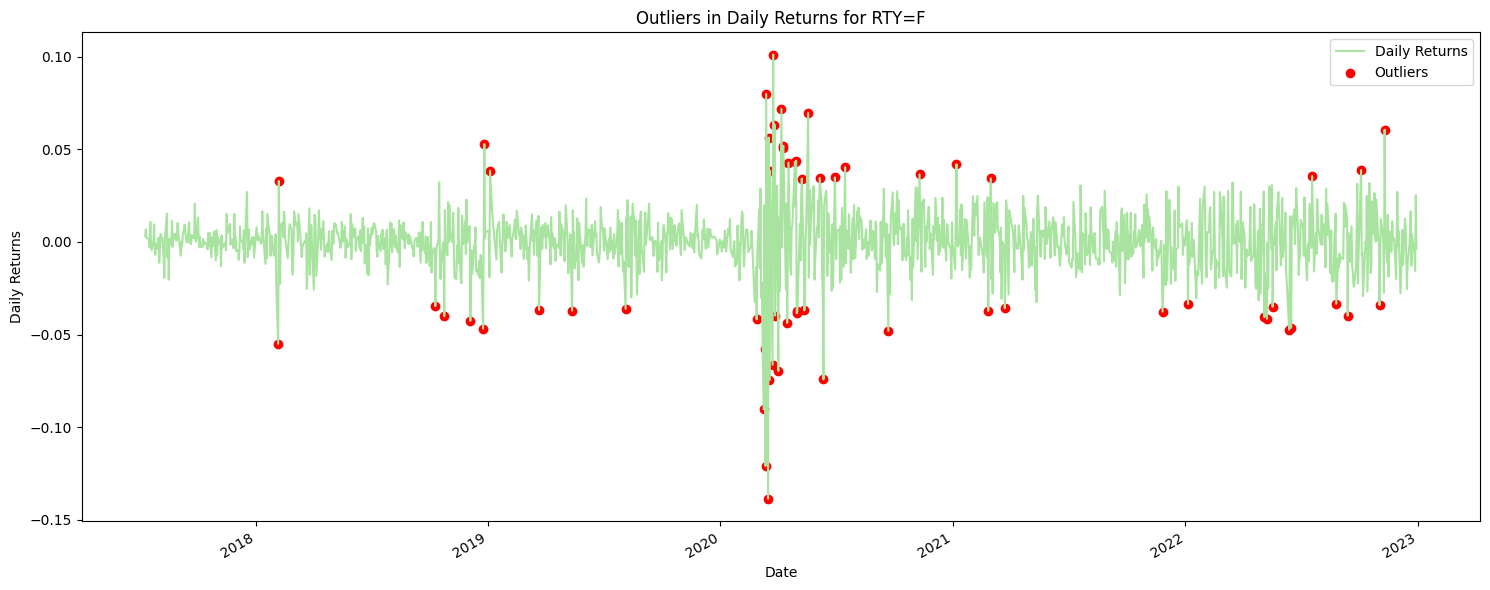

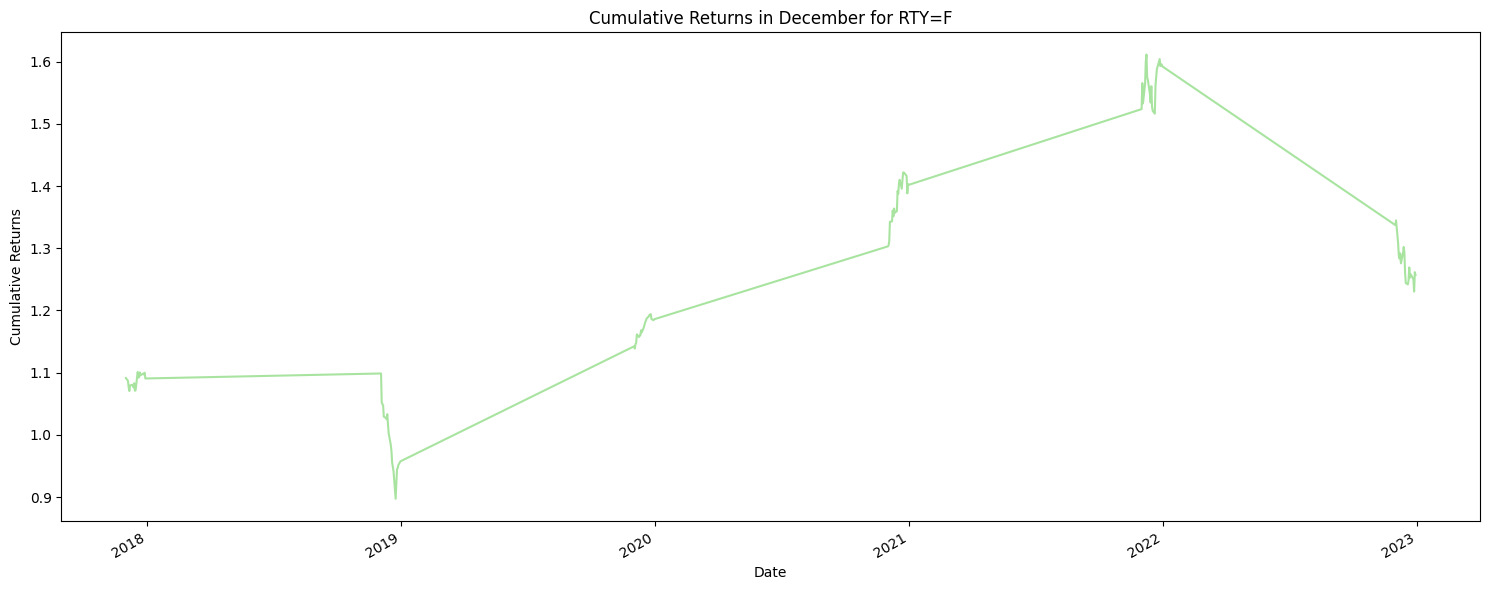

Daily Standard Deviation for RTY=F: 0.01639
Weekly Average Standard Deviation for RTY=F: 0.01308
Monthly Average Standard Deviation for RTY=F: 0.01399
[*********************100%%**********************]  1 of 1 completed


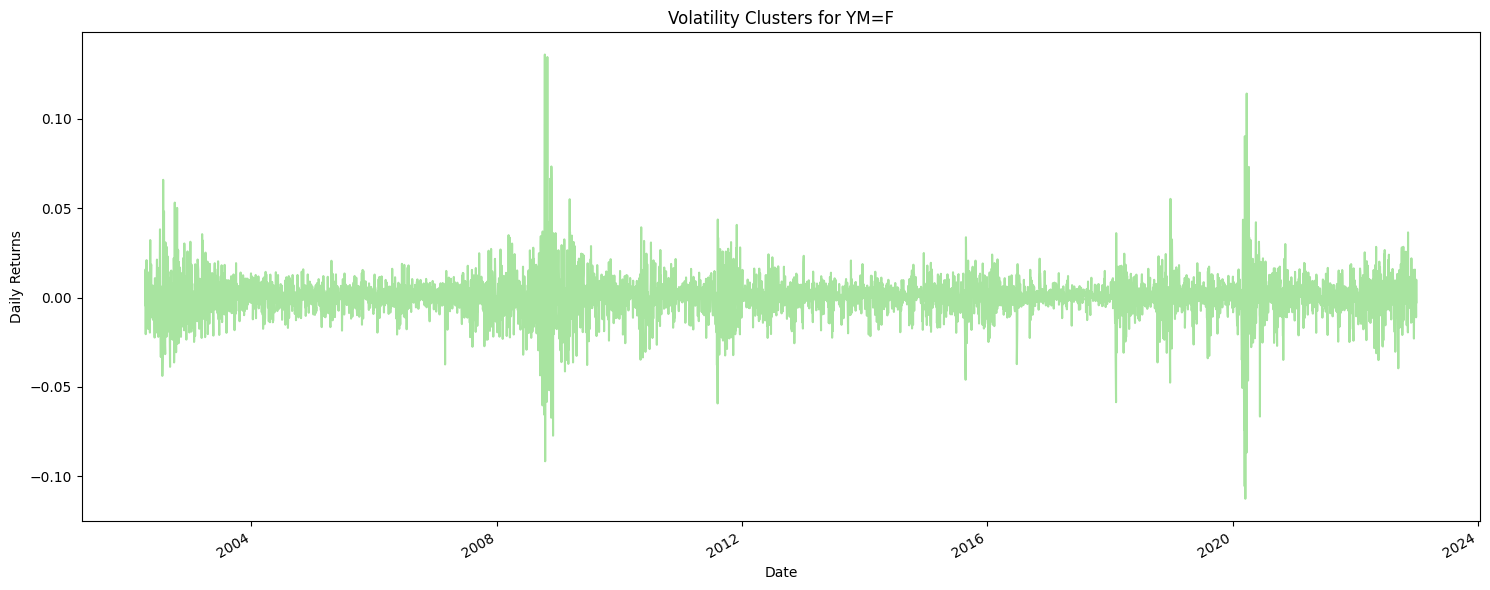

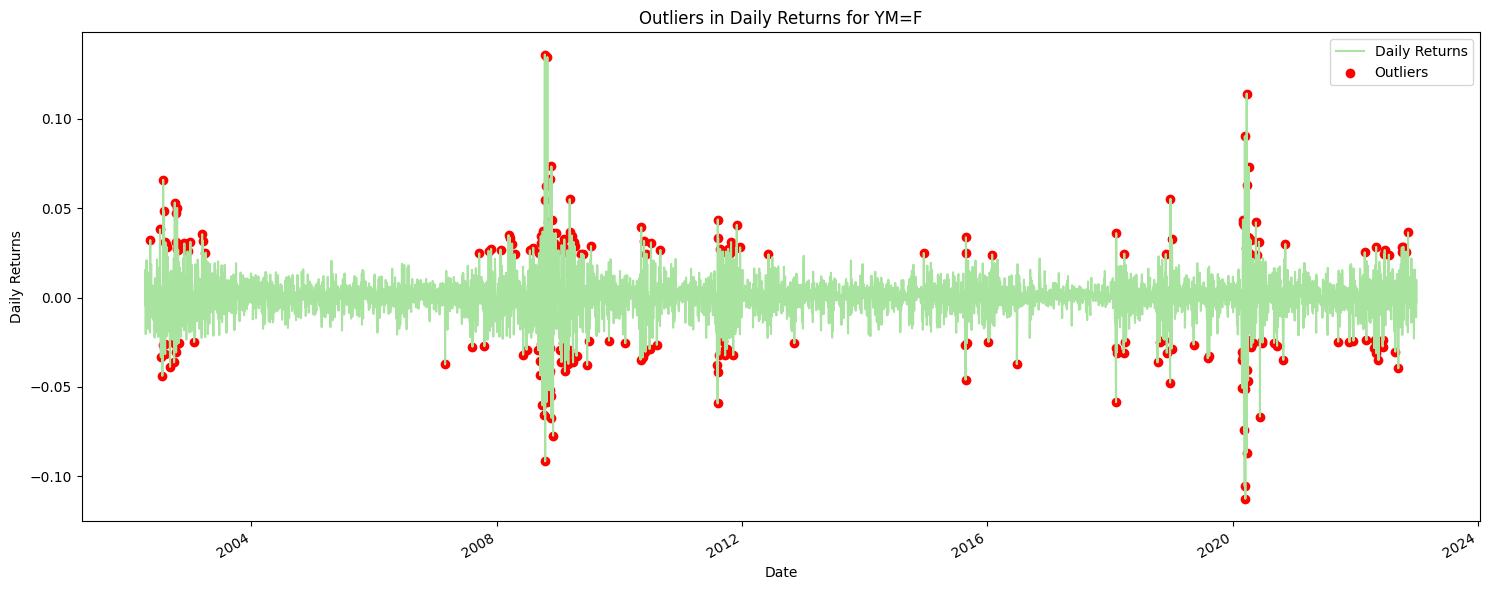

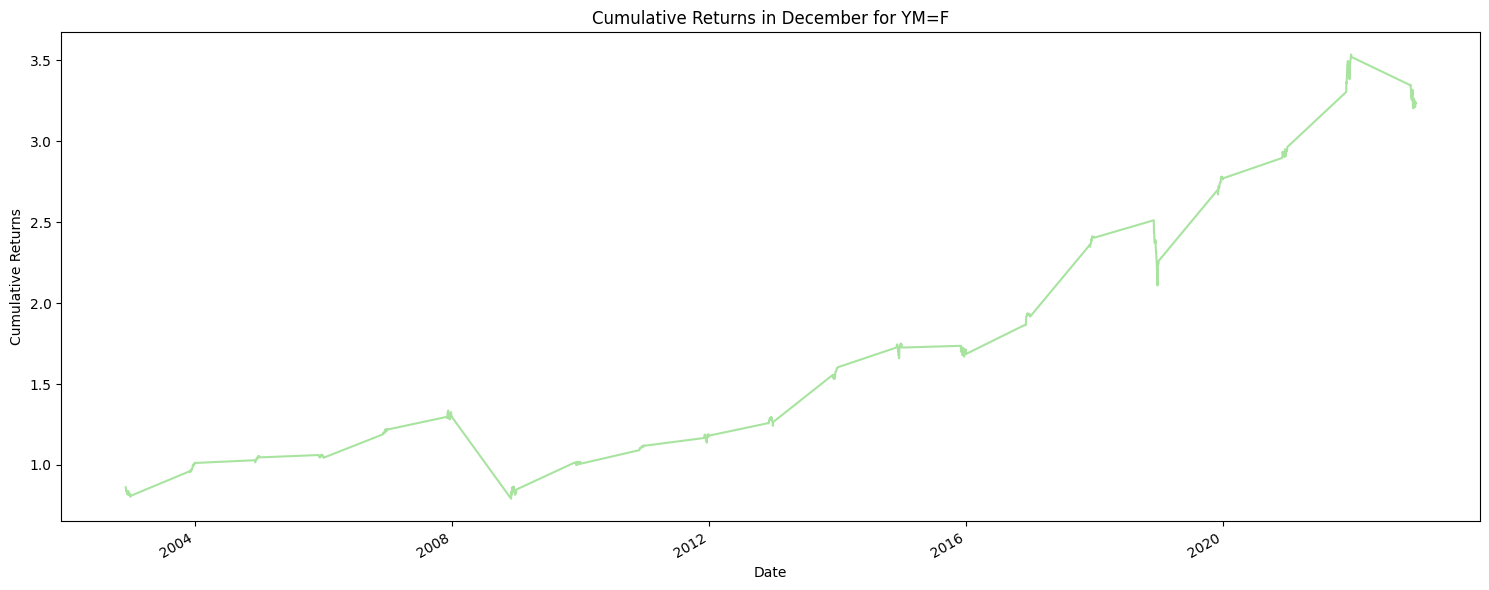

Daily Standard Deviation for YM=F: 0.01181
Weekly Average Standard Deviation for YM=F: 0.00899
Monthly Average Standard Deviation for YM=F: 0.00965
[*********************100%%**********************]  1 of 1 completed


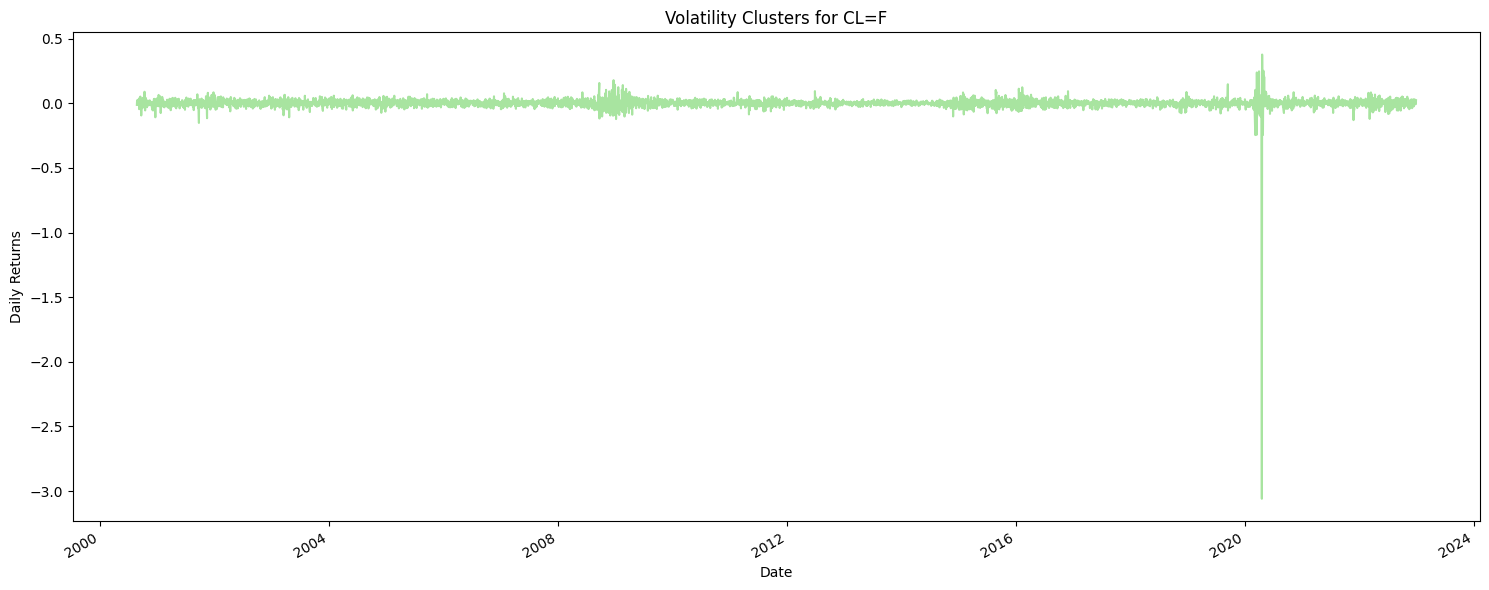

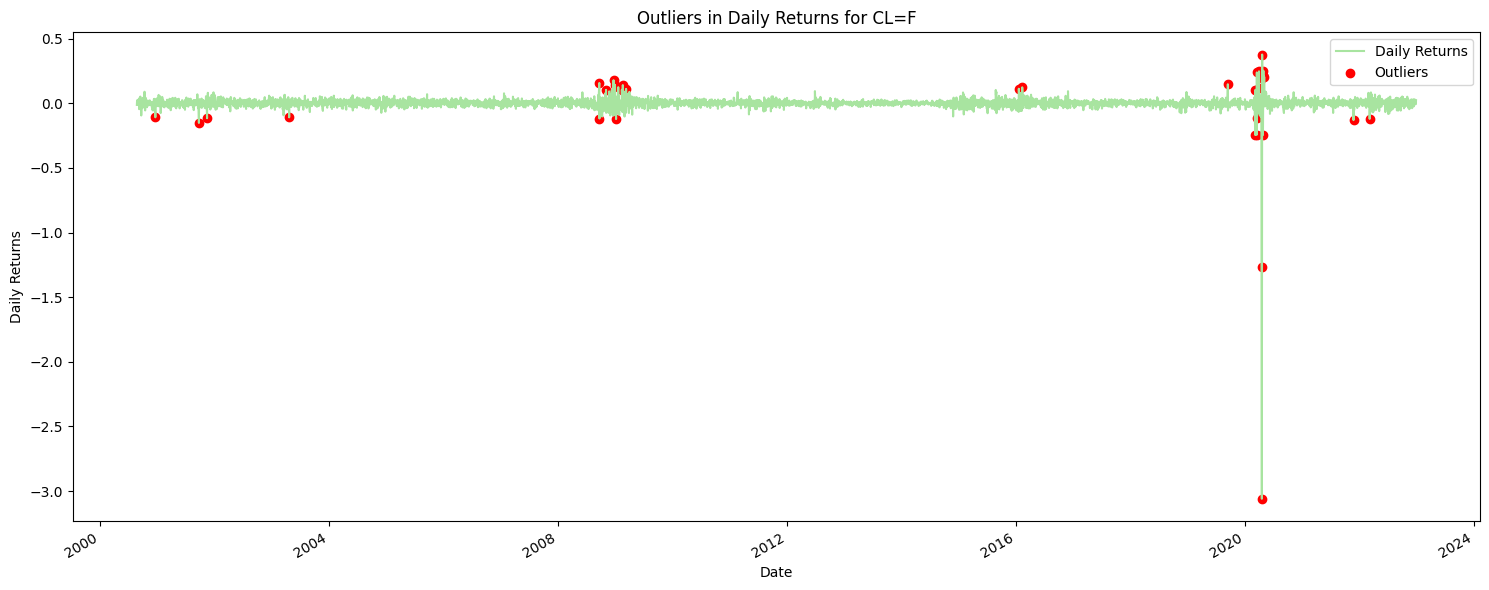

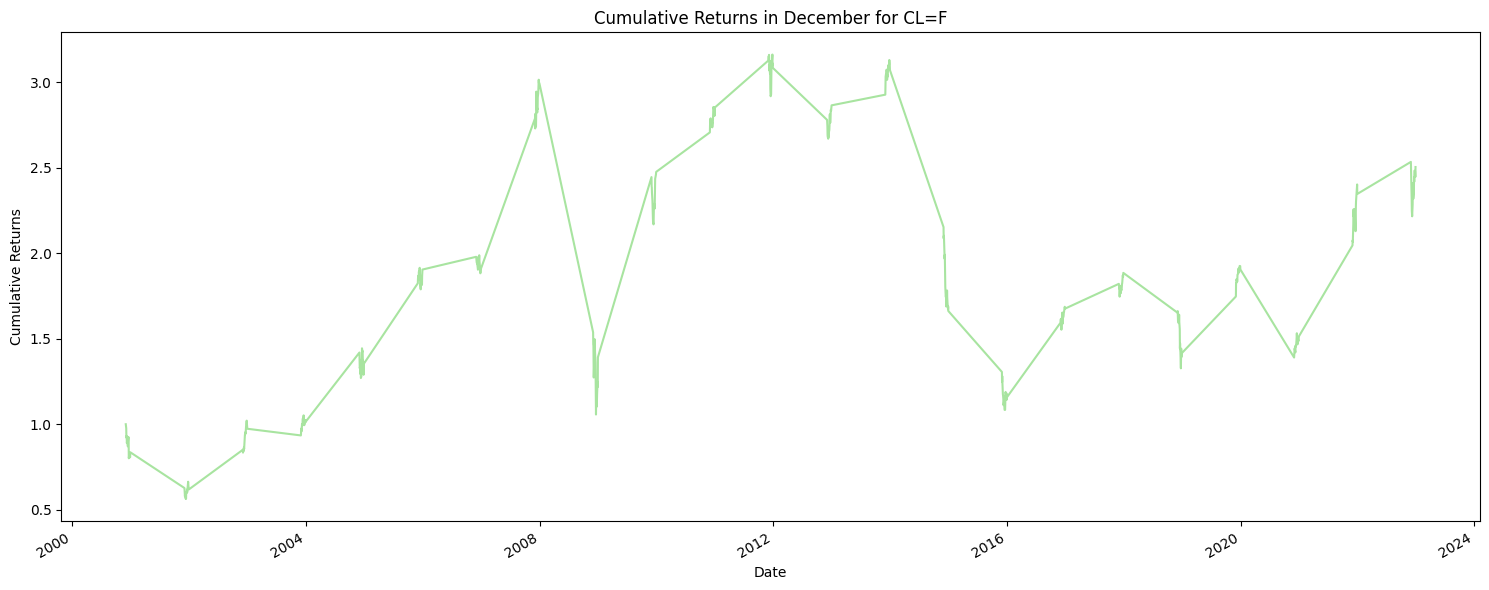

Daily Standard Deviation for CL=F: 0.05160
Weekly Average Standard Deviation for CL=F: 0.02273
Monthly Average Standard Deviation for CL=F: 0.02503


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def analyze_returns(symbol):
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns
    data['Daily Returns'] = data['Close'].pct_change().dropna()

    # Calculate standard deviations
    daily_std = data['Daily Returns'].std()
    weekly_std = data['Daily Returns'].resample('W').std()
    monthly_std = data['Daily Returns'].resample('M').std()

    # Plotting volatility clusters
    plt.figure(figsize=(15, 6))
    data['Daily Returns'].plot(color='#A8E4A0', title=f'Volatility Clusters for {symbol}')
    plt.ylabel('Daily Returns')
    plt.tight_layout()
    plt.show()

    # Identifying outliers
    outliers = data[(data['Daily Returns'] > 2*daily_std) | (data['Daily Returns'] < -2*daily_std)]

    # Plotting outliers
    plt.figure(figsize=(15, 6))
    data['Daily Returns'].plot(color='#A8E4A0')
    plt.scatter(outliers.index, outliers['Daily Returns'], color='red', label='Outliers')
    plt.title(f'Outliers in Daily Returns for {symbol}')
    plt.ylabel('Daily Returns')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Cumulative Returns
    data['Cumulative Returns'] = (1 + data['Daily Returns']).cumprod()

    # Plotting cumulative returns for November
    november_data = data[data.index.month == 12]
    plt.figure(figsize=(15, 6))
    november_data['Cumulative Returns'].plot(color='#A8E4A0', title=f'Cumulative Returns in December for {symbol}')
    plt.ylabel('Cumulative Returns')
    plt.tight_layout()
    plt.show()

    # Printing standard deviations
    print(f"Daily Standard Deviation for {symbol}: {daily_std:.5f}")
    print(f"Weekly Average Standard Deviation for {symbol}: {weekly_std.mean():.5f}")
    print(f"Monthly Average Standard Deviation for {symbol}: {monthly_std.mean():.5f}")

for symbol in symbols:
    analyze_returns(symbol)


[*********************100%%**********************]  1 of 1 completed


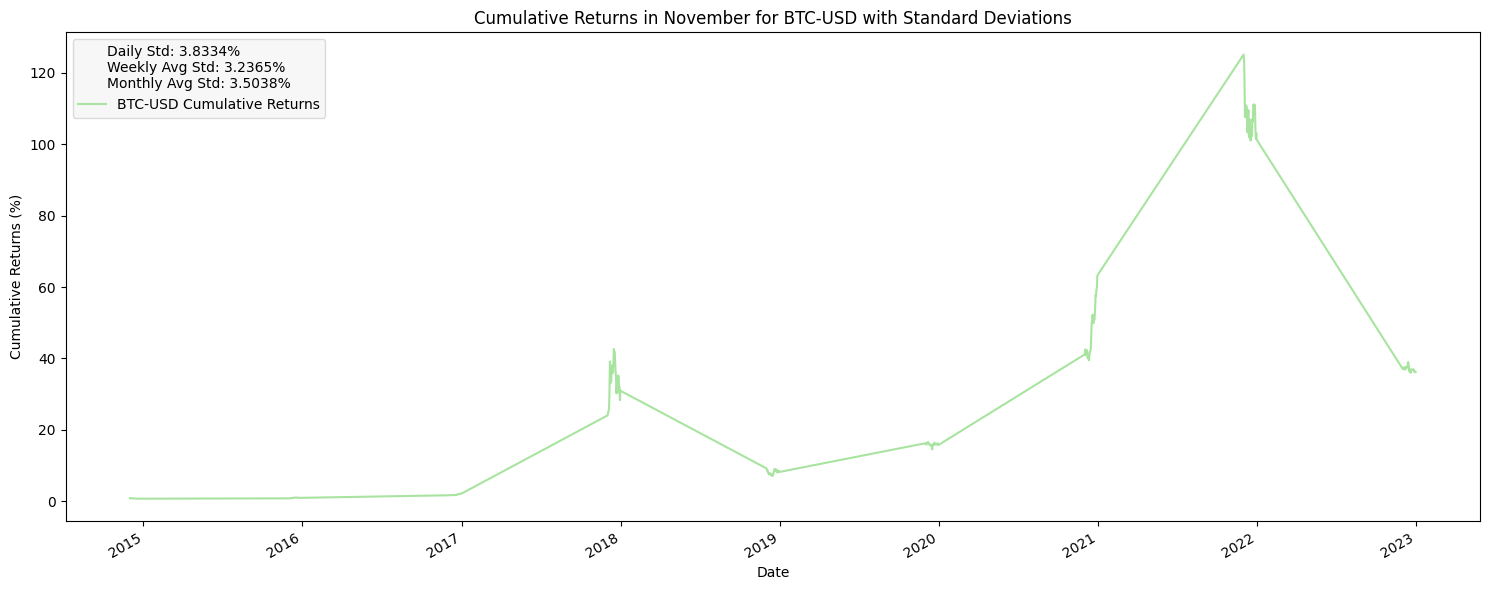

[*********************100%%**********************]  1 of 1 completed


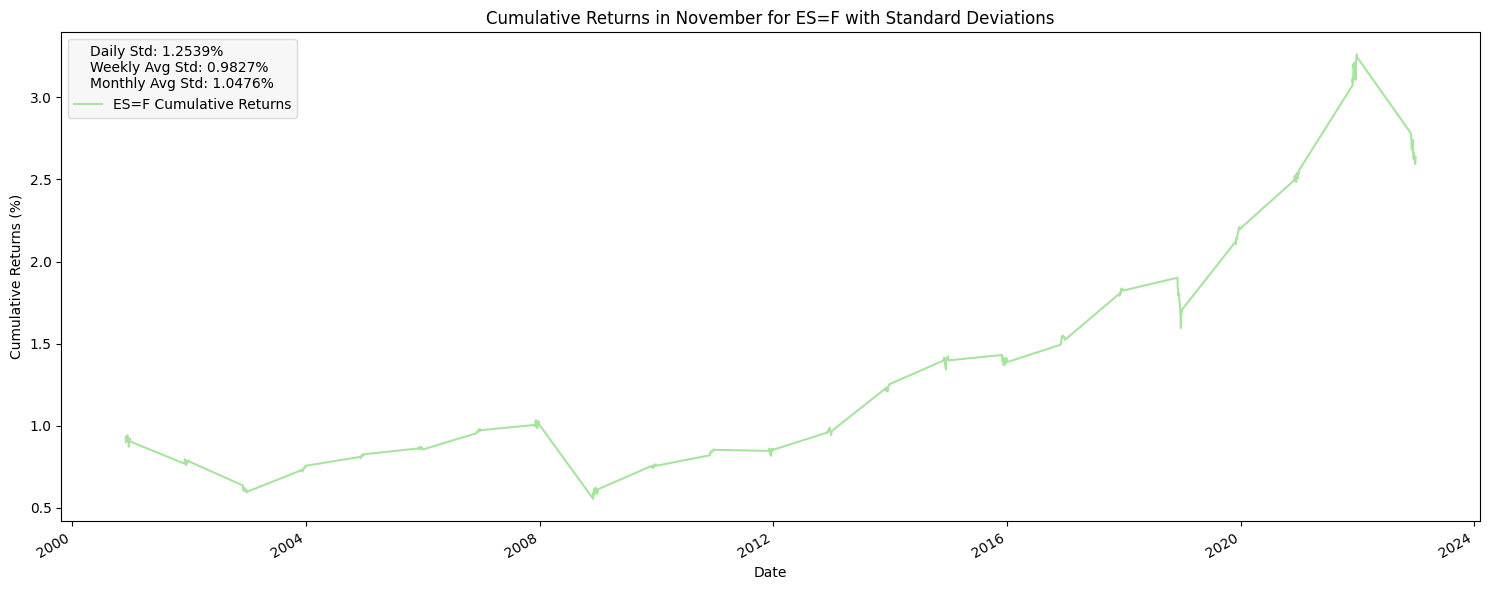

[*********************100%%**********************]  1 of 1 completed


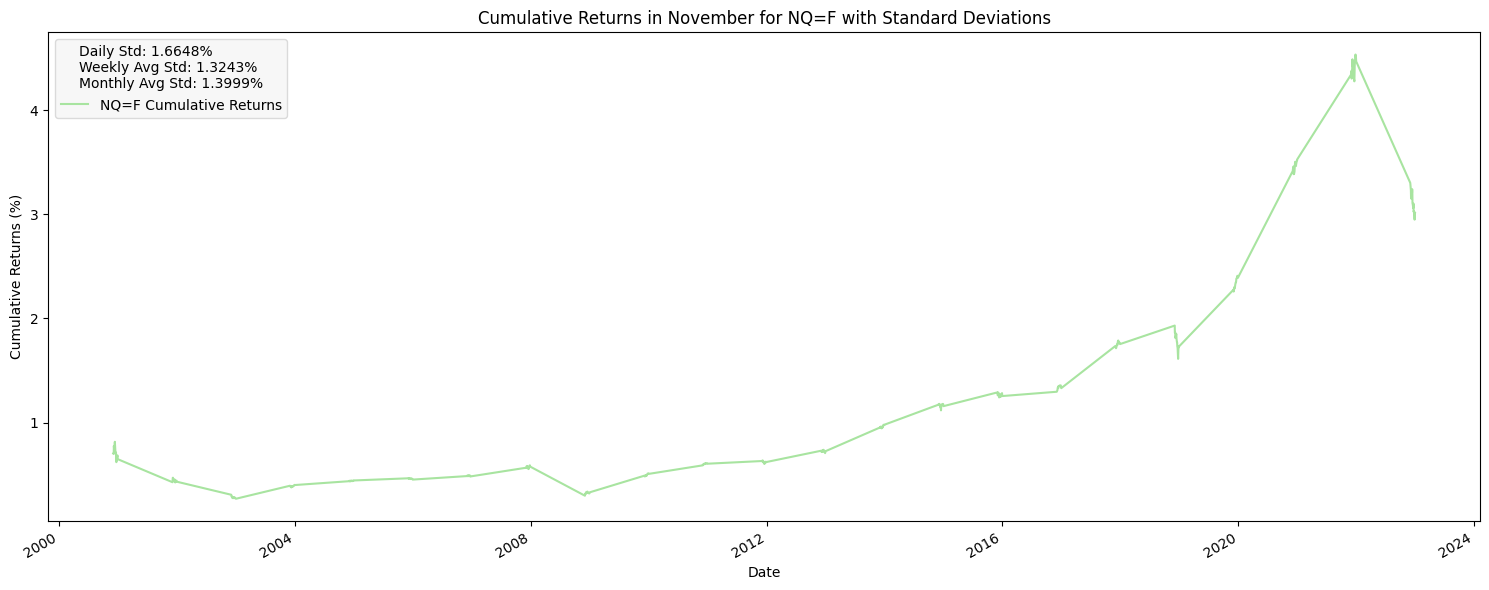

[*********************100%%**********************]  1 of 1 completed


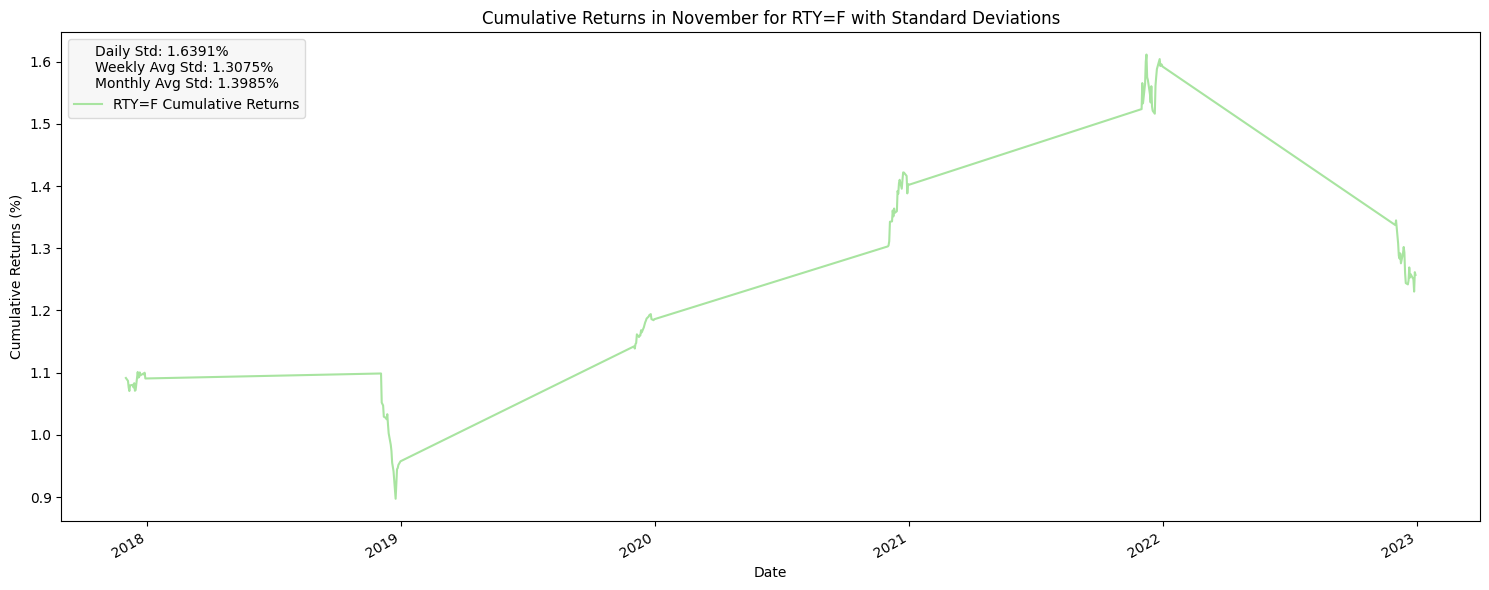

[*********************100%%**********************]  1 of 1 completed


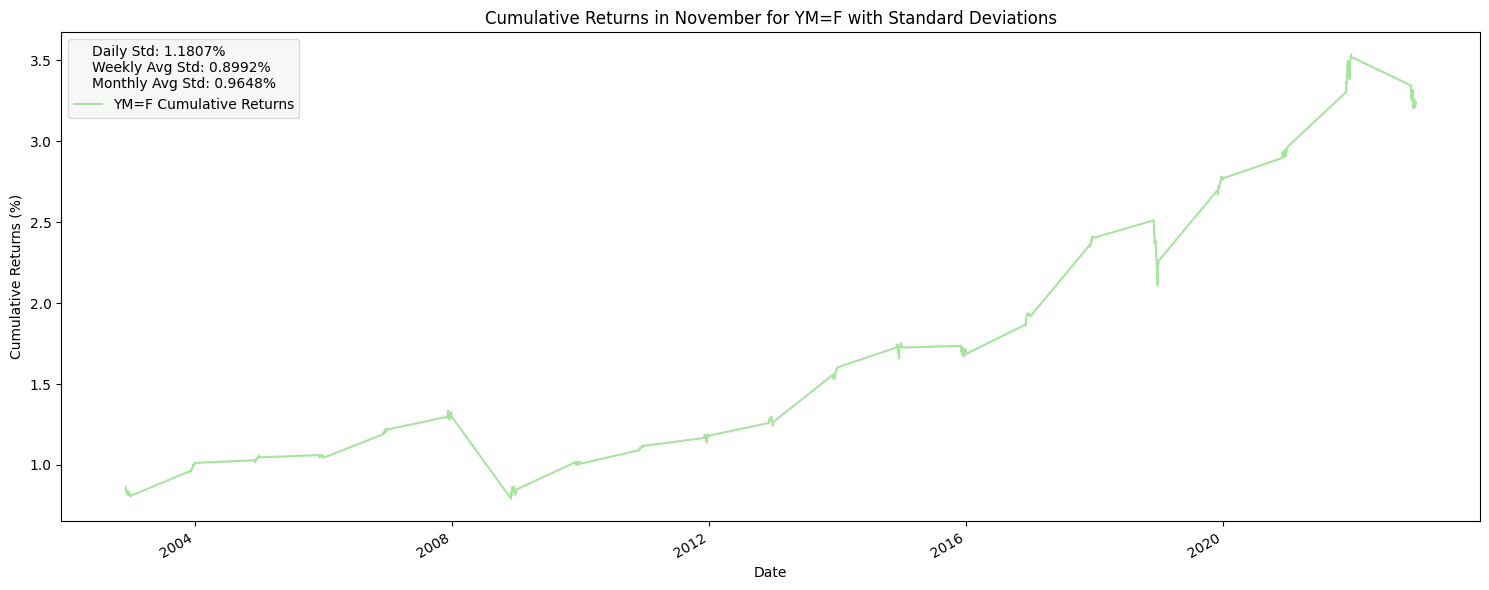

[*********************100%%**********************]  1 of 1 completed


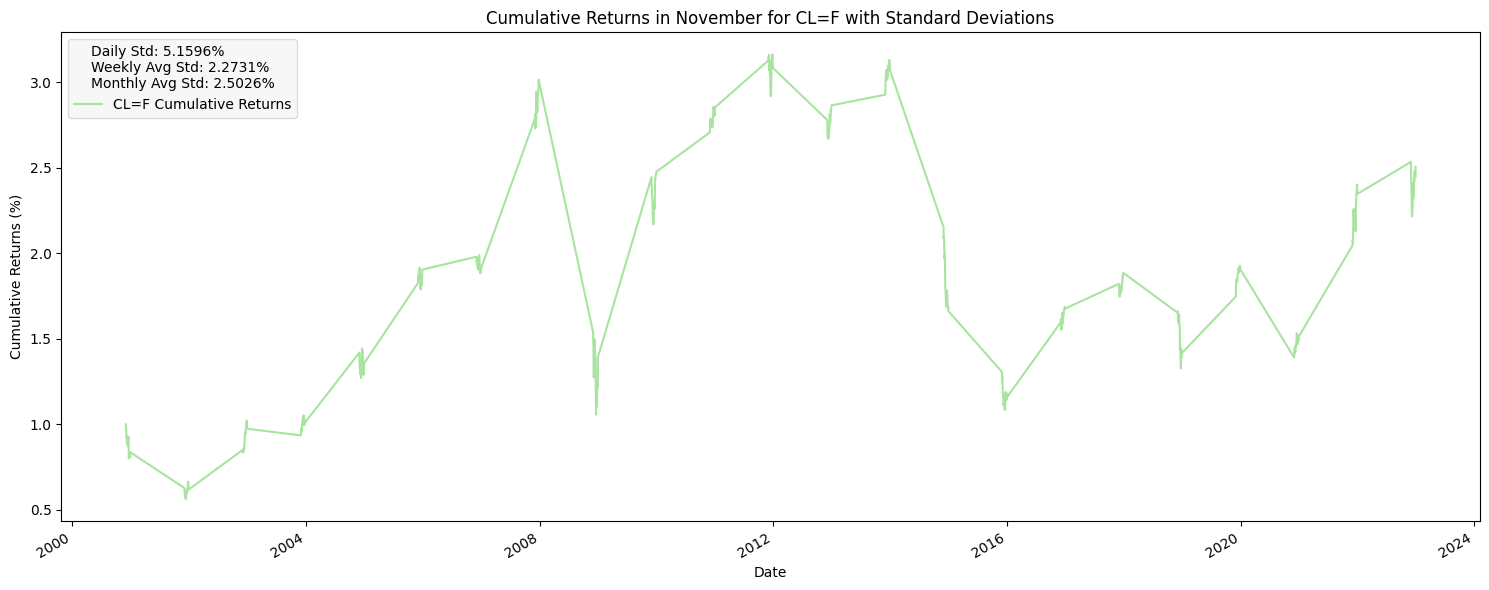

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def analyze_returns(symbol):
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns in percentage
    data['Daily Returns'] = data['Close'].pct_change().dropna() * 100

    # Calculate standard deviations
    daily_std = data['Daily Returns'].std()
    weekly_std = data['Daily Returns'].resample('W').std()
    monthly_std = data['Daily Returns'].resample('M').std()

    # Cumulative Returns in percentage
    data['Cumulative Returns'] = (1 + data['Daily Returns'] / 100).cumprod()

    # Plot Cumulative Returns for November
    november_data = data[data.index.month == 12]
    plt.figure(figsize=(15, 6))
    november_data['Cumulative Returns'].plot(color='#A8E4A0', label=f"{symbol} Cumulative Returns")

    # Annotate standard deviations on the chart
    legend_text = f"Daily Std: {daily_std:.4f}%\nWeekly Avg Std: {weekly_std.mean():.4f}%\nMonthly Avg Std: {monthly_std.mean():.4f}%"
    plt.legend(loc='upper left', title=legend_text, frameon=True, facecolor='whitesmoke', framealpha=0.7)

    plt.title(f'Cumulative Returns in November for {symbol} with Standard Deviations')
    plt.ylabel('Cumulative Returns (%)')
    plt.tight_layout()
    plt.show()

for symbol in symbols:
    analyze_returns(symbol)


[*********************100%%**********************]  1 of 1 completed


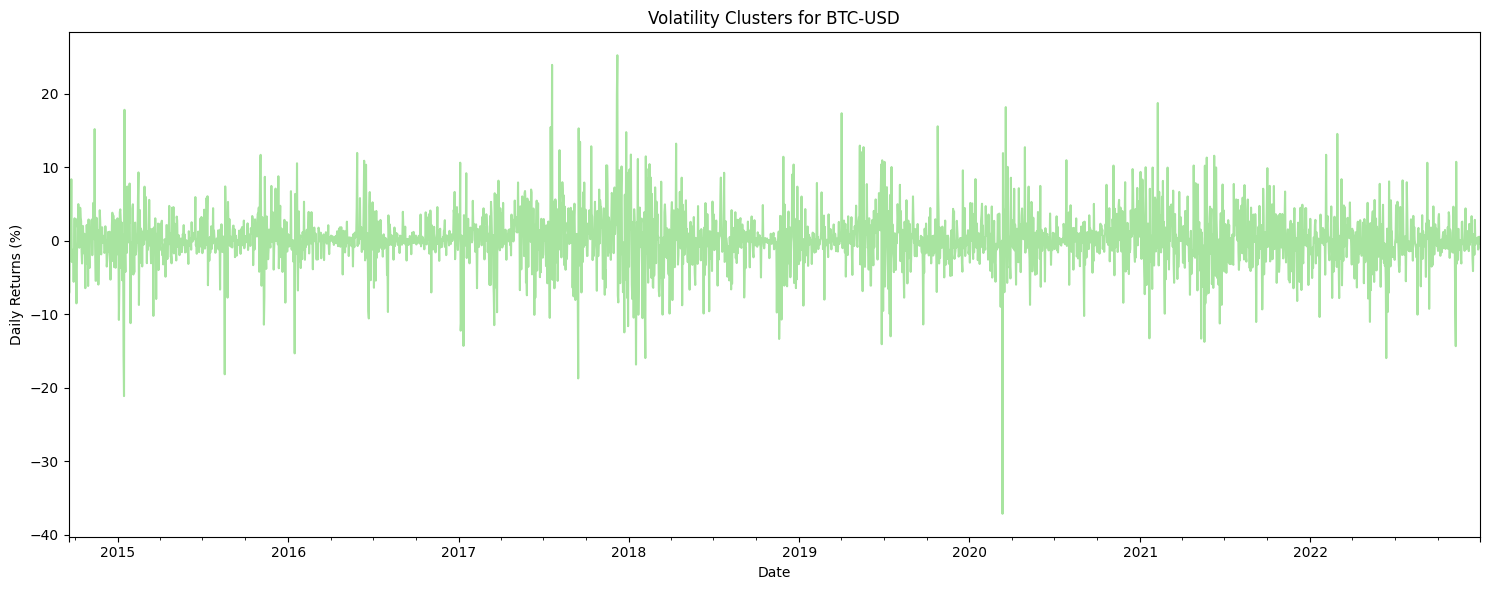

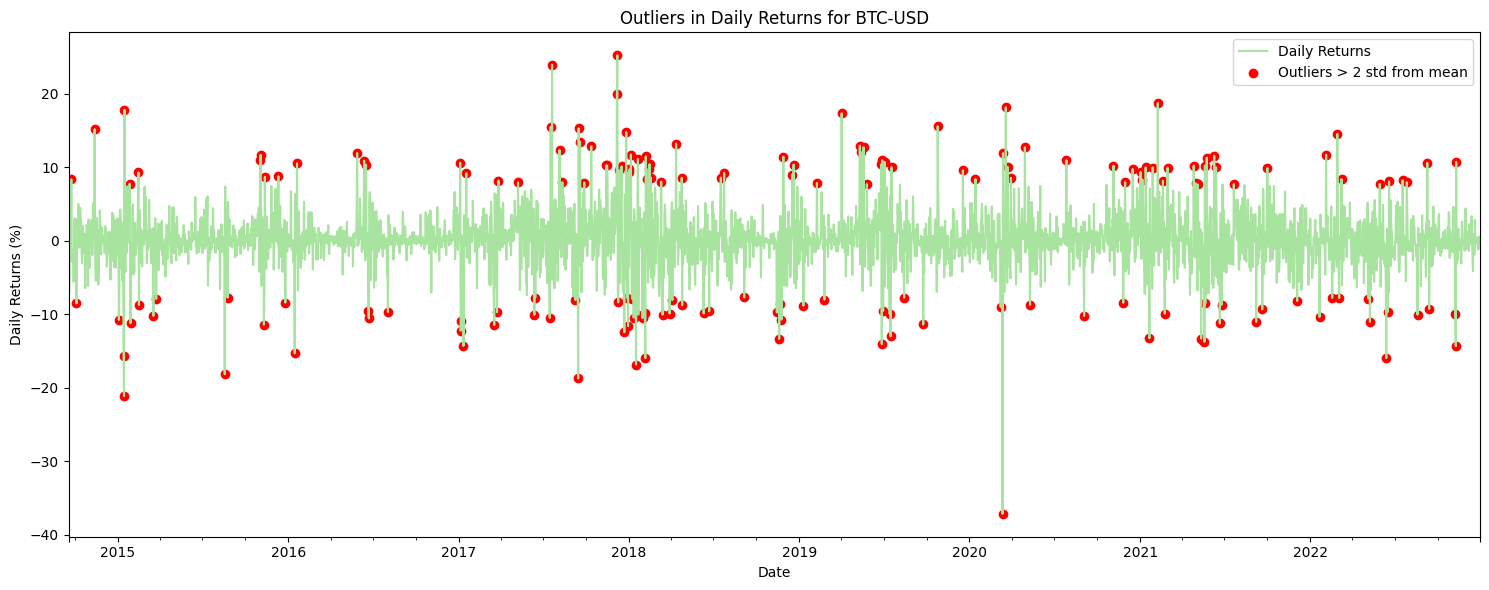

Daily Standard Deviation for BTC-USD: 3.8334%
Weekly Average Standard Deviation for BTC-USD: 26.7285%
Monthly Average Standard Deviation for BTC-USD: 63.6682%
[*********************100%%**********************]  1 of 1 completed


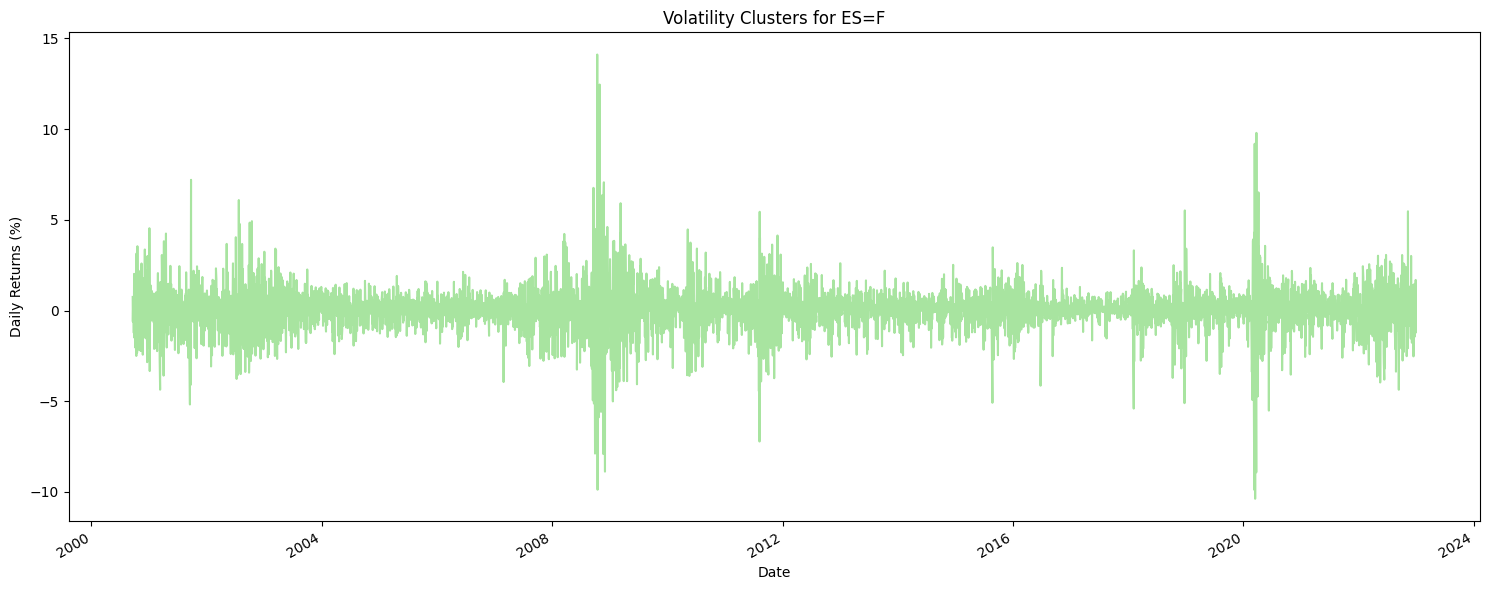

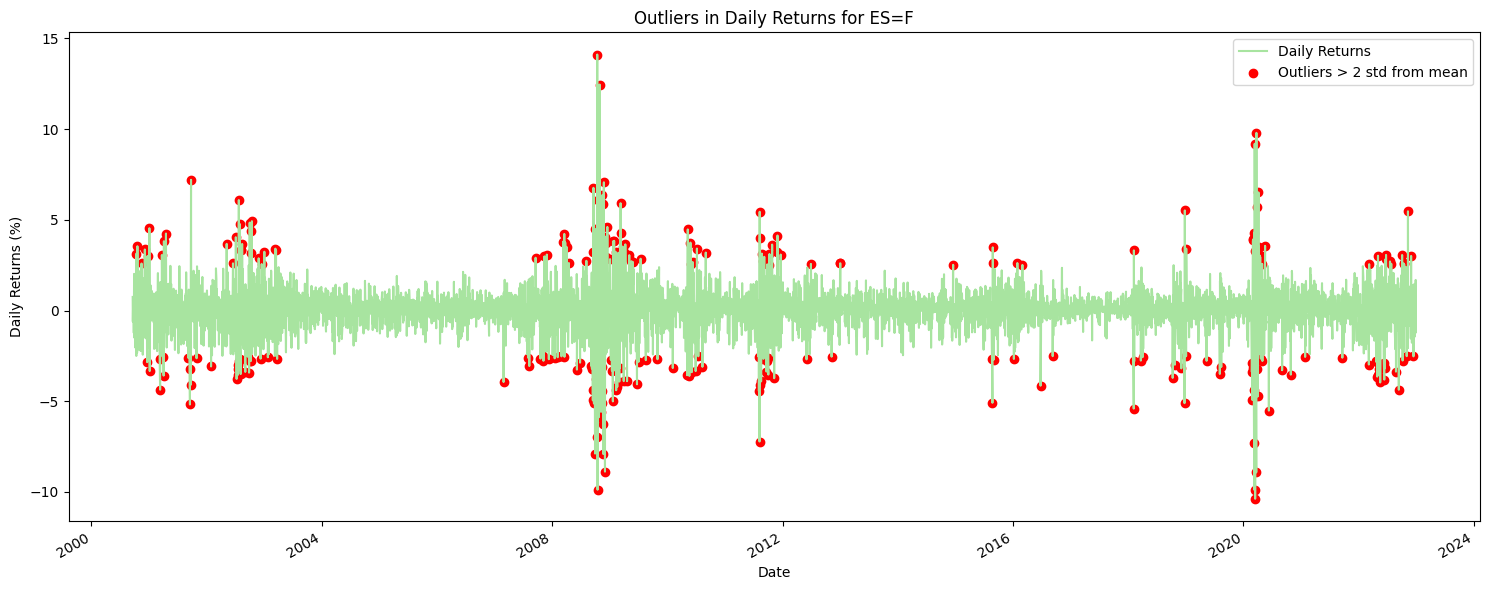

Daily Standard Deviation for ES=F: 1.2539%
Weekly Average Standard Deviation for ES=F: 11.6129%
Monthly Average Standard Deviation for ES=F: 25.3800%
[*********************100%%**********************]  1 of 1 completed


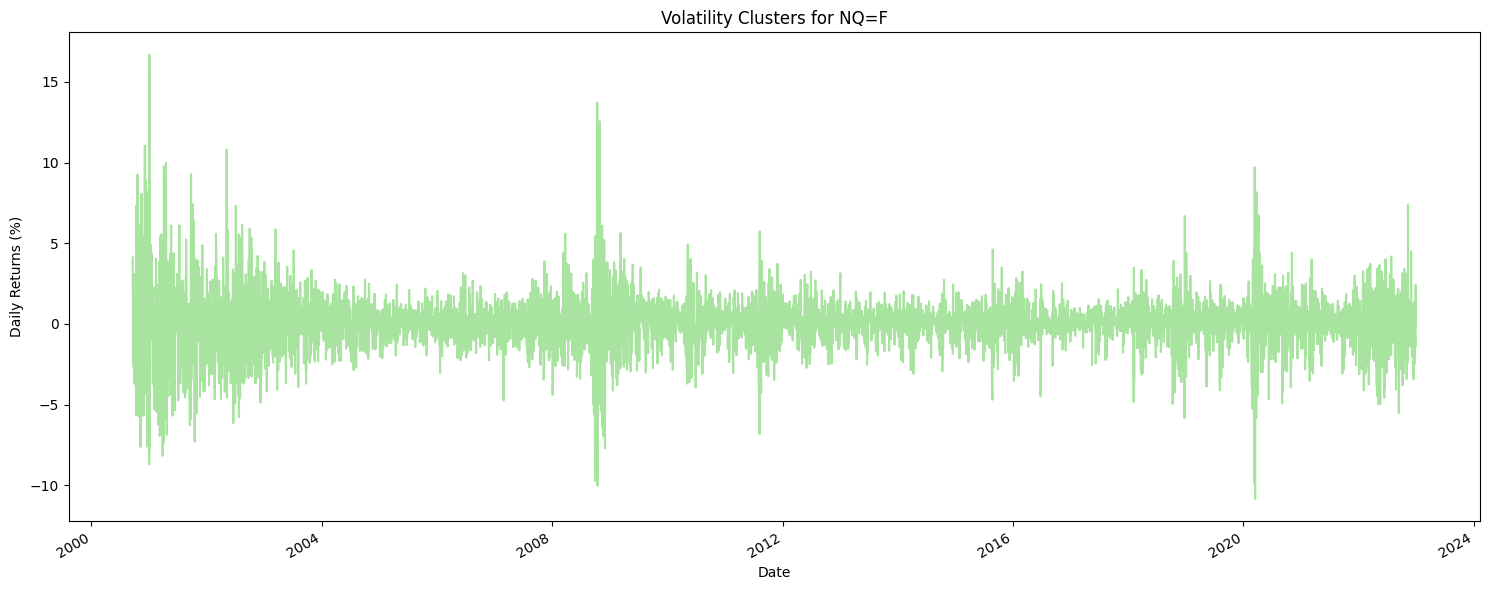

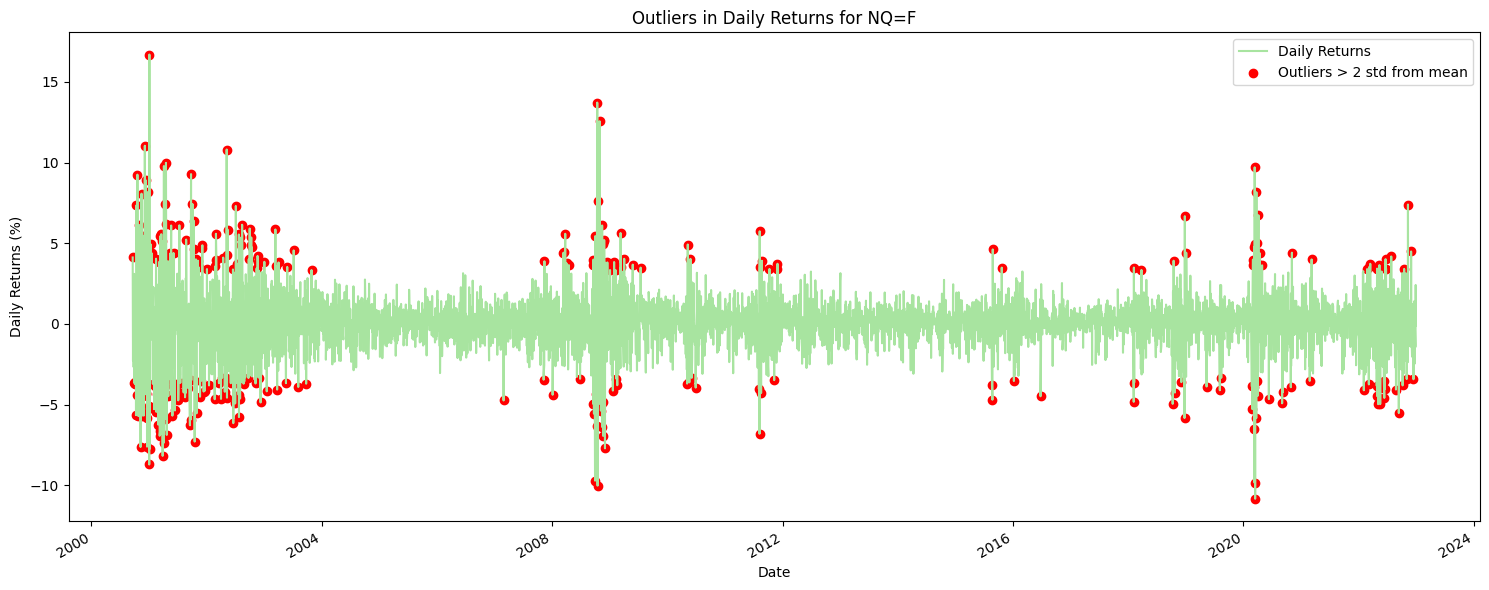

Daily Standard Deviation for NQ=F: 1.6648%
Weekly Average Standard Deviation for NQ=F: 14.2050%
Monthly Average Standard Deviation for NQ=F: 34.5543%
[*********************100%%**********************]  1 of 1 completed


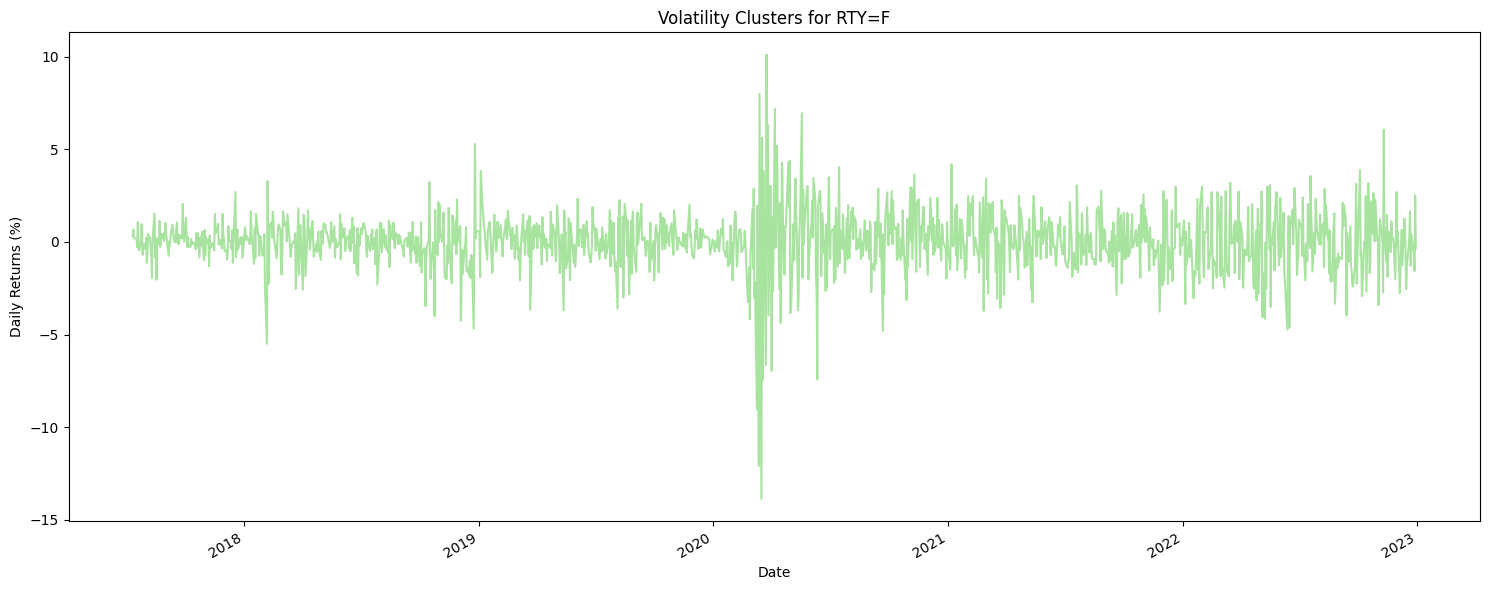

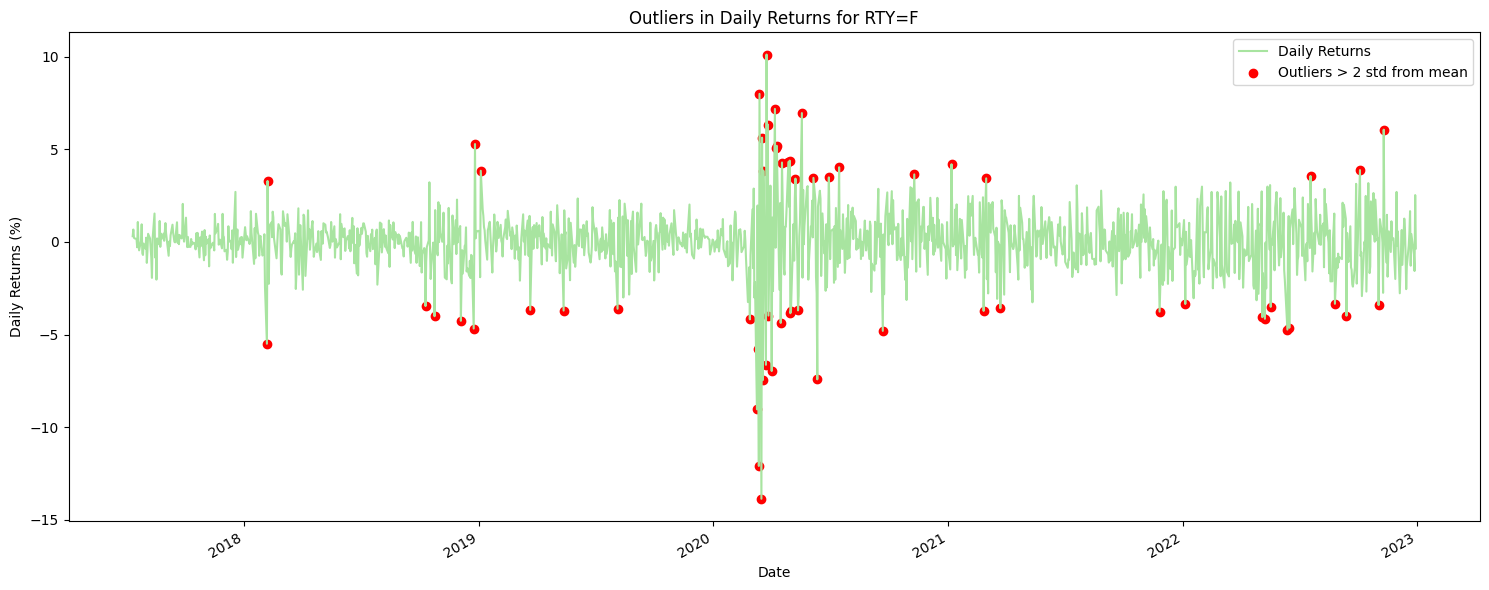

Daily Standard Deviation for RTY=F: 1.6391%
Weekly Average Standard Deviation for RTY=F: 8.3926%
Monthly Average Standard Deviation for RTY=F: 10.9968%
[*********************100%%**********************]  1 of 1 completed


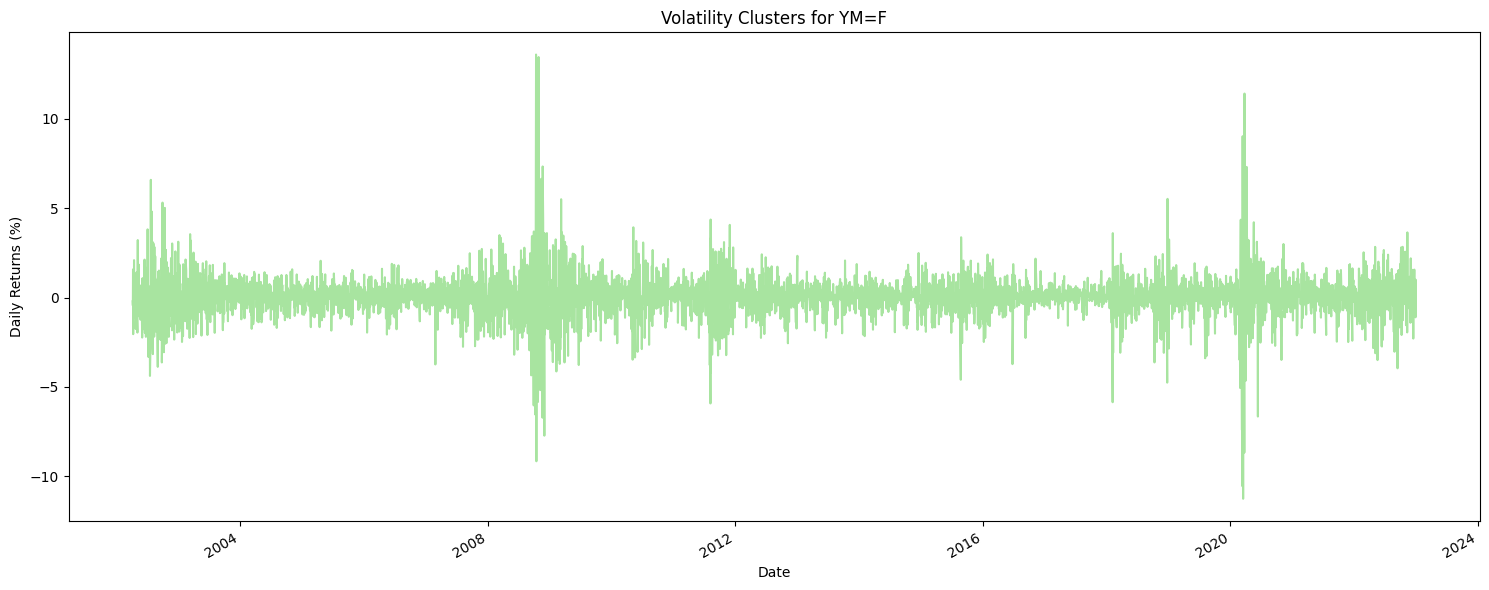

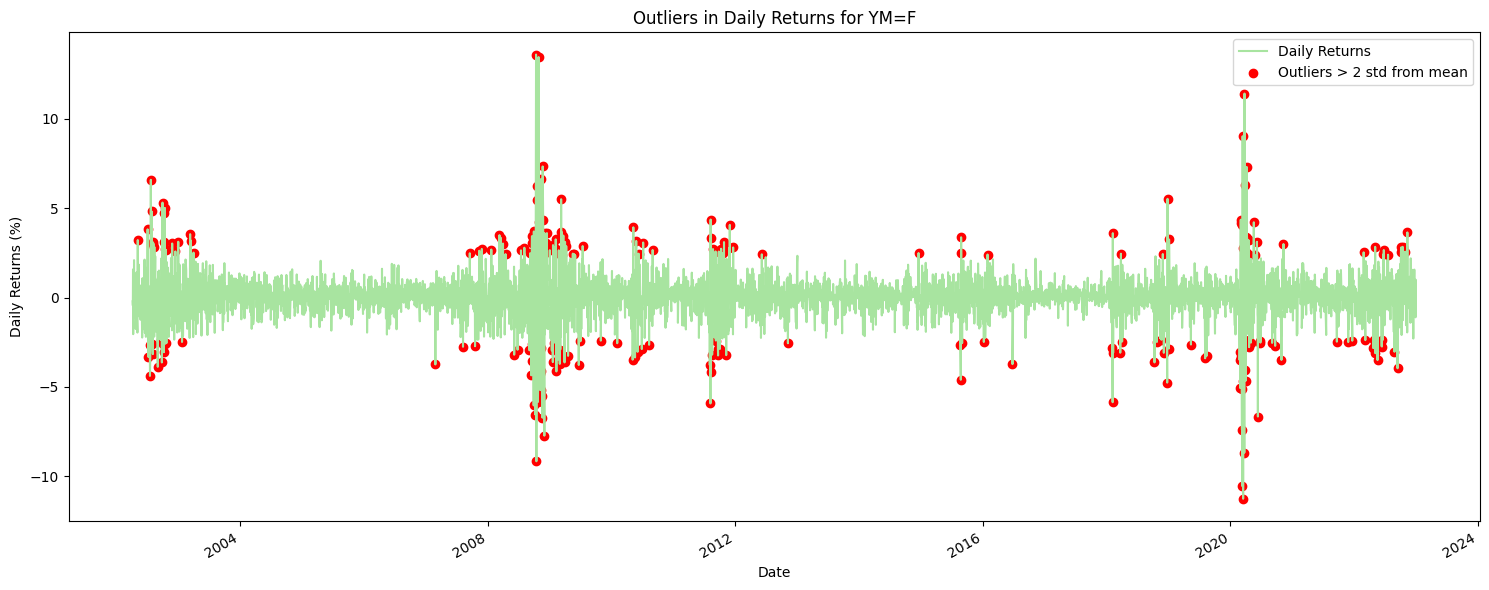

Daily Standard Deviation for YM=F: 1.1807%
Weekly Average Standard Deviation for YM=F: 11.3212%
Monthly Average Standard Deviation for YM=F: 25.3096%
[*********************100%%**********************]  1 of 1 completed


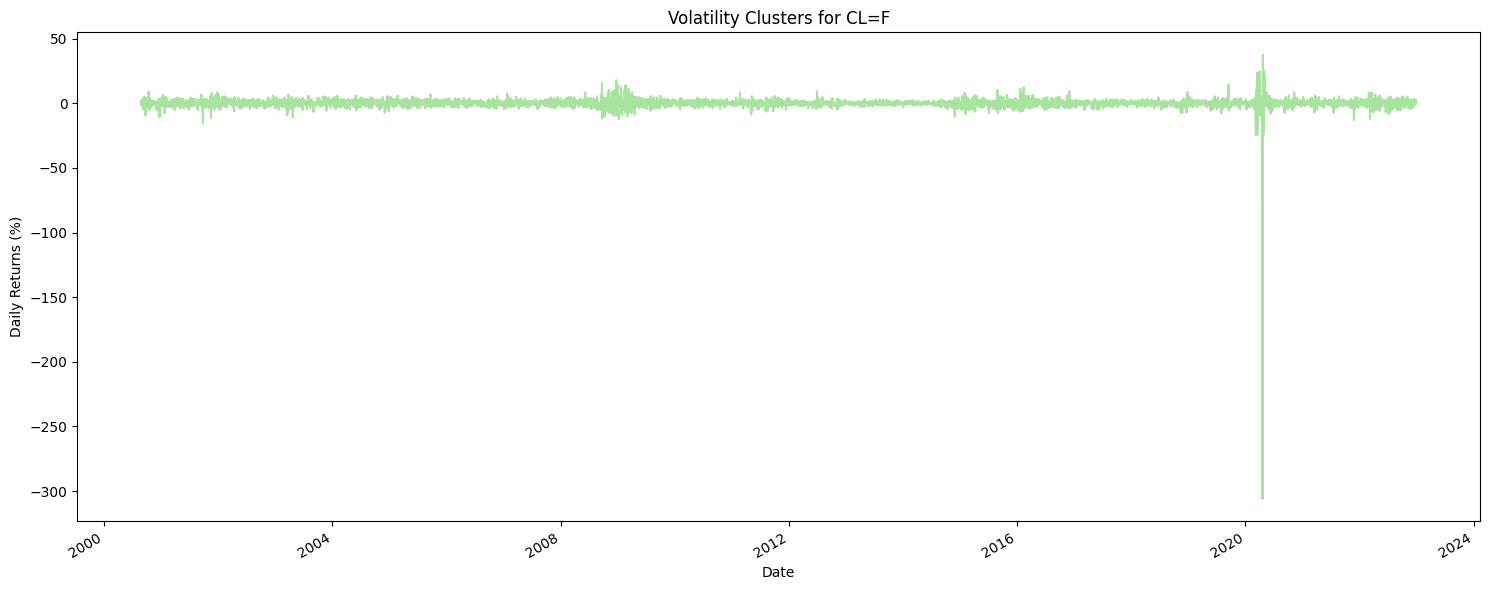

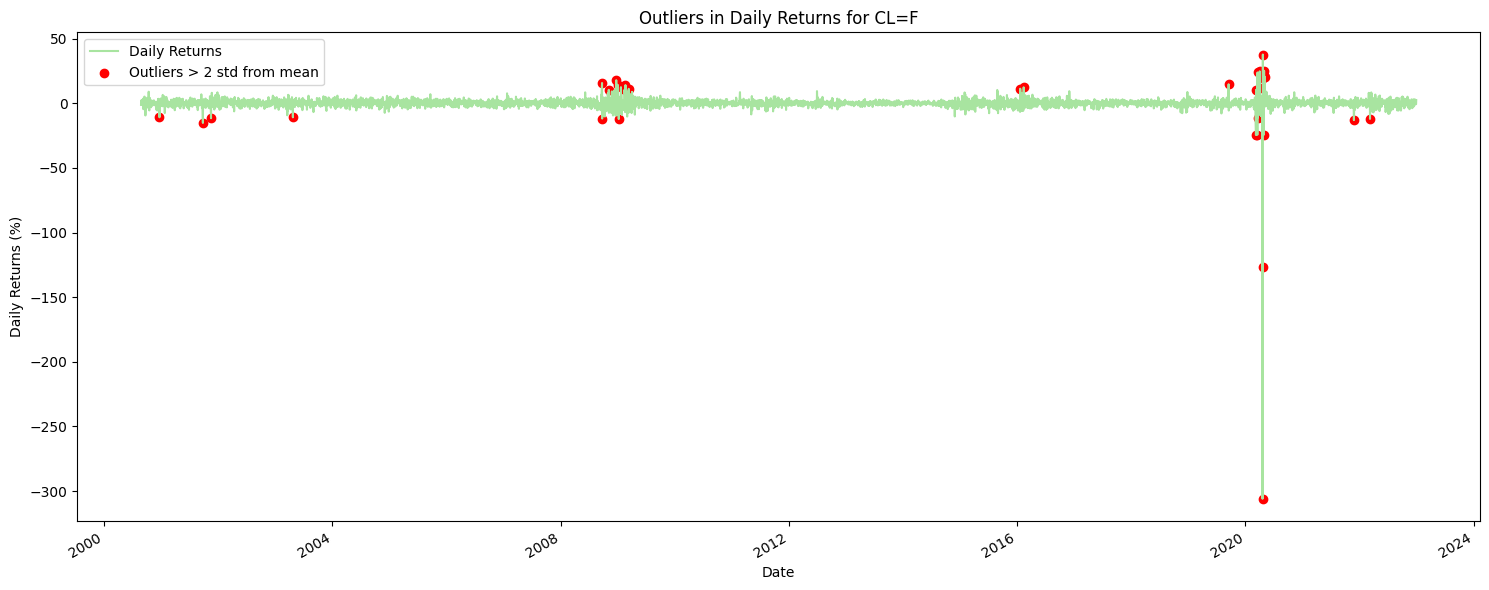

Daily Standard Deviation for CL=F: 5.1596%
Weekly Average Standard Deviation for CL=F: 58.1608%
Monthly Average Standard Deviation for CL=F: 96.2496%


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def analyze_returns(symbol):
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns
    data['Daily Returns'] = data['Close'].pct_change() * 100
    daily_std = data['Daily Returns'].std()

    # Volatility Clusters
    plt.figure(figsize=(15, 6))
    data['Daily Returns'].plot(color='#A8E4A0', title=f'Volatility Clusters for {symbol}')
    plt.ylabel('Daily Returns (%)')
    plt.tight_layout()
    plt.show()

    # Outliers
    outliers = data[np.abs(data['Daily Returns']) > 2 * daily_std]
    plt.figure(figsize=(15, 6))
    data['Daily Returns'].plot(color='#A8E4A0')
    plt.scatter(outliers.index, outliers['Daily Returns'], color='red', label='Outliers > 2 std from mean')
    plt.legend()
    plt.title(f'Outliers in Daily Returns for {symbol}')
    plt.ylabel('Daily Returns (%)')
    plt.tight_layout()
    plt.show()

    # Calculate weekly returns
    data['Week'] = data.index.isocalendar().week
    weekly_returns = data.groupby(['Week'])['Daily Returns'].sum()
    weekly_std = weekly_returns.std()

    # Calculate monthly returns
    data['Month'] = data.index.month
    monthly_returns = data.groupby(['Month'])['Daily Returns'].sum()
    monthly_std = monthly_returns.std()

    # Print standard deviations
    print(f"Daily Standard Deviation for {symbol}: {daily_std:.4f}%")
    print(f"Weekly Average Standard Deviation for {symbol}: {weekly_std:.4f}%")
    print(f"Monthly Average Standard Deviation for {symbol}: {monthly_std:.4f}%")

for symbol in symbols:
    analyze_returns(symbol)


[*********************100%%**********************]  1 of 1 completed


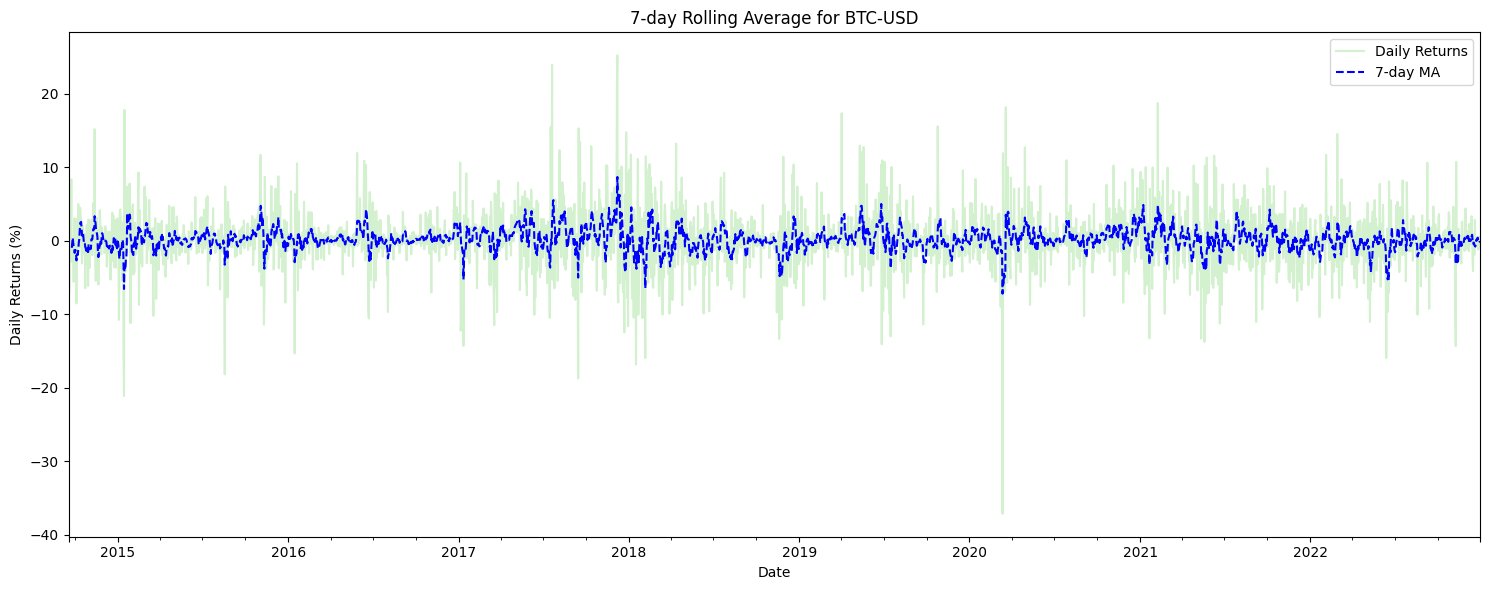

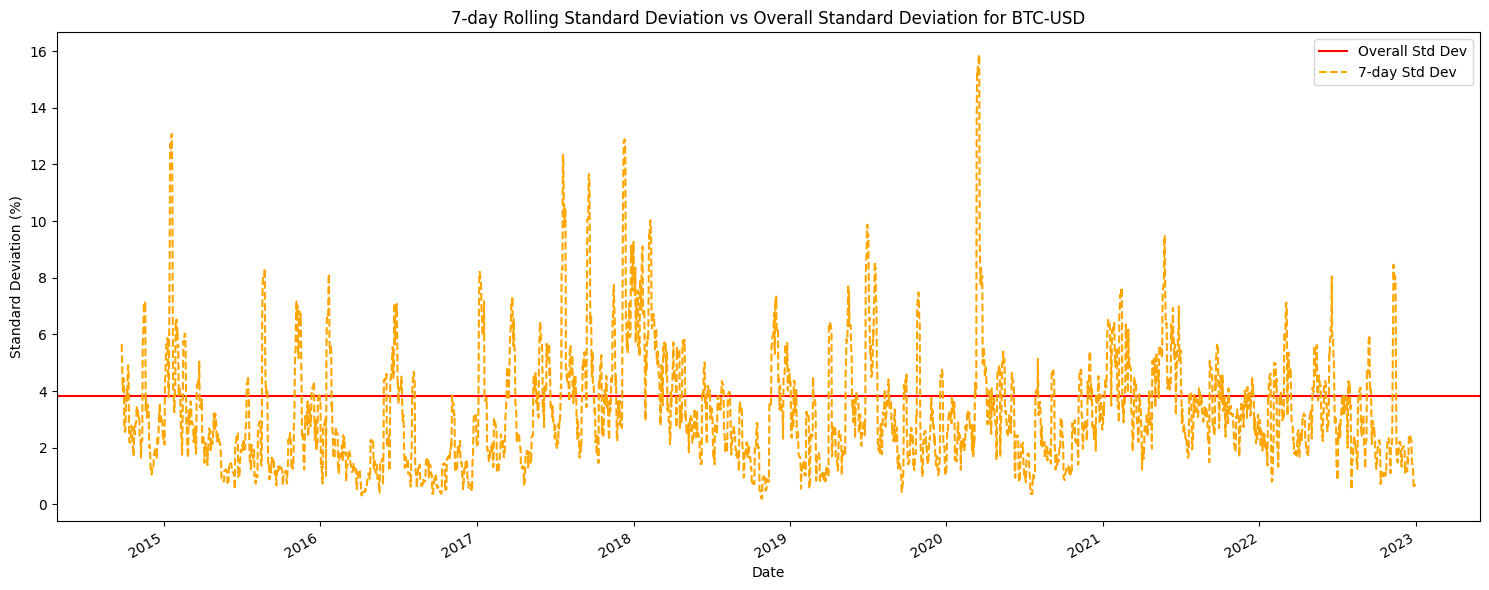

[*********************100%%**********************]  1 of 1 completed


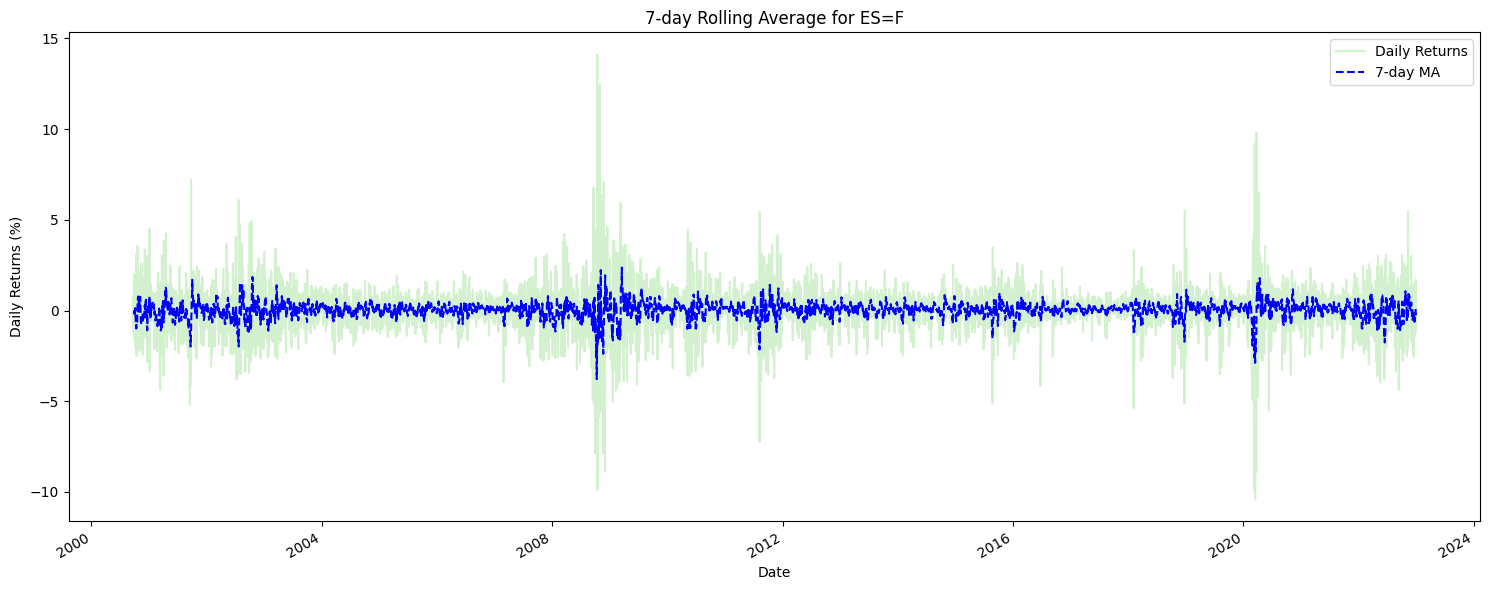

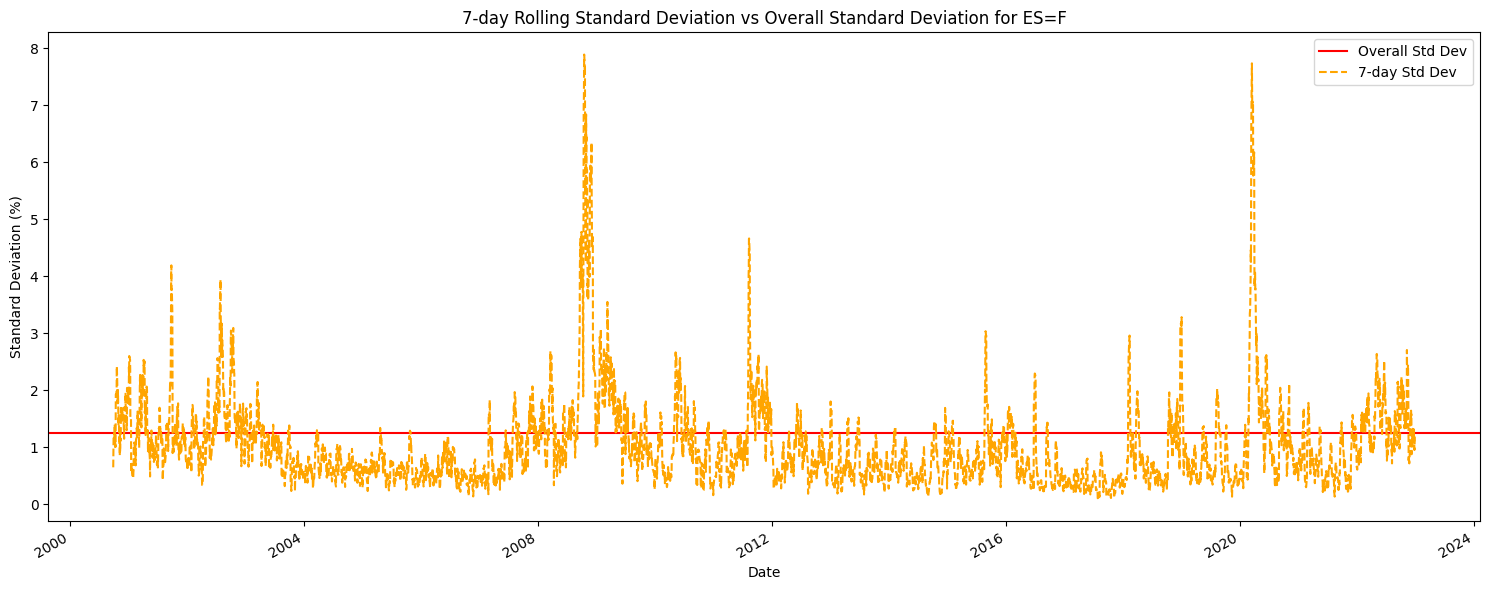

[*********************100%%**********************]  1 of 1 completed


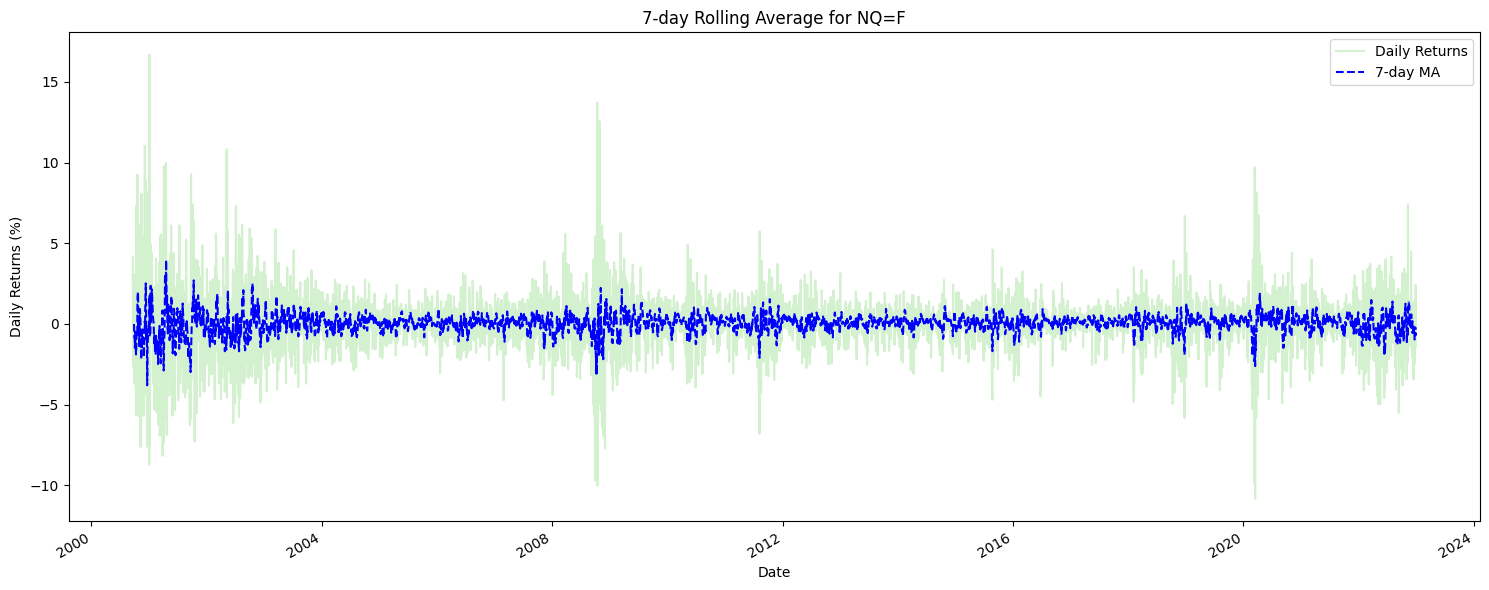

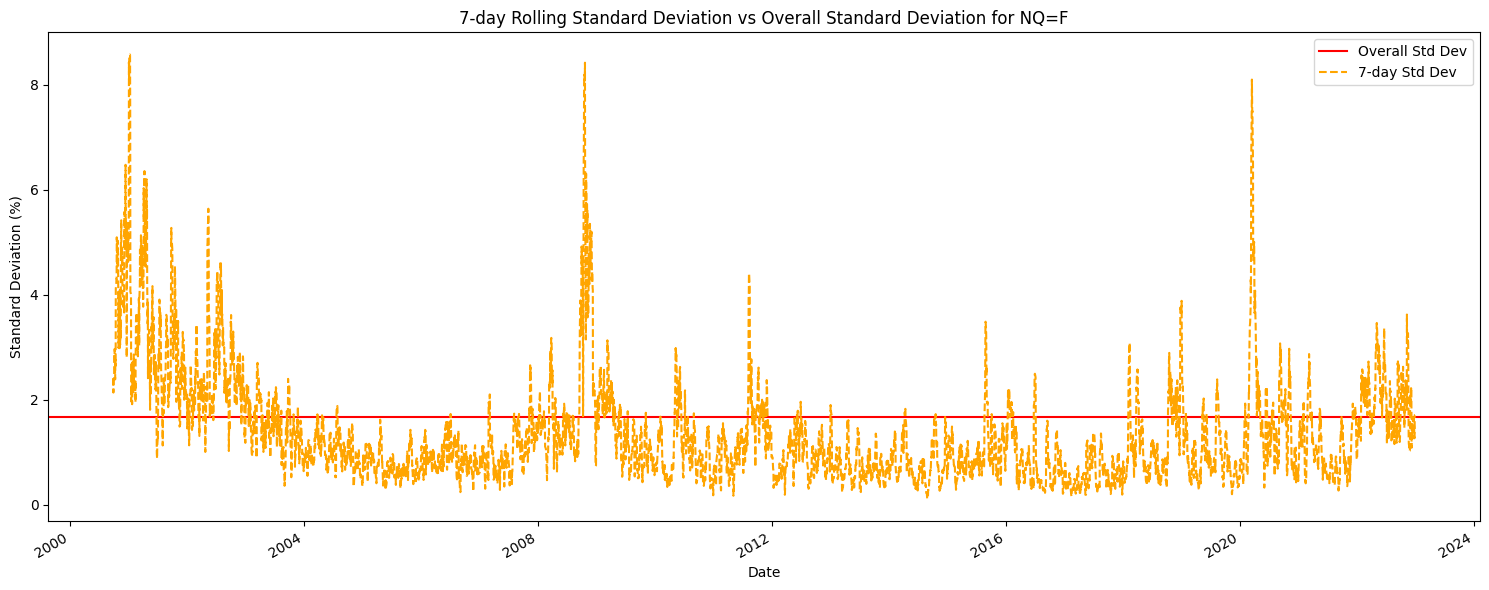

[*********************100%%**********************]  1 of 1 completed


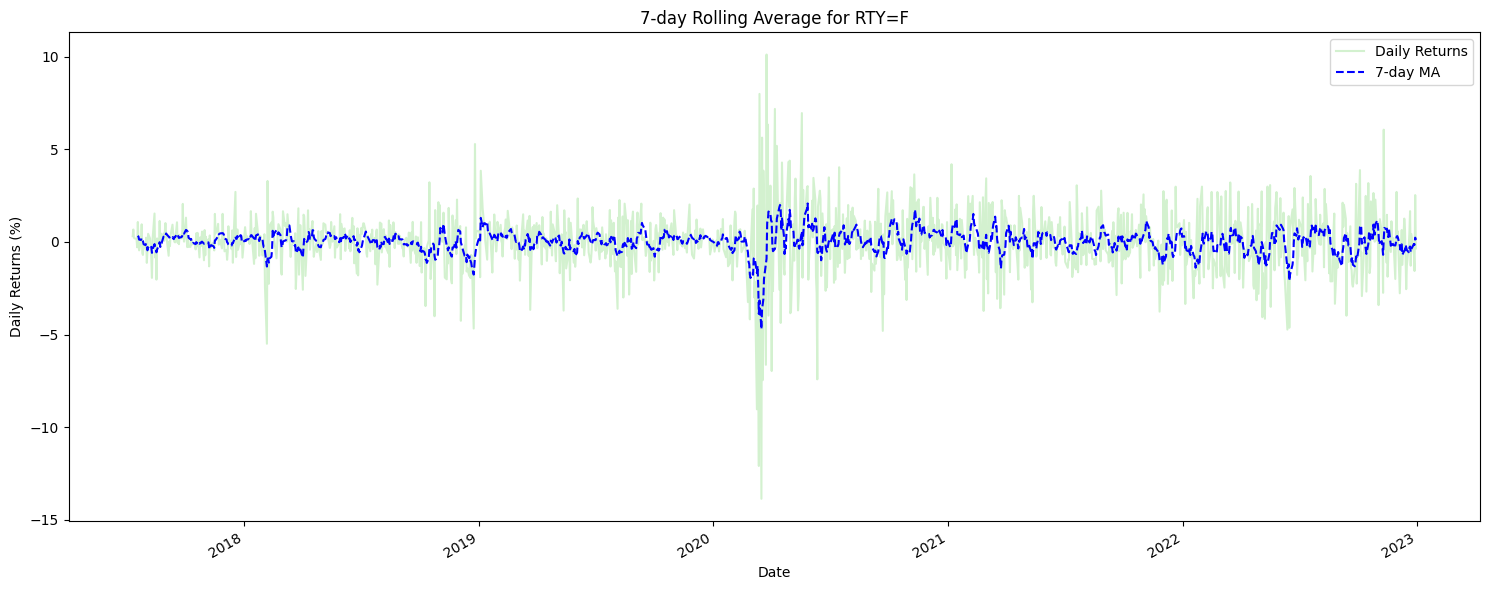

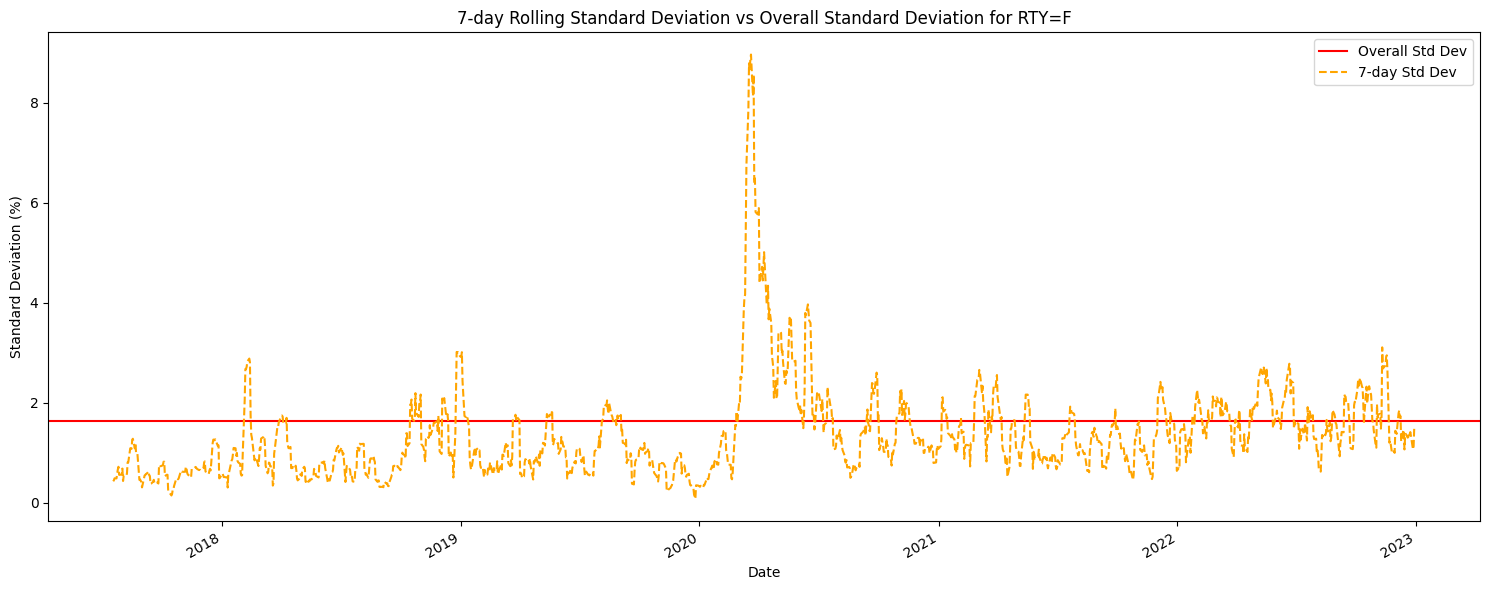

[*********************100%%**********************]  1 of 1 completed


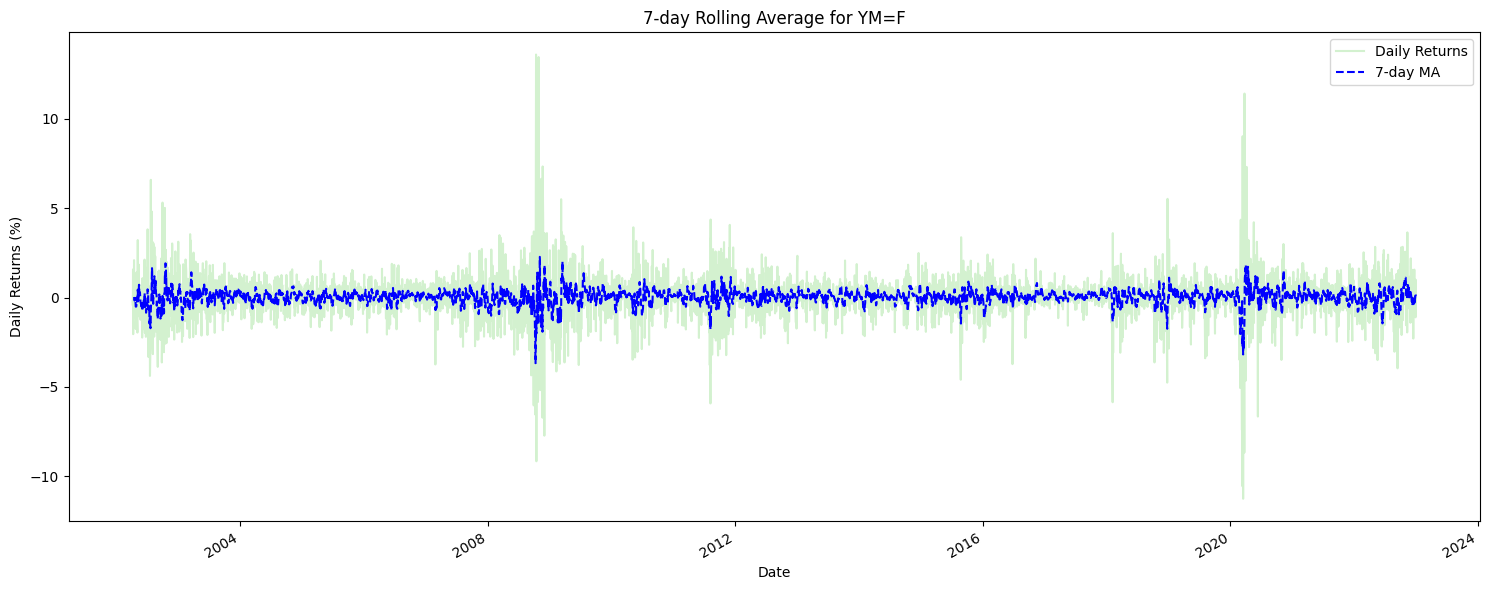

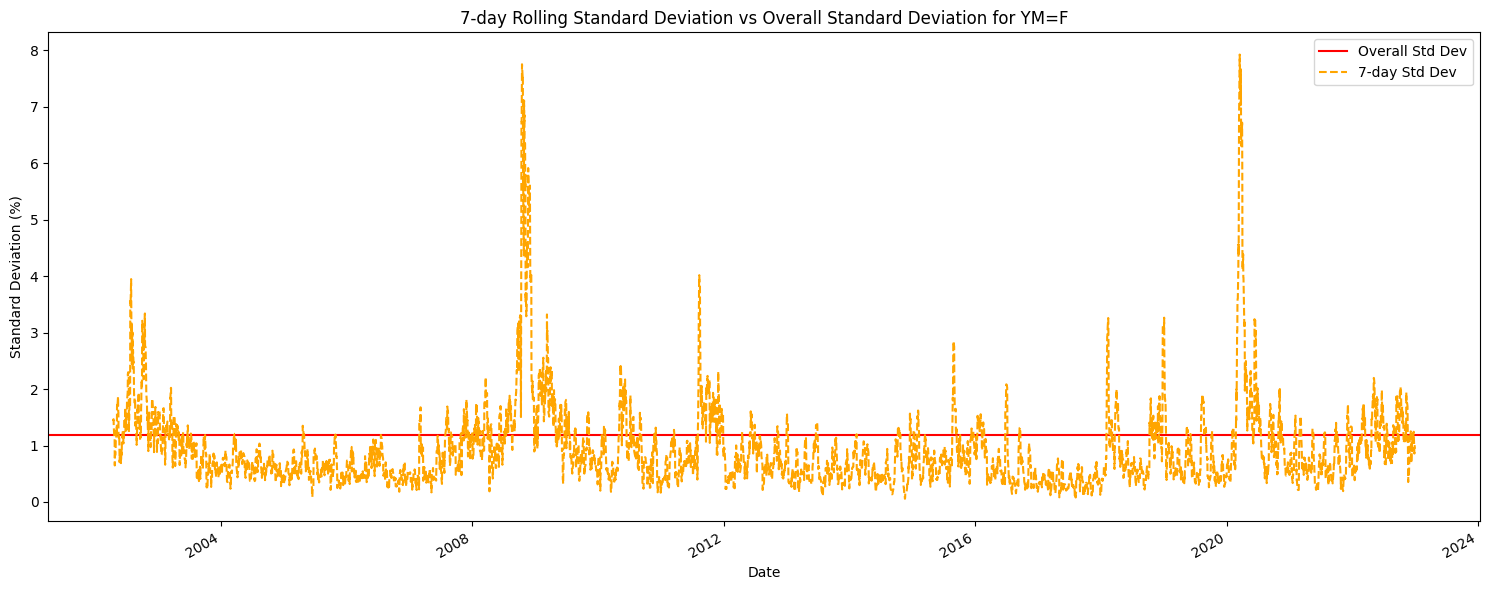

[*********************100%%**********************]  1 of 1 completed


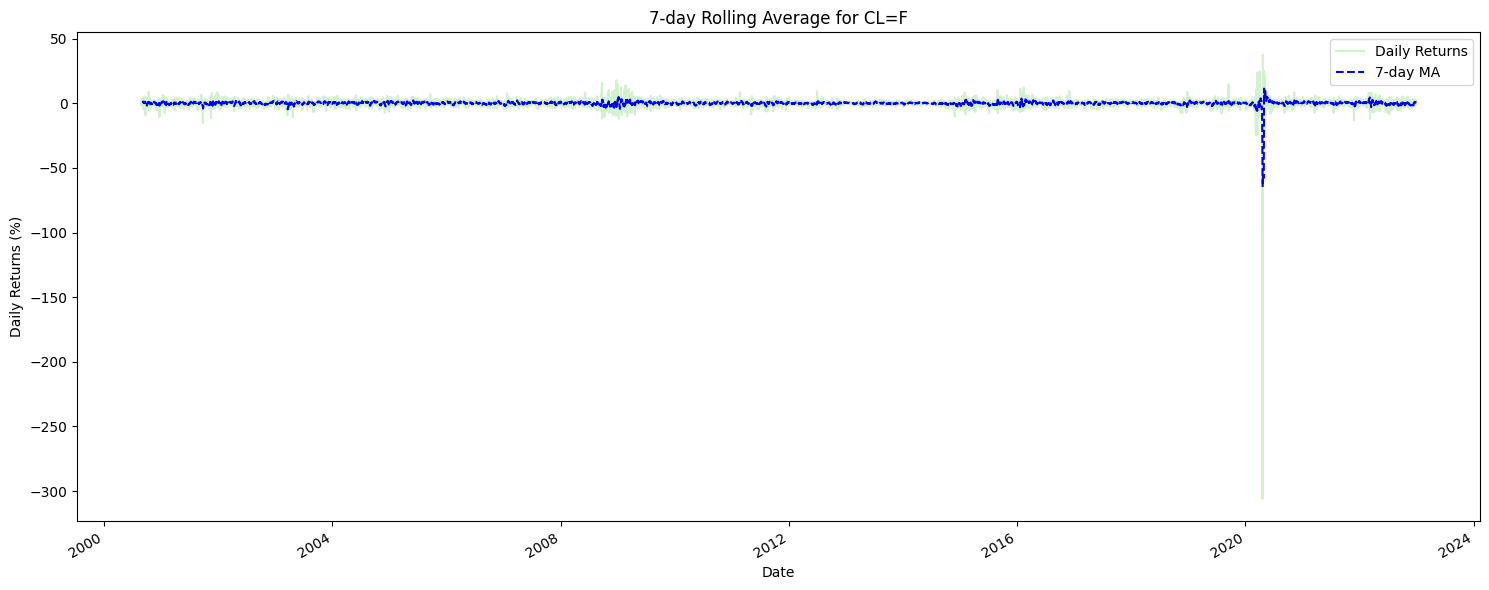

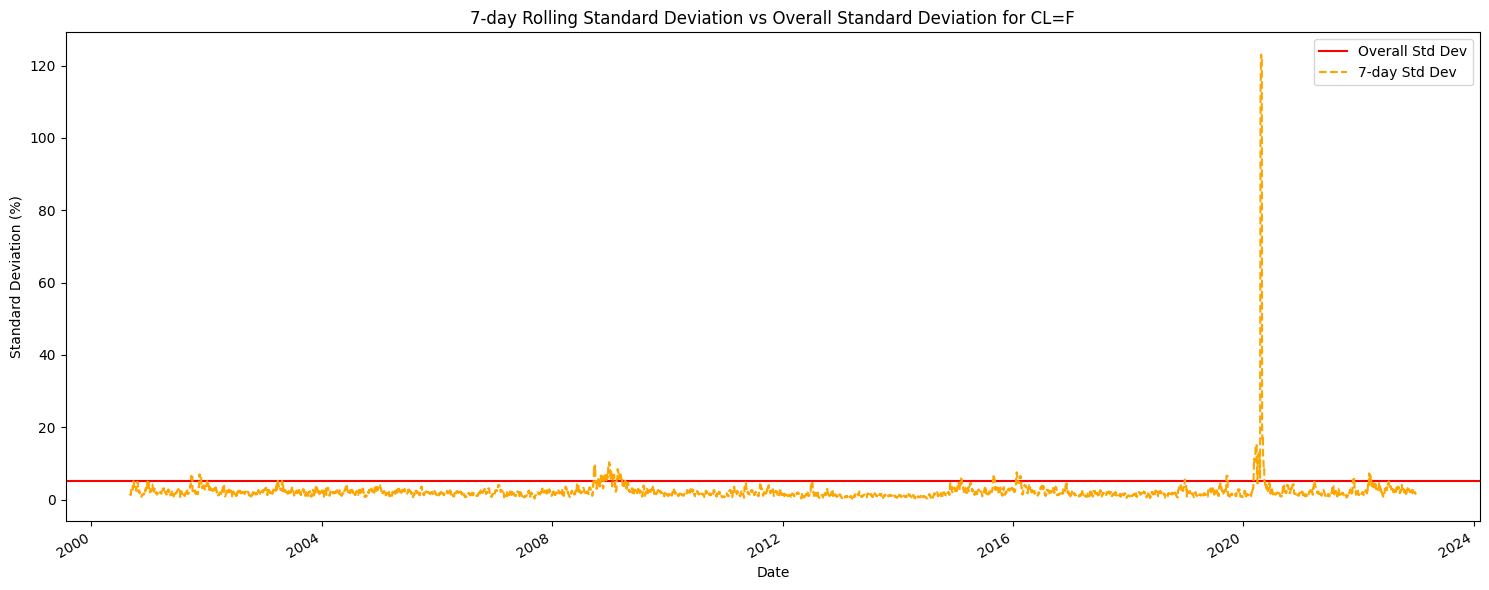

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

def analyze_returns(symbol):
    data = yf.download(symbol, start="2000-01-01", end="2023-01-01")

    # Calculate daily returns
    data['Daily Returns'] = data['Close'].pct_change() * 100
    daily_std = data['Daily Returns'].std()

    # Rolling Metrics
    data['7-day MA'] = data['Daily Returns'].rolling(window=7).mean()
    data['7-day Std Dev'] = data['Daily Returns'].rolling(window=7).std()

    # Plot rolling average with daily returns
    plt.figure(figsize=(15, 6))
    data['Daily Returns'].plot(color='#A8E4A0', alpha=0.5, label='Daily Returns')
    data['7-day MA'].plot(color='blue', linestyle='--', label='7-day MA')
    plt.title(f'7-day Rolling Average for {symbol}')
    plt.ylabel('Daily Returns (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot rolling standard deviation with overall standard deviation
    plt.figure(figsize=(15, 6))
    plt.axhline(y=daily_std, color='red', linestyle='-', label='Overall Std Dev')
    data['7-day Std Dev'].plot(color='orange', linestyle='--', label='7-day Std Dev')
    plt.title(f'7-day Rolling Standard Deviation vs Overall Standard Deviation for {symbol}')
    plt.ylabel('Standard Deviation (%)')
    plt.legend()
    plt.tight_layout()
    plt.show()

for symbol in symbols:
    analyze_returns(symbol)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


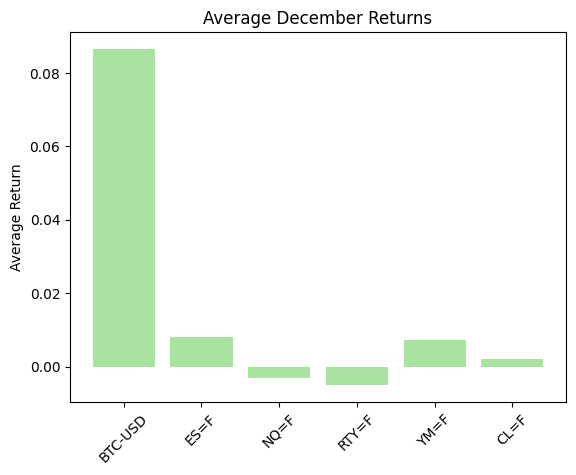

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

# Download data
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start="2000-01-01", end="2023-01-01")

# Define a function to extract the November data and calculate returns
def november_returns(symbol_data):
    # Extract November data
    nov_data = symbol_data[symbol_data.index.month == 12]

    # Calculate returns for each year's November
    returns = (nov_data['Close'].resample('M').last() / nov_data['Close'].resample('M').first()) - 1

    return returns.mean()

# Calculate the average November return for each symbol
avg_nov_returns = {}
for symbol in symbols:
    avg_nov_returns[symbol] = november_returns(data[symbol])

# Visualize the results
plt.bar(avg_nov_returns.keys(), avg_nov_returns.values(), color='#A8E4A0')  # Light blue color
plt.ylabel('Average Return')
plt.title('Average December Returns')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


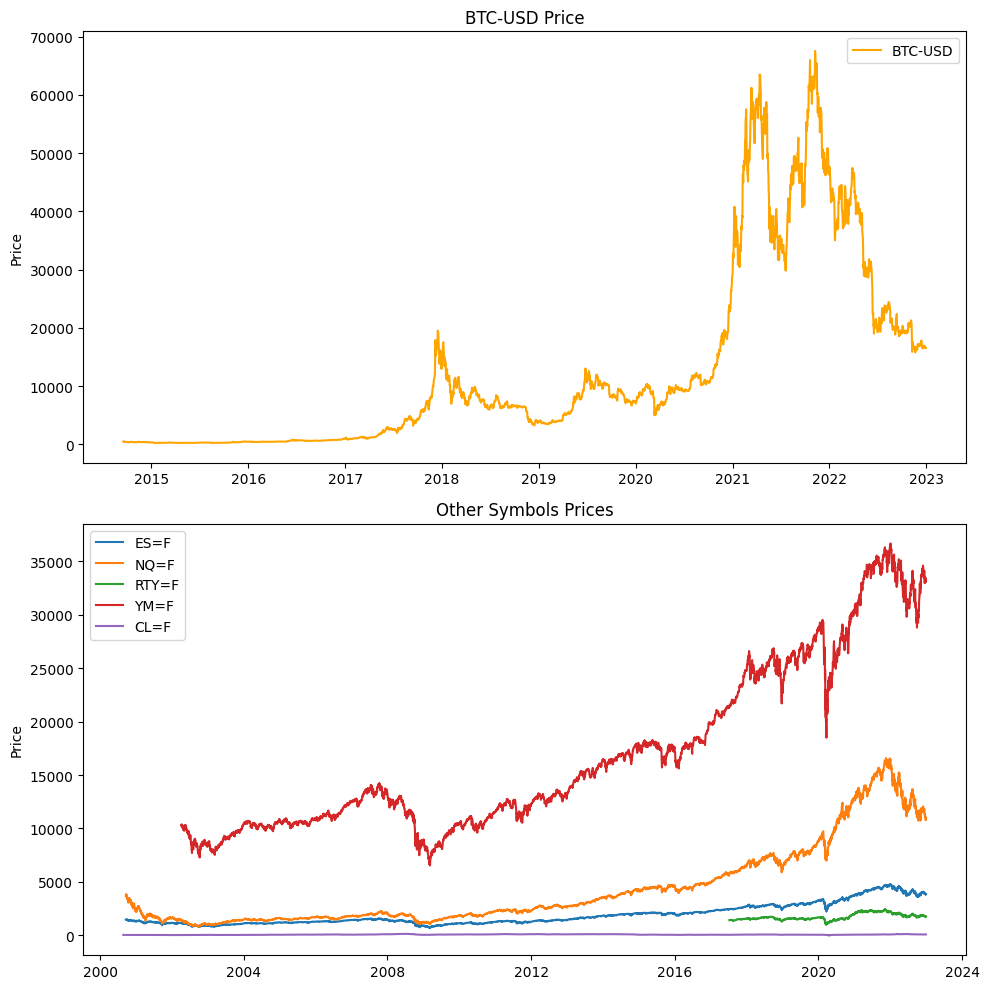

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

# Download data
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start="2000-01-01", end="2023-01-01")

# Define a function to extract the December data and calculate returns
def december_returns(symbol_data):
    # Extract December data
    dec_data = symbol_data[symbol_data.index.month == 12]

    # Calculate returns for each year's December
    returns = (dec_data['Close'].resample('M').last() / dec_data['Close'].resample('M').first()) - 1

    return returns.mean()

# Separate BTC-USD data
btc_data = data["BTC-USD"]
btc_dec_returns = december_returns(btc_data)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot the BTC-USD data
axes[0].plot(btc_data['Close'], label="BTC-USD", color='#FFA500')
axes[0].set_ylabel('Price')
axes[0].set_title('BTC-USD Price')
axes[0].legend()

# Create a list of symbols excluding BTC-USD
other_symbols = [symbol for symbol in symbols if symbol != "BTC-USD"]

# Plot the other symbols (ES=F, NQ=F, RTY=F, YM=F, CL=F)
for symbol in other_symbols:
    axes[1].plot(data[symbol]['Close'], label=symbol)

axes[1].set_ylabel('Price')
axes[1].set_title('Other Symbols Prices')
axes[1].legend()

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


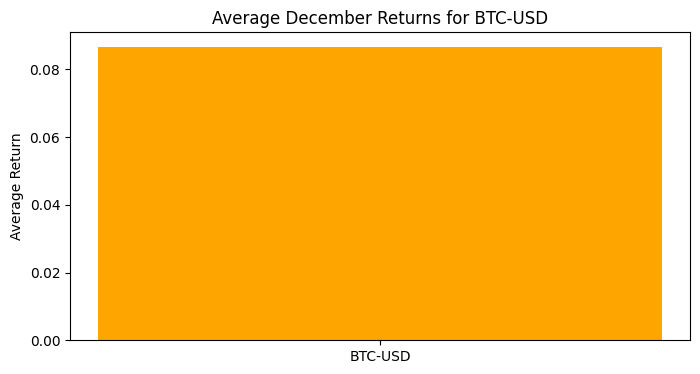

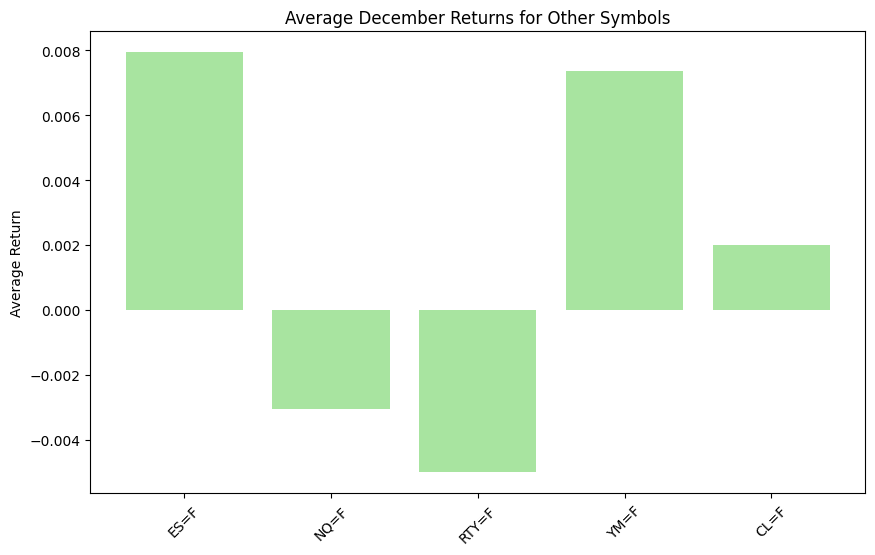

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

symbols = ["BTC-USD", "ES=F", "NQ=F", "RTY=F", "YM=F", "CL=F"]

# Download data
data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start="2000-01-01", end="2023-01-01")

# Define a function to extract the December data and calculate returns
def december_returns(symbol_data):
    # Extract December data
    dec_data = symbol_data[symbol_data.index.month == 12]

    # Calculate returns for each year's December
    returns = (dec_data['Close'].resample('M').last() / dec_data['Close'].resample('M').first()) - 1

    return returns.mean()

# Calculate the average December return for each symbol
avg_dec_returns = {}
for symbol in symbols:
    avg_dec_returns[symbol] = december_returns(data[symbol])

# Separate BTC-USD data
btc_data = data["BTC-USD"]
btc_dec_returns = december_returns(btc_data)

# Create a bar plot for BTC-USD
plt.figure(figsize=(8, 4))
plt.bar("BTC-USD", btc_dec_returns, color='#FFA500')  # Orange color for BTC-USD
plt.ylabel('Average Return')
plt.title('Average December Returns for BTC-USD')
plt.show()

# Create a bar plot for the other symbols (ES=F, NQ=F, RTY=F, YM=F, CL=F)
other_symbols = [symbol for symbol in symbols if symbol != "BTC-USD"]
avg_returns_others = [avg_dec_returns[symbol] for symbol in other_symbols]

plt.figure(figsize=(10, 6))
plt.bar(other_symbols, avg_returns_others, color='#A8E4A0')  # Light blue color
plt.ylabel('Average Return')
plt.title('Average December Returns for Other Symbols')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()
